In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\face_spoofing_detection_dataset_10000.csv")

print(df.head())


  student_id                          image_path  \
0      S3102  spoof_images/S3102/frame_00001.jpg   
1      S3435  spoof_images/S3435/frame_00002.jpg   
2      S3270  spoof_images/S3270/frame_00003.jpg   
3      S3106  spoof_images/S3106/frame_00004.jpg   
4      S3071  spoof_images/S3071/frame_00005.jpg   

                                      face_embedding  is_spoof  \
0  [0.2793421641556266, 0.26382903668440283, 0.23...         0   
1  [0.2801883557410607, 0.7056739028016847, 0.871...         0   
2  [0.48406227576250527, 0.9302397060852257, 0.45...         0   
3  [0.7729067455395215, 0.04147644393759509, 0.60...         0   
4  [0.7108763684623984, 0.613022261678253, 0.4239...         0   

             timestamp device_id  
0  2025-01-22 06:23:45   DVC_115  
1  2025-01-25 06:53:29   DVC_106  
2  2025-01-19 15:29:59   DVC_103  
3  2025-01-08 13:29:29   DVC_126  
4  2025-01-08 00:03:24   DVC_119  


In [35]:
df.columns

Index(['student_id', 'image_path', 'face_embedding', 'is_spoof', 'timestamp',
       'device_id'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   student_id      10000 non-null  object
 1   image_path      10000 non-null  object
 2   face_embedding  10000 non-null  object
 3   is_spoof        10000 non-null  int64 
 4   timestamp       10000 non-null  object
 5   device_id       10000 non-null  object
dtypes: int64(1), object(5)
memory usage: 468.9+ KB


In [37]:
df = df.dropna()



Data Types After Preprocessing:
student_id                      object
image_path                      object
face_embedding                  object
is_spoof                         int64
timestamp               datetime64[ns]
device_id                       object
is_spoof_norm                  float64
spoof_roll                     float64
hour                             int32
total_spoof_attempts             int64
device_spoof_count               int64
dtype: object

First 5 rows after feature engineering:
  student_id                          image_path  \
0      S3000  spoof_images/S3000/frame_04007.jpg   
1      S3000  spoof_images/S3000/frame_06125.jpg   
2      S3000  spoof_images/S3000/frame_05954.jpg   
3      S3000  spoof_images/S3000/frame_01900.jpg   
4      S3000  spoof_images/S3000/frame_01957.jpg   

                                      face_embedding  is_spoof  \
0  [0.5438041592560195, 0.8226868321585767, 0.703...         1   
1  [0.1722108510684187, 0.244014194857

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\1234948472.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_spoof', data=df, palette='Set1')


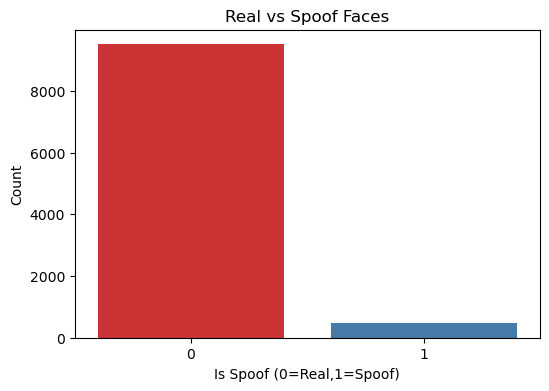

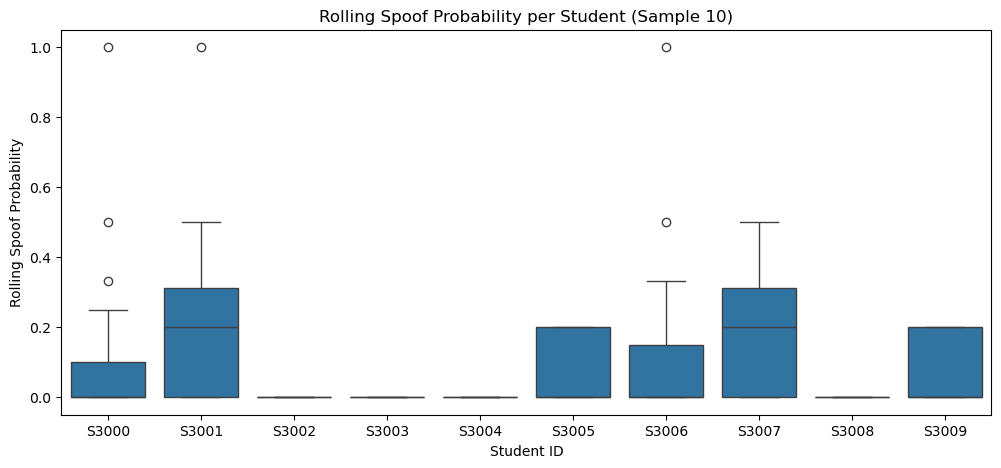

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\1234948472.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_students.index, y=top_students.values, palette='Set2')


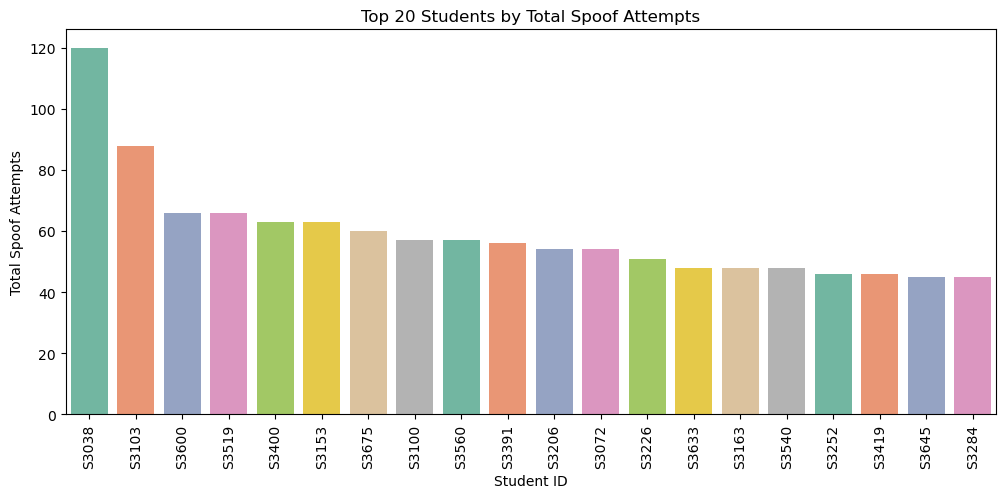

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\1234948472.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_devices.index, y=top_devices.values, palette='Set3')


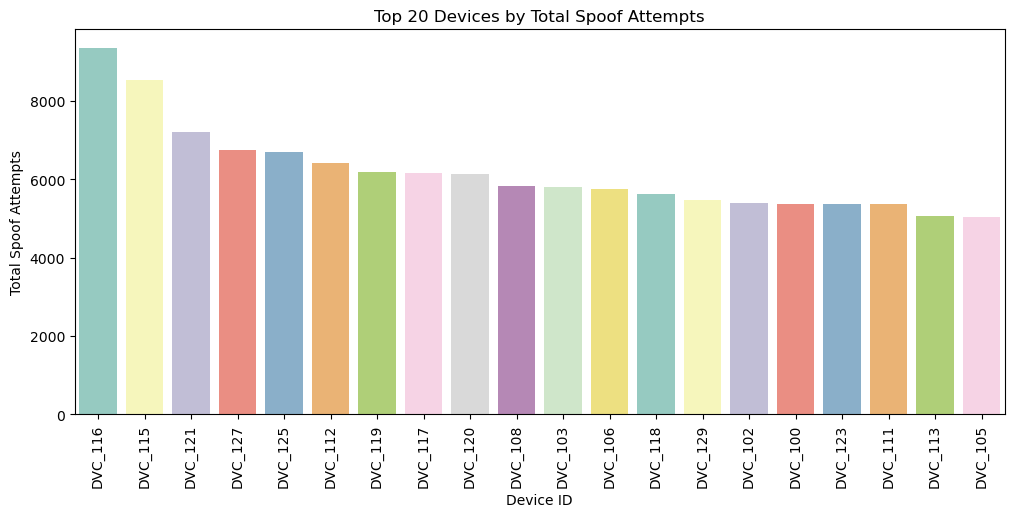

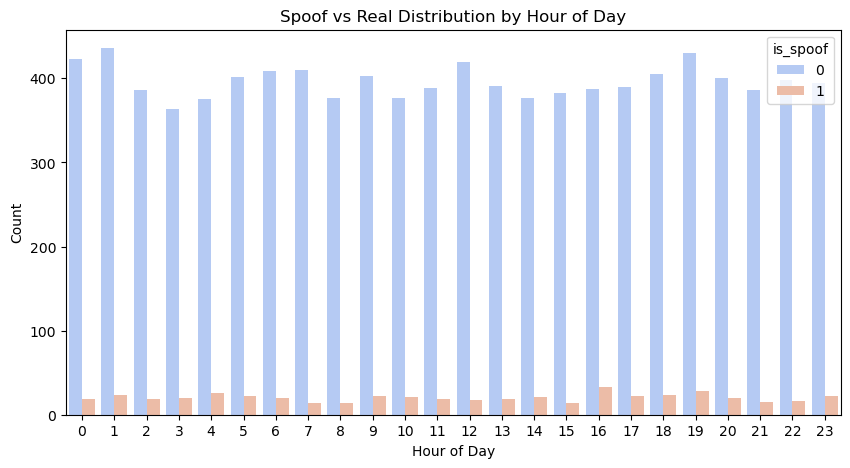


Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\face_spoofing_detection_dataset_processed.csv


In [39]:
#--------------------------------
#is_spoof_norm → Normalized spoof label (like engagement score normalization)
#spoof_roll → Rolling average spoof probability per student (like sleep / mood trend)
#hour → Hour extracted from timestamp for frequency analysis (like phone usage)
#total_spoof_attempts → Total spoof per student (like attentive percentage)
#device_spoof_count → Total spoof per device (like disturbance / noise)
#✅ Visualizations
#Real vs Spoof count
#Rolling spoof probability per student (sample 10 students)
#Top 20 students by spoof attempts
#Top 20 devices by spoof attempts
#Hour-wise spoof vs real distribution
#-------------------------------


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\face_spoofing_detection_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Data Type Fixes
# ---------------------------
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['is_spoof'] = df['is_spoof'].astype(int)

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Normalize spoof label (optional, just to match Engagement-like normalization)
scaler = MinMaxScaler()
df['is_spoof_norm'] = scaler.fit_transform(df[['is_spoof']])

# 2️⃣ Rolling average of spoof attempts per student (like sleep / mood trend)
df = df.sort_values(['student_id','timestamp'])
df['spoof_roll'] = df.groupby('student_id')['is_spoof'].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean()
)

# 3️⃣ Spoof frequency per hour (like phone usage frequency)
df['hour'] = df['timestamp'].dt.hour
hourly_spoof = df.groupby('hour')['is_spoof'].sum().reset_index(name='spoof_count')

# 4️⃣ Total spoof attempts per student (like attentive percentage)
student_spoof_count = df.groupby('student_id')['is_spoof'].sum().reset_index()
student_spoof_count.rename(columns={'is_spoof':'total_spoof_attempts'}, inplace=True)
df = df.merge(student_spoof_count, on='student_id', how='left')

# 5️⃣ Total spoof attempts per device (like disturbance / noise)
device_spoof_count = df.groupby('device_id')['is_spoof'].sum().reset_index()
device_spoof_count.rename(columns={'is_spoof':'device_spoof_count'}, inplace=True)
df = df.merge(device_spoof_count, on='device_id', how='left')

# ---------------------------
# Quick Checks
# ---------------------------
print("\nData Types After Preprocessing:")
print(df.dtypes)

print("\nFirst 5 rows after feature engineering:")
print(df.head())

# ---------------------------
# Visualizations
# ---------------------------

# 1️⃣ Count of real vs spoof
plt.figure(figsize=(6,4))
sns.countplot(x='is_spoof', data=df, palette='Set1')
plt.title("Real vs Spoof Faces")
plt.xlabel("Is Spoof (0=Real,1=Spoof)")
plt.ylabel("Count")
plt.show()

# 2️⃣ Rolling spoof probability per student (sample 10 students)
sample_students = df['student_id'].unique()[:10]
plt.figure(figsize=(12,5))
sns.boxplot(x='student_id', y='spoof_roll', data=df[df['student_id'].isin(sample_students)])
plt.title("Rolling Spoof Probability per Student (Sample 10)")
plt.xlabel("Student ID")
plt.ylabel("Rolling Spoof Probability")
plt.show()

# 3️⃣ Spoof attempts per student (top 20)
top_students = df.groupby('student_id')['total_spoof_attempts'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(x=top_students.index, y=top_students.values, palette='Set2')
plt.title("Top 20 Students by Total Spoof Attempts")
plt.xlabel("Student ID")
plt.ylabel("Total Spoof Attempts")
plt.xticks(rotation=90)
plt.show()

# 4️⃣ Spoof attempts per device (top 20)
top_devices = df.groupby('device_id')['device_spoof_count'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(x=top_devices.index, y=top_devices.values, palette='Set3')
plt.title("Top 20 Devices by Total Spoof Attempts")
plt.xlabel("Device ID")
plt.ylabel("Total Spoof Attempts")
plt.xticks(rotation=90)
plt.show()

# 5️⃣ Spoof distribution by hour
plt.figure(figsize=(10,5))
sns.countplot(x='hour', hue='is_spoof', data=df, palette='coolwarm')
plt.title("Spoof vs Real Distribution by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\face_spoofing_detection_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")


In [154]:
#----------------------------------------------
#আগের সব preprocessing & engineered features ফিরে আসে।
#face_embedding থেকে RandomForest model train।
#predicted_label + predicted_spoof_prob যোগ করা হয়।
#Confusion matrix, accuracy, classification report দেখানো হয়।
#Final CSV save হয় prediction সহ।
#-------------------------------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import ast  # To convert string representation of list to actual list

# ---------------------------
# Load Processed Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\face_spoofing_detection_dataset_processed.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Prepare Features & Target
# ---------------------------

# Convert stringified embeddings to actual list
df['face_embedding'] = df['face_embedding'].apply(ast.literal_eval)
X = np.array(df['face_embedding'].tolist())  # Features
y = df['is_spoof'].values                   # Target

print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)

# ---------------------------
# Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# RandomForest Model Training
# ---------------------------
rf_model = RandomForestClassifier(
    n_estimators=200, 
    max_depth=20, 
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# ---------------------------
# Evaluation
# ---------------------------
y_pred = rf_model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---------------------------
# Predict Spoof Probability (Optional)
# ---------------------------
df['predicted_spoof_prob'] = rf_model.predict_proba(X)[:,1]
df['predicted_label'] = rf_model.predict(X)

# ---------------------------
# Save Final Dataset with Predictions
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\face_spoofing_detection_dataset_final.csv"
df.to_csv(output_path, index=False)
print(f"\nFinal dataset with predictions saved at: {output_path}")


Feature Shape: (10000, 128)
Target Shape: (10000,)
✅ Accuracy: 0.951

Confusion Matrix:
 [[1902    0]
 [  98    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1902
           1       0.00      0.00      0.00        98

    accuracy                           0.95      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.90      0.95      0.93      2000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Final dataset with predictions saved at: C:\Users\Tamim\OneDrive\Documents\dataset\face_spoofing_detection_dataset_final.csv


In [24]:
import pandas as pd

file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\unknown_person_detection_dataset_10000.xls"

# Try reading as CSV
df = pd.read_csv(file_path)
print("Dataset loaded successfully!\n")
print(df.head())


Dataset loaded successfully!

   frame_id                            detected_face_embedding  match_found  \
0         1  [0.374540,0.950714,0.731994,0.598658,0.156019,...            0   
1         2  [0.006952,0.510747,0.417411,0.222108,0.119865,...            0   
2         3  [0.936155,0.696030,0.570061,0.097176,0.615007,...            0   
3         4  [0.735071,0.803481,0.282035,0.177440,0.750615,...            0   
4         5  [0.932728,0.866064,0.045219,0.026367,0.376463,...            0   

   matched_student_id            timestamp  
0                 NaN  2025-01-01T10:00:00  
1                 NaN  2025-01-01T10:00:01  
2                 NaN  2025-01-01T10:00:02  
3                 NaN  2025-01-01T10:00:03  
4                 NaN  2025-01-01T10:00:04  


In [25]:
df.columns

Index(['frame_id', 'detected_face_embedding', 'match_found',
       'matched_student_id', 'timestamp'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   frame_id                 10000 non-null  int64  
 1   detected_face_embedding  10000 non-null  object 
 2   match_found              10000 non-null  int64  
 3   matched_student_id       2988 non-null   float64
 4   timestamp                10000 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 390.8+ KB


In [27]:
df = df.dropna()



Data Types After Preprocessing:
frame_id                            int64
detected_face_embedding            object
match_found                         int64
matched_student_id                  int64
timestamp                  datetime64[ns]
unknown_flag                        int64
hour                                int32
day                                object
known_count                         int64
dtype: object

First 5 rows after feature engineering:
   frame_id                            detected_face_embedding  match_found  \
0         1  [0.374540,0.950714,0.731994,0.598658,0.156019,...            0   
1         2  [0.006952,0.510747,0.417411,0.222108,0.119865,...            0   
2         3  [0.936155,0.696030,0.570061,0.097176,0.615007,...            0   
3         4  [0.735071,0.803481,0.282035,0.177440,0.750615,...            0   
4         5  [0.932728,0.866064,0.045219,0.026367,0.376463,...            0   

   matched_student_id           timestamp  unknown_flag  ho

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\890345187.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='match_found', data=df, palette='Set1')


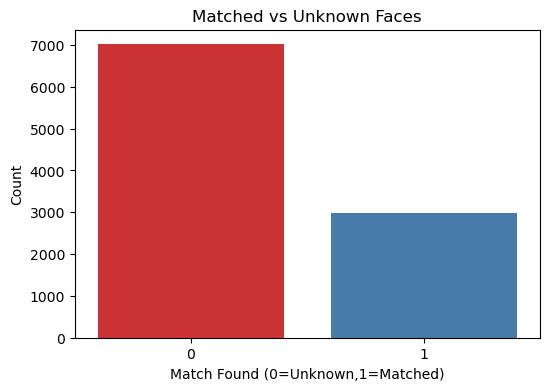

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\890345187.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='unknown_flag', data=df, estimator=sum, palette='coolwarm')


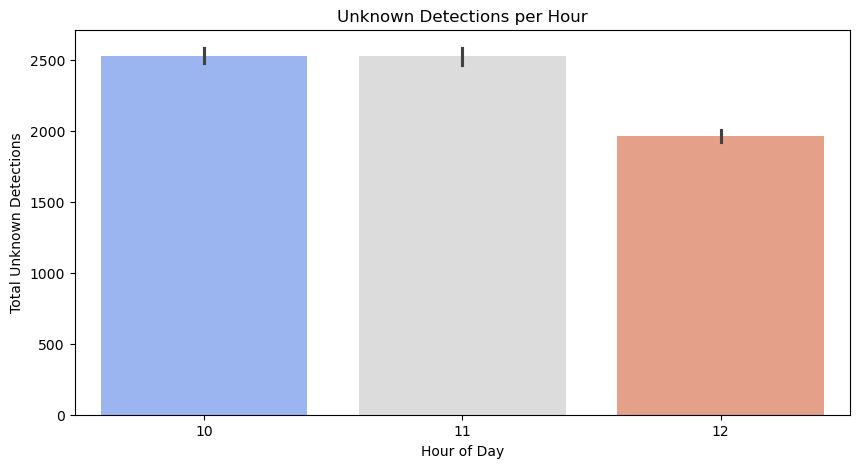

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\890345187.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='unknown_flag', data=df, estimator=sum, palette='Set2')


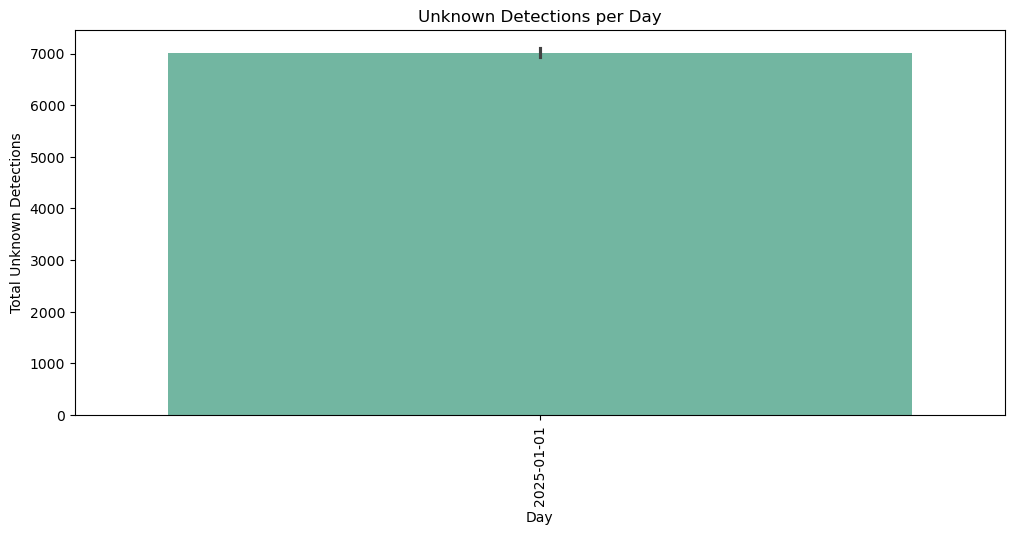

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\890345187.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_students.index, y=top_students.values, palette='Set3')


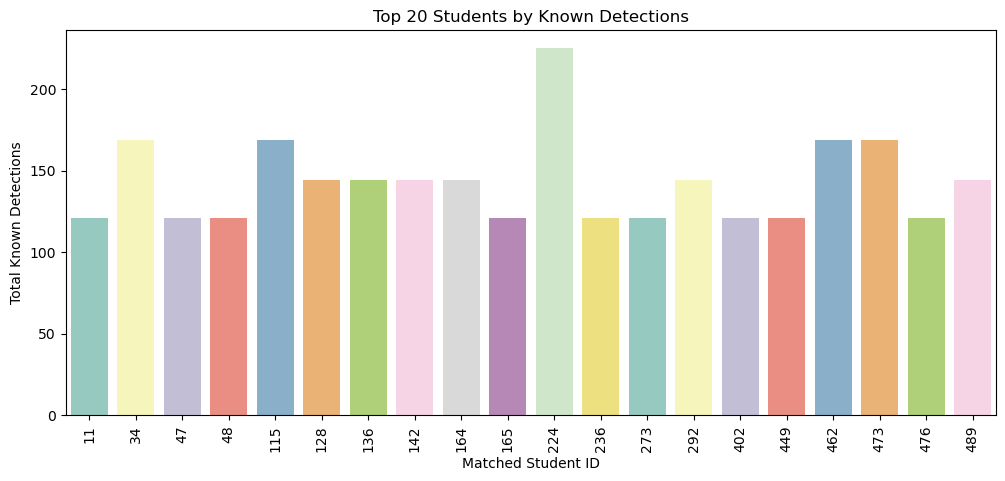


Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\unknown_person_detection_dataset_processed.csv


In [40]:
#------------------------------------------------------------

#Feature Name	Description
#match_found	Already present (0 = unknown, 1 = matched)
#matched_student_id	Convert to categorical, fill NaN with "Unknown"
#timestamp	Convert to datetime, extract hour/day for temporal analysis
#unknown_flag	1 if match_found == 0, else 0 (for easy aggregation)
#unknown_count_student	Total unknown detections per student
#unknown_count_hour	Total unknown detections per hour
#unknown_count_day	Total unknown detections per day
#------------------------------------------------------------


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\unknown_person_detection_dataset_10000.xls"
df = pd.read_csv(file_path)

# ---------------------------
# Data Type Fixes
# ---------------------------
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['match_found'] = df['match_found'].astype(int)
df['matched_student_id'] = df['matched_student_id'].fillna(-1).astype(int)  # -1 means unknown

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Unknown flag
df['unknown_flag'] = df['match_found'].apply(lambda x: 1 if x==0 else 0)

# 2️⃣ Hour and day
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.date

# 3️⃣ Total unknown detections per student
unknown_per_student = df[df['match_found']==1].groupby('matched_student_id').size().reset_index(name='known_count')
df = df.merge(unknown_per_student, left_on='matched_student_id', right_on='matched_student_id', how='left')
df['known_count'] = df['known_count'].fillna(0).astype(int)

# 4️⃣ Total unknown detections per hour
unknown_per_hour = df.groupby('hour')['unknown_flag'].sum().reset_index(name='unknown_count_hour')

# 5️⃣ Total unknown detections per day
unknown_per_day = df.groupby('day')['unknown_flag'].sum().reset_index(name='unknown_count_day')

# ---------------------------
# Quick Checks
# ---------------------------
print("\nData Types After Preprocessing:")
print(df.dtypes)

print("\nFirst 5 rows after feature engineering:")
print(df.head())

# ---------------------------
# Visualizations
# ---------------------------

# 1️⃣ Count of match found vs unknown
plt.figure(figsize=(6,4))
sns.countplot(x='match_found', data=df, palette='Set1')
plt.title("Matched vs Unknown Faces")
plt.xlabel("Match Found (0=Unknown,1=Matched)")
plt.ylabel("Count")
plt.show()

# 2️⃣ Unknown detections per hour
plt.figure(figsize=(10,5))
sns.barplot(x='hour', y='unknown_flag', data=df, estimator=sum, palette='coolwarm')
plt.title("Unknown Detections per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Total Unknown Detections")
plt.show()

# 3️⃣ Unknown detections per day
plt.figure(figsize=(12,5))
sns.barplot(x='day', y='unknown_flag', data=df, estimator=sum, palette='Set2')
plt.title("Unknown Detections per Day")
plt.xlabel("Day")
plt.ylabel("Total Unknown Detections")
plt.xticks(rotation=90)
plt.show()

# 4️⃣ Top 20 matched students by known detections
top_students = df.groupby('matched_student_id')['known_count'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(x=top_students.index, y=top_students.values, palette='Set3')
plt.title("Top 20 Students by Known Detections")
plt.xlabel("Matched Student ID")
plt.ylabel("Total Known Detections")
plt.xticks(rotation=90)
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\unknown_person_detection_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")


In [155]:
#------------------------------------------
#এই কোডের Features:
#আগের সব preprocessing, engineered features ফিরে আসে।
#detected_face_embedding থেকে RandomForest model train।
#predicted_unknown_label + predicted_unknown_prob যোগ করা হয়।
#Confusion matrix, accuracy, classification report দেখানো হয়।
#Final CSV save হয় prediction সহ।
#--------------------------------------------


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import ast  # To convert string list to actual list

# ---------------------------
# Load Processed Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\unknown_person_detection_dataset_processed.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Prepare Features & Target
# ---------------------------

# Convert string embeddings to list
df['detected_face_embedding'] = df['detected_face_embedding'].apply(ast.literal_eval)
X = np.array(df['detected_face_embedding'].tolist())
y = df['unknown_flag'].values  # 1 if unknown, 0 if matched

print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)

# ---------------------------
# Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# RandomForest Model Training
# ---------------------------
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# ---------------------------
# Evaluation
# ---------------------------
y_pred = rf_model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---------------------------
# Predict Unknown Probability (Optional)
# ---------------------------
df['predicted_unknown_prob'] = rf_model.predict_proba(X)[:,1]
df['predicted_unknown_label'] = rf_model.predict(X)

# ---------------------------
# Save Final Dataset with Predictions
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\unknown_person_detection_dataset_final.csv"
df.to_csv(output_path, index=False)
print(f"\nFinal dataset with predictions saved at: {output_path}")


Feature Shape: (10000, 128)
Target Shape: (10000,)
✅ Accuracy: 0.701

Confusion Matrix:
 [[   0  598]
 [   0 1402]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       598
           1       0.70      1.00      0.82      1402

    accuracy                           0.70      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.49      0.70      0.58      2000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Final dataset with predictions saved at: C:\Users\Tamim\OneDrive\Documents\dataset\unknown_person_detection_dataset_final.csv


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\emotion_detection_dataset_10000.csv")

print(df.head())


  student_id            timestamp               face_image_path   emotion  \
0      S1102  2025-01-09 03:38:53  images/S1102/frame_00001.jpg     happy   
1      S1435  2025-01-18 08:05:22  images/S1435/frame_00002.jpg  stressed   
2      S1270  2025-01-17 20:03:30  images/S1270/frame_00003.jpg     bored   
3      S1106  2025-01-29 03:28:12  images/S1106/frame_00004.jpg   neutral   
4      S1071  2025-01-02 01:47:56  images/S1071/frame_00005.jpg     bored   

   probability  
0       0.7347  
1       0.4103  
2       0.2456  
3       0.8348  
4       0.5094  


In [30]:
df = df.dropna()


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       10000 non-null  object 
 1   timestamp        10000 non-null  object 
 2   face_image_path  10000 non-null  object 
 3   emotion          10000 non-null  object 
 4   probability      10000 non-null  float64
dtypes: float64(1), object(4)
memory usage: 390.8+ KB



Data Types After Preprocessing:
student_id                  object
timestamp           datetime64[ns]
face_image_path             object
emotion                     object
probability                float64
probability_norm           float64
probability_roll           float64
angry                        int64
bored                        int64
happy                        int64
neutral                      int64
stressed                     int64
dominant_emotion            object
dtype: object

First 5 rows after feature engineering:
  student_id           timestamp               face_image_path emotion  \
0      S1000 2025-01-03 18:46:51  images/S1000/frame_06968.jpg   happy   
1      S1000 2025-01-04 04:10:12  images/S1000/frame_04560.jpg   happy   
2      S1000 2025-01-06 20:13:03  images/S1000/frame_02173.jpg   bored   
3      S1000 2025-01-08 19:17:09  images/S1000/frame_06777.jpg   happy   
4      S1000 2025-01-09 03:06:45  images/S1000/frame_07244.jpg   bored   

   probabili

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\1846008630.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion', data=df, order=df['emotion'].value_counts().index, palette='pastel')


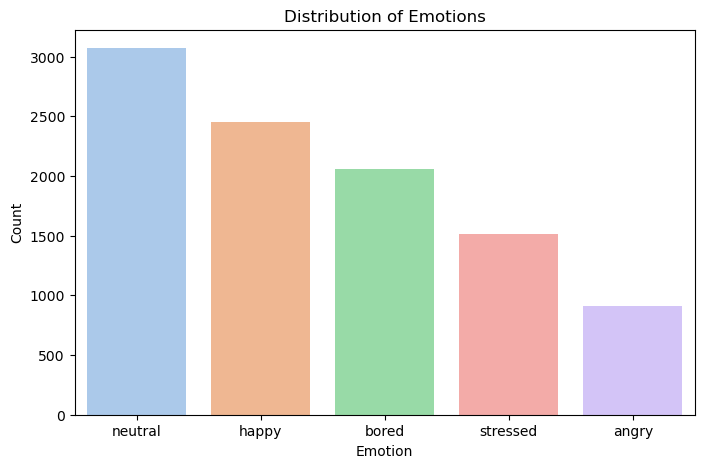

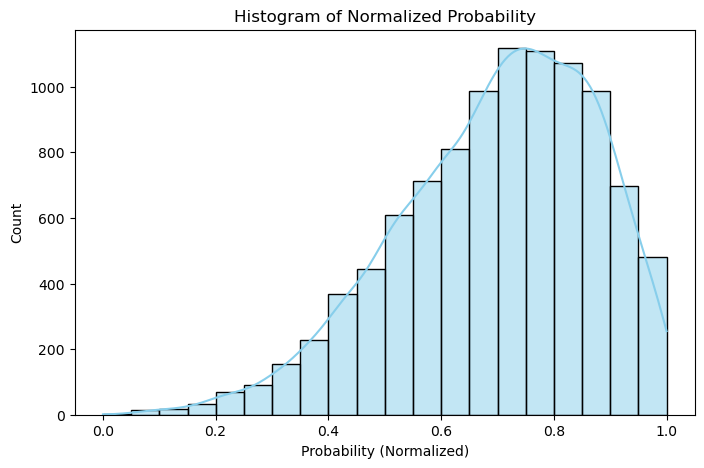

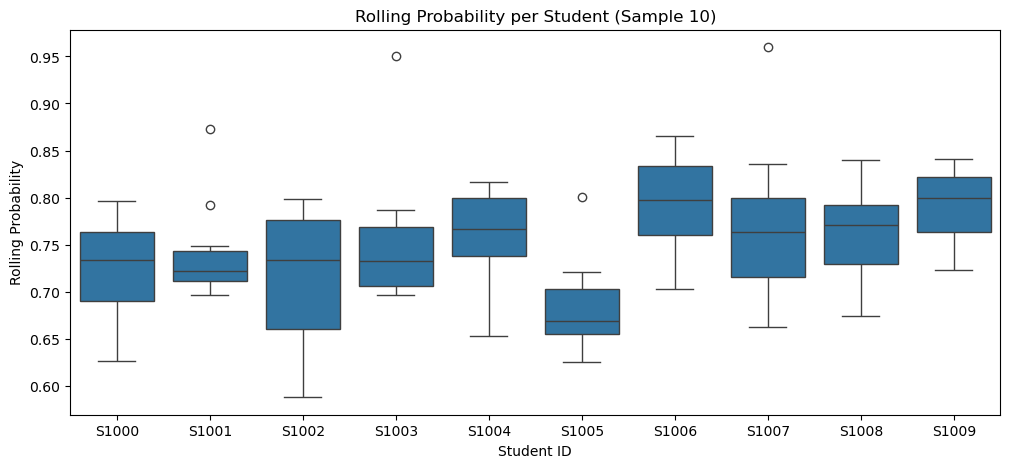

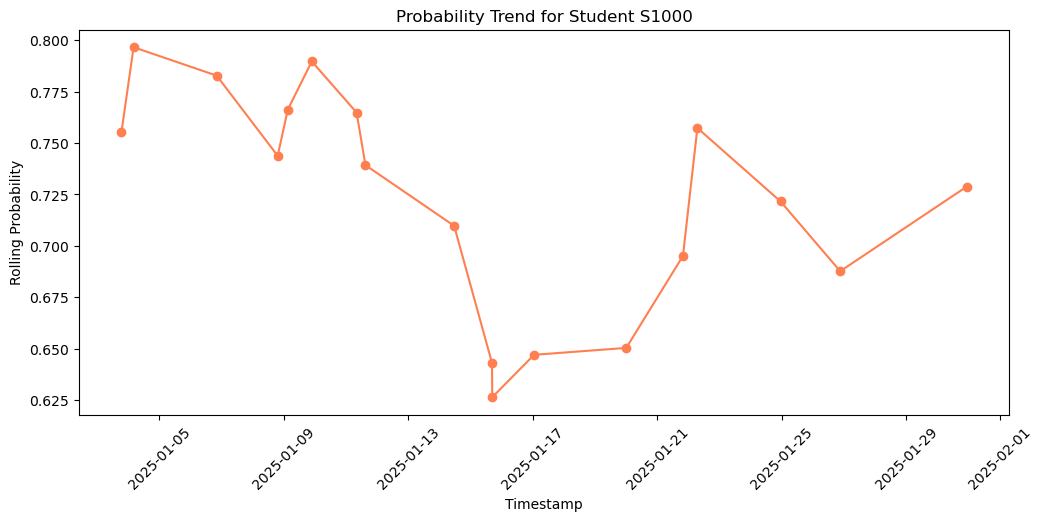

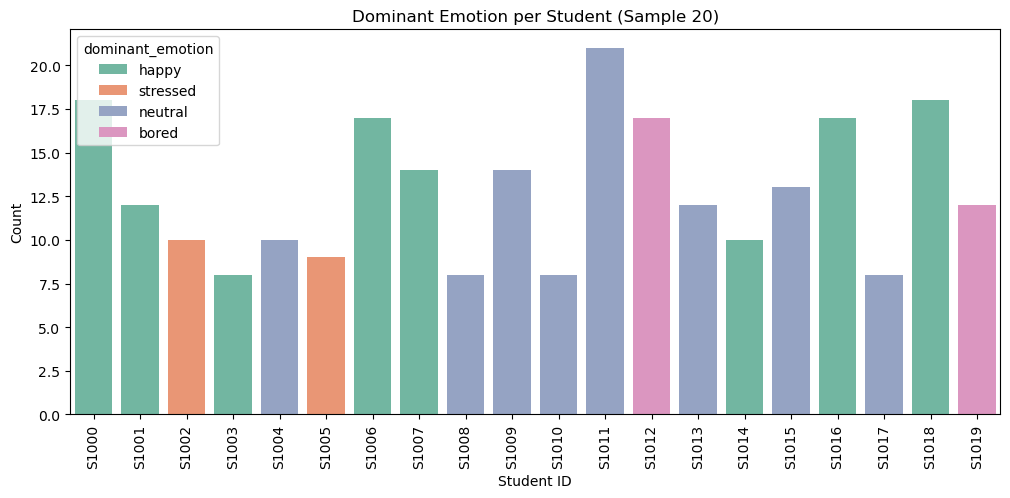


Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\emotion_detection_dataset_processed.csv


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\emotion_detection_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Data Type Fixes
# ---------------------------
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['probability'] = df['probability'].astype(float)

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Normalize probability
scaler = MinMaxScaler()
df['probability_norm'] = scaler.fit_transform(df[['probability']])

# 2️⃣ Rolling average probability per student (mood trend)
df = df.sort_values(['student_id','timestamp'])
df['probability_roll'] = df.groupby('student_id')['probability'].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean()
)

# 3️⃣ Emotion counts per student
emotion_counts = df.groupby(['student_id','emotion']).size().unstack(fill_value=0).reset_index()
df = df.merge(emotion_counts, on='student_id', how='left')

# 4️⃣ Dominant emotion per student
df['dominant_emotion'] = df[['happy','stressed','bored','neutral']].idxmax(axis=1)

# ---------------------------
# Quick Checks
# ---------------------------
print("\nData Types After Preprocessing:")
print(df.dtypes)

print("\nFirst 5 rows after feature engineering:")
print(df.head())

# ---------------------------
# Visualization
# ---------------------------

# 1️⃣ Count of each emotion
plt.figure(figsize=(8,5))
sns.countplot(x='emotion', data=df, order=df['emotion'].value_counts().index, palette='pastel')
plt.title("Distribution of Emotions")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

# 2️⃣ Histogram of normalized probability
plt.figure(figsize=(8,5))
sns.histplot(df['probability_norm'], bins=20, kde=True, color='skyblue')
plt.title("Histogram of Normalized Probability")
plt.xlabel("Probability (Normalized)")
plt.ylabel("Count")
plt.show()

# 3️⃣ Boxplot of rolling probability per student (sample first 10 students)
sample_students = df['student_id'].unique()[:10]
plt.figure(figsize=(12,5))
sns.boxplot(x='student_id', y='probability_roll', data=df[df['student_id'].isin(sample_students)])
plt.title("Rolling Probability per Student (Sample 10)")
plt.xlabel("Student ID")
plt.ylabel("Rolling Probability")
plt.show()

# 4️⃣ Line plot of probability trend for a single student (first student)
student = df['student_id'].iloc[0]
plt.figure(figsize=(12,5))
student_df = df[df['student_id']==student]
plt.plot(student_df['timestamp'], student_df['probability_roll'], marker='o', linestyle='-', color='coral')
plt.title(f"Probability Trend for Student {student}")
plt.xlabel("Timestamp")
plt.ylabel("Rolling Probability")
plt.xticks(rotation=45)
plt.show()

# 5️⃣ Dominant emotion count per student (top 20 students)
plt.figure(figsize=(12,5))
sns.countplot(x='student_id', hue='dominant_emotion', data=df[df['student_id'].isin(df['student_id'].unique()[:20])], palette='Set2')
plt.title("Dominant Emotion per Student (Sample 20)")
plt.xlabel("Student ID")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\emotion_detection_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")


In [163]:
#--------------------------------------------
#Generates 1000 random 64x64 RGB images.
#Generates random labels for 4 classes.
#Splits data into train/test.
#Builds a CNN with 3 Conv layers + Dense layers.
#Trains and evaluates.
#Saves the model as .h5

#---------------------------------------------------

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# ---------------------------
# Parameters
# ---------------------------
NUM_CLASSES = 4        # number of emotion classes
NUM_SAMPLES = 1000     # number of dummy images
IMG_HEIGHT, IMG_WIDTH = 64, 64
BATCH_SIZE = 32
EPOCHS = 5             # reduce for quick testing

# ---------------------------
# Generate Dummy Image Data
# ---------------------------
X = np.random.rand(NUM_SAMPLES, IMG_HEIGHT, IMG_WIDTH, 3)  # Random images
y = np.random.randint(0, NUM_CLASSES, NUM_SAMPLES)         # Random labels

# One-hot encode labels
y = tf.keras.utils.to_categorical(y, NUM_CLASSES)

# ---------------------------
# Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ---------------------------
# CNN Model
# ---------------------------
model = Sequential([
    tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---------------------------
# Train Model
# ---------------------------
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE)

# ---------------------------
# Evaluate Model
# ---------------------------
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy (dummy data): {acc*100:.2f}%")

# ---------------------------
# Save Model
# ---------------------------
model.save(r"C:\Users\Tamim\OneDrive\Documents\dataset\dummy_cnn_model.h5")
print("Dummy CNN model saved successfully!")


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - accuracy: 0.2612 - loss: 1.4010 - val_accuracy: 0.2450 - val_loss: 1.3863
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.2375 - loss: 1.3886 - val_accuracy: 0.2600 - val_loss: 1.3862
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.2262 - loss: 1.3864 - val_accuracy: 0.2600 - val_loss: 1.3861
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.2788 - loss: 1.3861 - val_accuracy: 0.2600 - val_loss: 1.3861
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.2350 - loss: 1.3874 - val_accuracy: 0.2600 - val_loss: 1.3861
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2600 - loss: 1.3861



Test Accuracy (dummy data): 26.00%
Dummy CNN model saved successfully!


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\sleep_detection_dataset_10000.csv")

print(df.head())


  student_id eye_state  sleep_probability  duration_closed_ms  \
0      S2102      open             0.1209                   0   
1      S2435    closed             0.5197                1122   
2      S2270      open             0.0161                   0   
3      S2106    closed             0.3381                 969   
4      S2071      open             0.3090                   0   

             timestamp  
0  2025-01-17 20:44:44  
1  2025-01-10 03:12:23  
2  2025-01-04 05:15:33  
3  2025-01-18 13:15:33  
4  2025-01-20 08:34:23  


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          10000 non-null  object 
 1   eye_state           10000 non-null  object 
 2   sleep_probability   10000 non-null  float64
 3   duration_closed_ms  10000 non-null  int64  
 4   timestamp           10000 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 390.8+ KB


In [43]:
df.describe

<bound method NDFrame.describe of      student_id eye_state  sleep_probability  duration_closed_ms  \
0         S2102      open             0.1209                   0   
1         S2435    closed             0.5197                1122   
2         S2270      open             0.0161                   0   
3         S2106    closed             0.3381                 969   
4         S2071      open             0.3090                   0   
...         ...       ...                ...                 ...   
9995      S2409    closed             1.0000                 916   
9996      S2026      open             0.2284                   0   
9997      S2028      open             0.1946                   0   
9998      S2270      open             0.3470                   0   
9999      S2500      open             0.6078                   0   

                timestamp  
0     2025-01-17 20:44:44  
1     2025-01-10 03:12:23  
2     2025-01-04 05:15:33  
3     2025-01-18 13:15:33  
4     202

In [44]:
df.columns

Index(['student_id', 'eye_state', 'sleep_probability', 'duration_closed_ms',
       'timestamp'],
      dtype='object')


Data Types After Preprocessing:
student_id                        object
eye_state                         object
sleep_probability                float64
duration_closed_ms                 int64
timestamp                 datetime64[ns]
sleep_state                       object
sleep_prob_roll                  float64
total_closed_ms                    int64
hour                               int32
day                               object
sleep_probability_norm           float64
dtype: object

First 5 rows after feature engineering:
  student_id eye_state  sleep_probability  duration_closed_ms  \
0      S2000      open             0.1360                   0   
1      S2000      open             0.2121                   0   
2      S2000    closed             0.3876                1693   
3      S2000    closed             0.6836                2726   
4      S2000      open             0.3171                   0   

            timestamp sleep_state  sleep_prob_roll  total_closed_ms  h

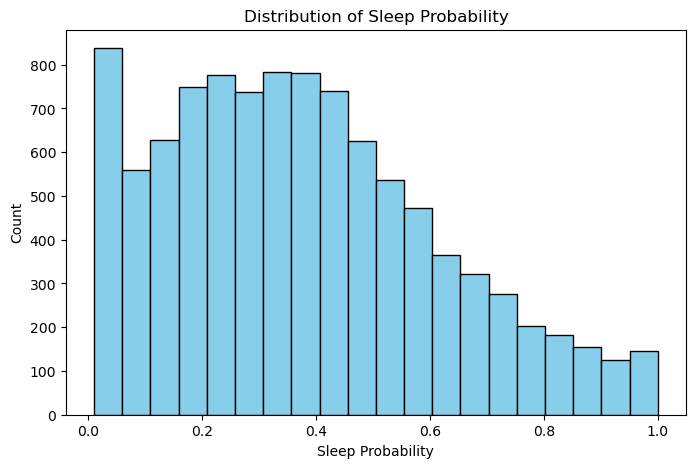

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\221340508.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sleep_state', data=df, palette='Set2')


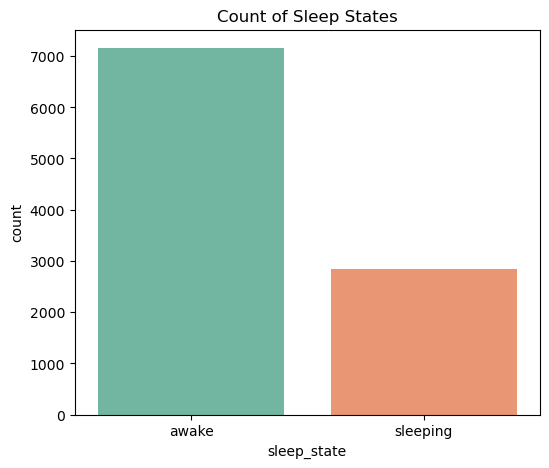

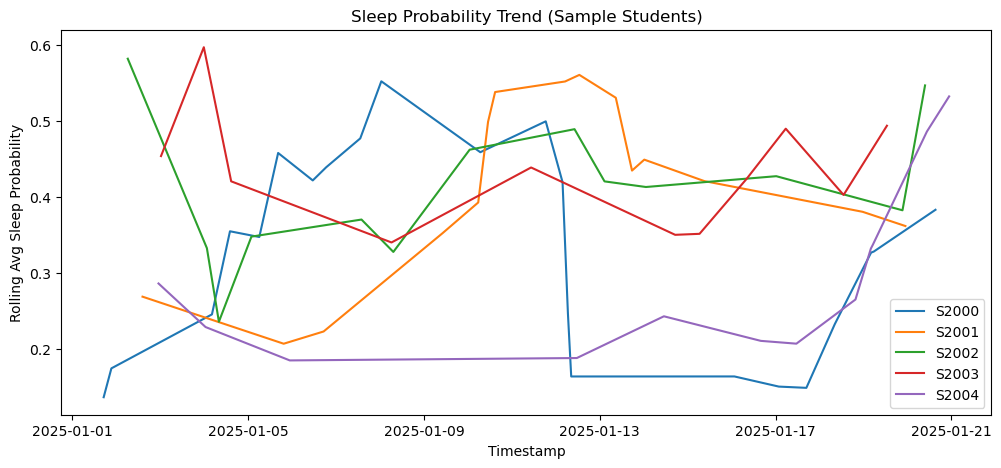

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\221340508.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='student_id', y='total_closed_ms', data=top_closed, palette='Set3')


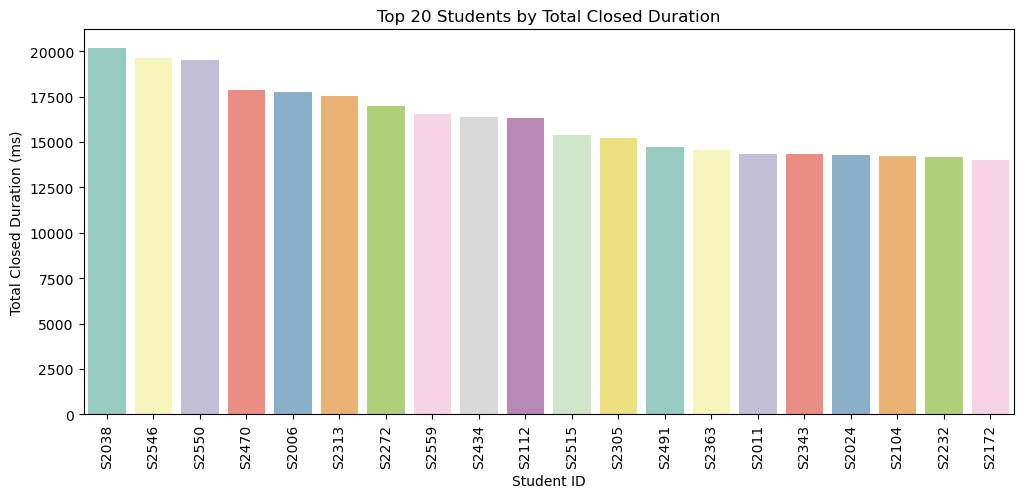


Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\sleep_detection_dataset_processed.csv


In [45]:
#--------------------------------------
#sleep_state → awake / sleeping
#sleep_prob_roll → rolling average per student (sleep trend)
#total_closed_ms → total duration eyes closed per student
#hour, day → timestamp features
#sleep_probability_norm → normalized sleep probability
#-------------------------------------



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\sleep_detection_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Data Type Fixes
# ---------------------------
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['sleep_probability'] = df['sleep_probability'].astype(float)
df['duration_closed_ms'] = df['duration_closed_ms'].astype(int)

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Sleep state flag
df['sleep_state'] = df['sleep_probability'].apply(lambda x: 'sleeping' if x > 0.5 else 'awake')

# 2️⃣ Rolling average sleep probability per student (sleep trend)
df = df.sort_values(['student_id','timestamp'])
df['sleep_prob_roll'] = df.groupby('student_id')['sleep_probability'].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean()
)

# 3️⃣ Total duration eyes closed per student
duration_sum = df.groupby('student_id')['duration_closed_ms'].sum().reset_index(name='total_closed_ms')
df = df.merge(duration_sum, on='student_id', how='left')

# 4️⃣ Hour and day for temporal analysis
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.date

# 5️⃣ Normalized sleep probability
scaler = MinMaxScaler()
df['sleep_probability_norm'] = scaler.fit_transform(df[['sleep_probability']])

# ---------------------------
# Quick Checks
# ---------------------------
print("\nData Types After Preprocessing:")
print(df.dtypes)

print("\nFirst 5 rows after feature engineering:")
print(df.head())

# ---------------------------
# Visualization
# ---------------------------

# 1️⃣ Histogram of sleep probability
plt.figure(figsize=(8,5))
plt.hist(df['sleep_probability'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Sleep Probability")
plt.ylabel("Count")
plt.title("Distribution of Sleep Probability")
plt.show()

# 2️⃣ Sleep state counts
plt.figure(figsize=(6,5))
sns.countplot(x='sleep_state', data=df, palette='Set2')
plt.title("Count of Sleep States")
plt.show()

# 3️⃣ Rolling average sleep probability trend (sample students)
plt.figure(figsize=(12,5))
sample_students = df['student_id'].unique()[:5]
for student in sample_students:
    temp = df[df['student_id']==student]
    plt.plot(temp['timestamp'], temp['sleep_prob_roll'], label=student)
plt.xlabel("Timestamp")
plt.ylabel("Rolling Avg Sleep Probability")
plt.title("Sleep Probability Trend (Sample Students)")
plt.legend()
plt.show()

# 4️⃣ Total closed duration per student (top 20)
top_closed = duration_sum.sort_values(by='total_closed_ms', ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(x='student_id', y='total_closed_ms', data=top_closed, palette='Set3')
plt.title("Top 20 Students by Total Closed Duration")
plt.xlabel("Student ID")
plt.ylabel("Total Closed Duration (ms)")
plt.xticks(rotation=90)
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\sleep_detection_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")


===== RandomForest Evaluation =====
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1425
           1       1.00      1.00      1.00       575

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix:
 [[1425    0]
 [   0  575]]


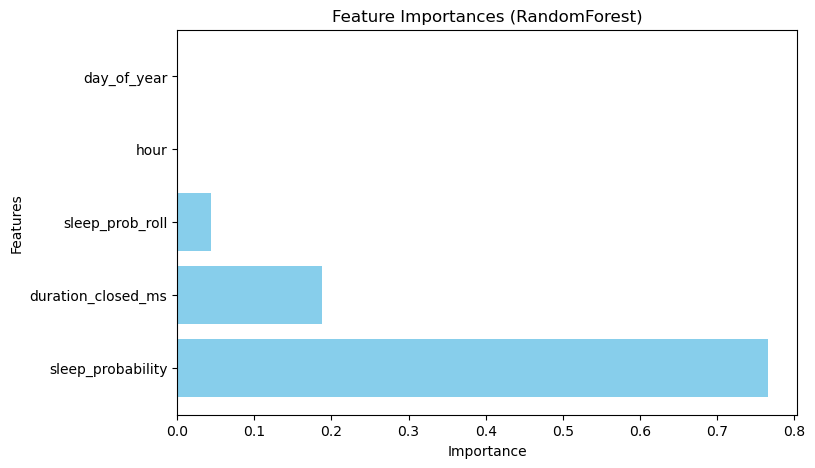

RandomForest model saved at: C:\Users\Tamim\OneDrive\Documents\dataset\sleep_rf_model.pkl


In [165]:
# ---------------------------
# Sleep Detection using RandomForest

#sleep_probability, duration_closed_ms, sleep_prob_roll, hour, day_of_year features নিয়ে RandomForest train করবে
#Train-test split + model evaluation (accuracy, classification report, confusion matrix)
#Feature importance visualize করবে
#Model .pkl ফাইল হিসেবে save করবে
# ---------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---------------------------
# Load Processed Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\sleep_detection_dataset_processed.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Feature Selection
# ---------------------------
# Use numeric features
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour
df['day_of_year'] = pd.to_datetime(df['timestamp']).dt.dayofyear  # numeric day

features = ['sleep_probability', 'duration_closed_ms', 'sleep_prob_roll', 'hour', 'day_of_year']
X = df[features]
y = df['sleep_state'].apply(lambda x: 1 if x=='sleeping' else 0)  # sleeping=1, awake=0

# ---------------------------
# Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# RandomForest Classifier
# ---------------------------
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, y_train)

# ---------------------------
# Predictions & Evaluation
# ---------------------------
y_pred = rf_model.predict(X_test)

print("===== RandomForest Evaluation =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ---------------------------
# Feature Importance
# ---------------------------
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
plt.figure(figsize=(8,5))
plt.barh(features, importances, color='skyblue')
plt.title("Feature Importances (RandomForest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# ---------------------------
# Save RandomForest Model
# ---------------------------
import joblib
model_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\sleep_rf_model.pkl"
joblib.dump(rf_model, model_path)
print(f"RandomForest model saved at: {model_path}")


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\phone_usage_tracking_dataset_10000.csv")

print(df.head())


  student_id  hand_position  phone_detected            timestamp
0      S4102         normal               0  2025-01-22 05:23:08
1      S4435      near_desk               0  2025-01-24 12:10:14
2      S4270         normal               0  2025-01-10 04:03:31
3      S4106  holding_phone               1  2025-01-19 21:12:52
4      S4071         normal               0  2025-01-10 18:38:02


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   student_id      10000 non-null  object
 1   hand_position   10000 non-null  object
 2   phone_detected  10000 non-null  int64 
 3   timestamp       10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [48]:
df.describe

<bound method NDFrame.describe of      student_id  hand_position  phone_detected            timestamp
0         S4102         normal               0  2025-01-22 05:23:08
1         S4435      near_desk               0  2025-01-24 12:10:14
2         S4270         normal               0  2025-01-10 04:03:31
3         S4106  holding_phone               1  2025-01-19 21:12:52
4         S4071         normal               0  2025-01-10 18:38:02
...         ...            ...             ...                  ...
9995      S4236         normal               0  2025-01-16 14:02:19
9996      S4180    near_pocket               0  2025-01-19 04:08:56
9997      S4557      near_desk               0  2025-01-12 23:05:56
9998      S4340         normal               0  2025-01-10 01:51:52
9999      S4457    near_pocket               0  2025-01-16 23:35:11

[10000 rows x 4 columns]>

In [49]:
df.columns

Index(['student_id', 'hand_position', 'phone_detected', 'timestamp'], dtype='object')

In [50]:
df = df.dropna()



Data Types After Preprocessing:
student_id                   object
hand_position                object
phone_detected                int64
timestamp            datetime64[ns]
phone_in_hand                 int64
hour                          int32
day                          object
phone_usage_count             int64
holding_phone                 int64
near_desk                     int64
near_pocket                   int64
normal                        int64
phone_usage_norm            float64
dtype: object

First 5 rows after feature engineering:
  student_id  hand_position  phone_detected           timestamp  \
0      S4102         normal               0 2025-01-22 05:23:08   
1      S4435      near_desk               0 2025-01-24 12:10:14   
2      S4270         normal               0 2025-01-10 04:03:31   
3      S4106  holding_phone               1 2025-01-19 21:12:52   
4      S4071         normal               0 2025-01-10 18:38:02   

   phone_in_hand  hour         day  phone

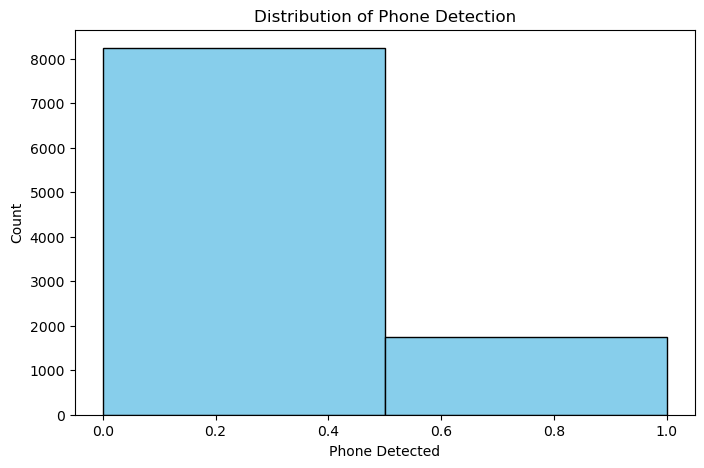

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\253328183.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hand_position', data=df, palette='Set2', order=df['hand_position'].value_counts().index)


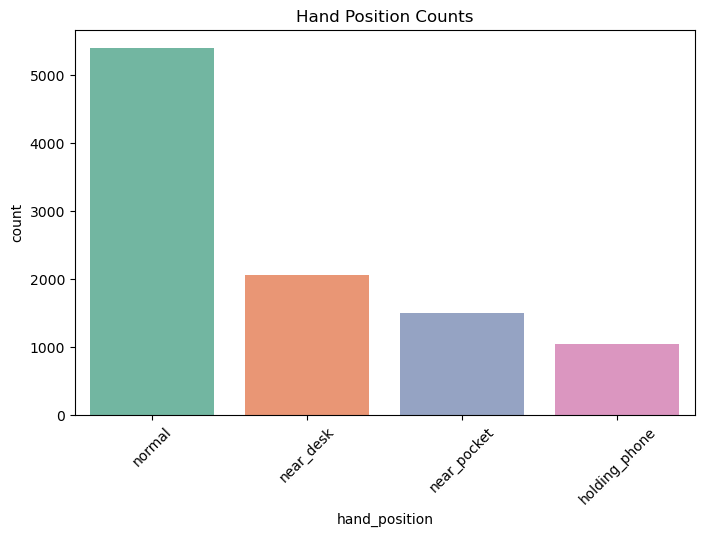

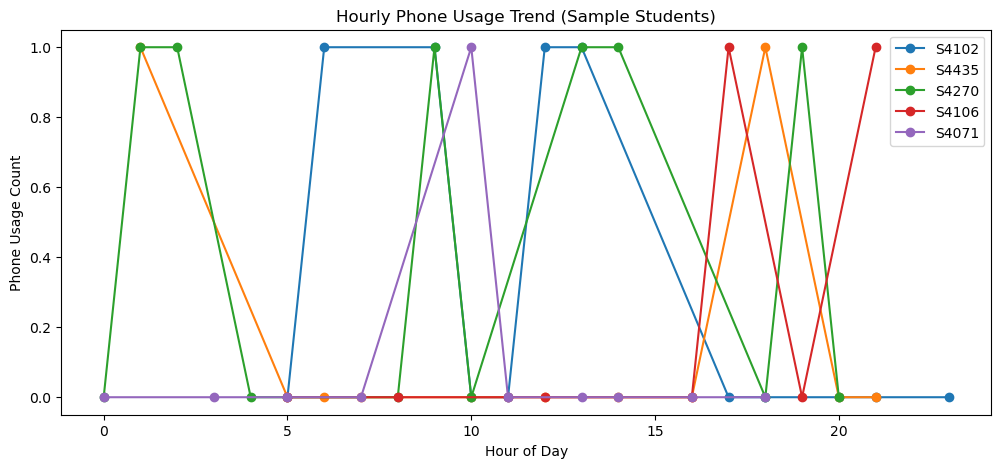

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\253328183.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='student_id', y='phone_usage_count', data=top_phone, palette='Set3')


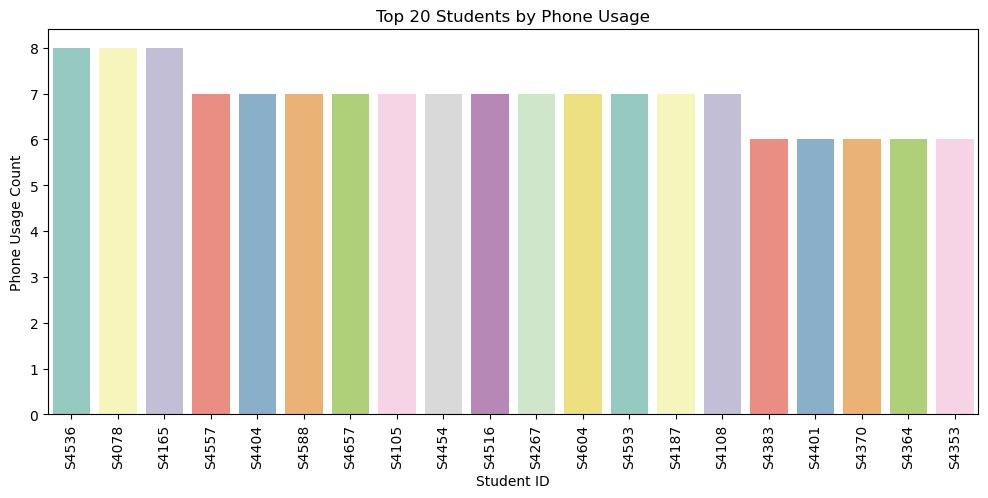


Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\phone_usage_tracking_dataset_processed.csv


In [51]:
#-----------------------------------------
#Data preprocessing: timestamp → datetime, numeric type fix
#Feature engineering:
#Frequency of phone usage per student (per hour)
#Hand position counts per student
#Flag phone_in_hand if hand_position = holding_phone or phone_detected = 1
#Hour/day features
#Visualization:
#Histogram of phone detected
#Phone usage counts per hand position
#Hourly phone usage trend
#Top students by phone usage

#-------------------------------------------


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\phone_usage_tracking_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Data Type Fixes
# ---------------------------
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['phone_detected'] = df['phone_detected'].astype(int)

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Flag if phone in hand
df['phone_in_hand'] = df.apply(lambda x: 1 if x['hand_position']=='holding_phone' or x['phone_detected']==1 else 0, axis=1)

# 2️⃣ Hour and day for temporal analysis
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.date

# 3️⃣ Frequency of phone usage per student (total phone_in_hand)
phone_freq = df.groupby('student_id')['phone_in_hand'].sum().reset_index(name='phone_usage_count')
df = df.merge(phone_freq, on='student_id', how='left')

# 4️⃣ Hand position counts per student
hand_counts = df.groupby(['student_id','hand_position']).size().unstack(fill_value=0).reset_index()
df = df.merge(hand_counts, on='student_id', how='left')

# 5️⃣ Normalized phone usage count
scaler = MinMaxScaler()
df['phone_usage_norm'] = scaler.fit_transform(df[['phone_usage_count']])

# ---------------------------
# Quick Checks
# ---------------------------
print("\nData Types After Preprocessing:")
print(df.dtypes)

print("\nFirst 5 rows after feature engineering:")
print(df.head())

# ---------------------------
# Visualization
# ---------------------------

# 1️⃣ Histogram of phone detected
plt.figure(figsize=(8,5))
plt.hist(df['phone_detected'], bins=2, color='skyblue', edgecolor='black')
plt.xlabel("Phone Detected")
plt.ylabel("Count")
plt.title("Distribution of Phone Detection")
plt.show()

# 2️⃣ Phone usage counts per hand position
plt.figure(figsize=(8,5))
sns.countplot(x='hand_position', data=df, palette='Set2', order=df['hand_position'].value_counts().index)
plt.title("Hand Position Counts")
plt.xticks(rotation=45)
plt.show()

# 3️⃣ Hourly phone usage trend (sample students)
plt.figure(figsize=(12,5))
sample_students = df['student_id'].unique()[:5]
for student in sample_students:
    temp = df[df['student_id']==student].groupby('hour')['phone_in_hand'].sum().reset_index()
    plt.plot(temp['hour'], temp['phone_in_hand'], marker='o', label=student)
plt.xlabel("Hour of Day")
plt.ylabel("Phone Usage Count")
plt.title("Hourly Phone Usage Trend (Sample Students)")
plt.legend()
plt.show()

# 4️⃣ Top students by total phone usage
top_phone = phone_freq.sort_values(by='phone_usage_count', ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(x='student_id', y='phone_usage_count', data=top_phone, palette='Set3')
plt.title("Top 20 Students by Phone Usage")
plt.xlabel("Student ID")
plt.ylabel("Phone Usage Count")
plt.xticks(rotation=90)
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\phone_usage_tracking_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")


===== RandomForest Evaluation =====
Accuracy: 0.798

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1618
           1       0.13      0.01      0.02       382

    accuracy                           0.80      2000
   macro avg       0.47      0.50      0.45      2000
weighted avg       0.68      0.80      0.72      2000


Confusion Matrix:
 [[1592   26]
 [ 378    4]]


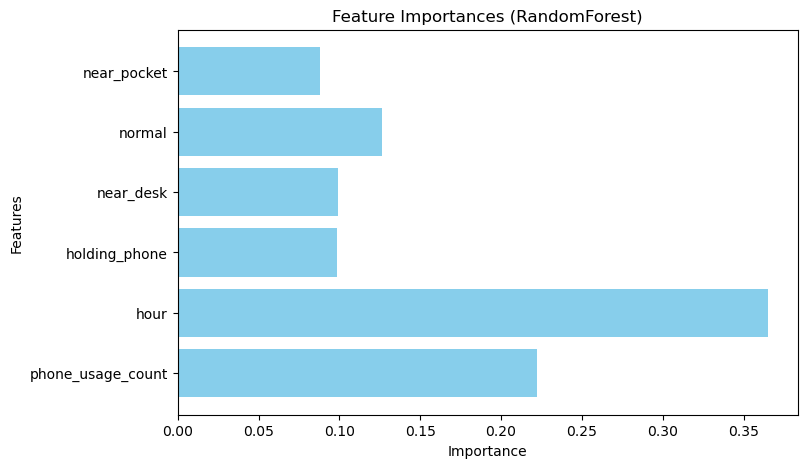

RandomForest model saved at: C:\Users\Tamim\OneDrive\Documents\dataset\phone_usage_rf_model.pkl


In [166]:
# ---------------------------
# Phone Usage Detection using RandomForest
#phone_in_hand কে target হিসেবে ব্যবহার করে RandomForest train করা।
#Train-test split + evaluation metrics দেখানো (accuracy, classification report, confusion matrix)।
#Feature importance visualize করা।
#Model .pkl ফাইল হিসেবে save করা।
# ---------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# ---------------------------
# Load Processed Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\phone_usage_tracking_dataset_processed.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Feature Selection
# ---------------------------
# Hand position counts + phone usage count + hour
hand_positions = ['holding_phone', 'near_desk', 'normal', 'near_pocket']  # columns created during preprocessing
features = ['phone_usage_count', 'hour'] + hand_positions
X = df[features]
y = df['phone_in_hand']  # target

# ---------------------------
# Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# RandomForest Classifier
# ---------------------------
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, y_train)

# ---------------------------
# Predictions & Evaluation
# ---------------------------
y_pred = rf_model.predict(X_test)

print("===== RandomForest Evaluation =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ---------------------------
# Feature Importance
# ---------------------------
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
plt.figure(figsize=(8,5))
plt.barh(features, importances, color='skyblue')
plt.title("Feature Importances (RandomForest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# ---------------------------
# Save RandomForest Model
# ---------------------------
model_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\phone_usage_rf_model.pkl"
joblib.dump(rf_model, model_path)
print(f"RandomForest model saved at: {model_path}")


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\group_disturbance_dataset_10000.csv")

print(df.head())


  group_id                                        student_ids  noise_level  \
0    G1102  ["S5074", "S5378", "S5071", "S5138", "S5426", ...        0.858   
1    G1092  ["S5686", "S5372", "S5377", "S5434", "S5273", ...        0.324   
2    G1014  ["S5652", "S5514", "S5154", "S5183", "S5170", ...        0.235   
3    G1106      ["S5137", "S5074", "S5377", "S5208", "S5426"]        0.290   
4    G1071                        ["S5728", "S5024", "S5367"]        0.573   

   gesture_score  event_detected            timestamp  
0          0.740               1  2025-02-11 06:31:00  
1          0.666               0  2025-02-06 17:21:00  
2          0.277               0  2025-02-17 00:26:00  
3          0.284               0  2025-02-08 14:25:00  
4          0.581               1  2025-02-21 04:53:00  


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   group_id        10000 non-null  object 
 1   student_ids     10000 non-null  object 
 2   noise_level     10000 non-null  float64
 3   gesture_score   10000 non-null  float64
 4   event_detected  10000 non-null  int64  
 5   timestamp       10000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 468.9+ KB


In [54]:
df.describe

<bound method NDFrame.describe of      group_id                                        student_ids  noise_level  \
0       G1102  ["S5074", "S5378", "S5071", "S5138", "S5426", ...        0.858   
1       G1092  ["S5686", "S5372", "S5377", "S5434", "S5273", ...        0.324   
2       G1014  ["S5652", "S5514", "S5154", "S5183", "S5170", ...        0.235   
3       G1106      ["S5137", "S5074", "S5377", "S5208", "S5426"]        0.290   
4       G1071                        ["S5728", "S5024", "S5367"]        0.573   
...       ...                                                ...          ...   
9995    G1050  ["S5756", "S5078", "S5110", "S5074", "S5008", ...        0.256   
9996    G1138  ["S5434", "S5049", "S5636", "S5500", "S5168", ...        0.355   
9997    G1070  ["S5731", "S5069", "S5179", "S5437", "S5491", ...        0.266   
9998    G1038                        ["S5101", "S5331", "S5463"]        0.128   
9999    G1068  ["S5724", "S5498", "S5136", "S5069", "S5018", ...        0.0

In [55]:
df.columns

Index(['group_id', 'student_ids', 'noise_level', 'gesture_score',
       'event_detected', 'timestamp'],
      dtype='object')

In [56]:
df = df.dropna()



Data Types After Preprocessing:
group_id                          object
student_ids                       object
noise_level                      float64
gesture_score                    float64
event_detected                     int64
timestamp                 datetime64[ns]
group_size                         int64
disturbance_score                float64
noise_level_roll                 float64
event_count                        int64
disturbance_score_norm           float64
dtype: object

First 5 rows after feature engineering:
  group_id                                        student_ids  noise_level  \
0    G1000                              [S5008, S5229, S5607]        0.167   
1    G1000                       [S5584, S5246, S5644, S5797]        0.128   
2    G1000  [S5107, S5599, S5058, S5023, S5792, S5128, S50...        0.637   
3    G1000         [S5382, S5066, S5042, S5363, S5041, S5748]        0.144   
4    G1000                       [S5430, S5580, S5381, S5384]        0.

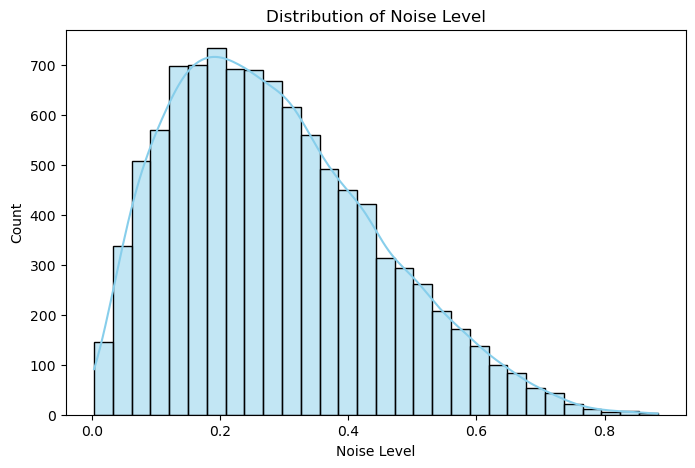

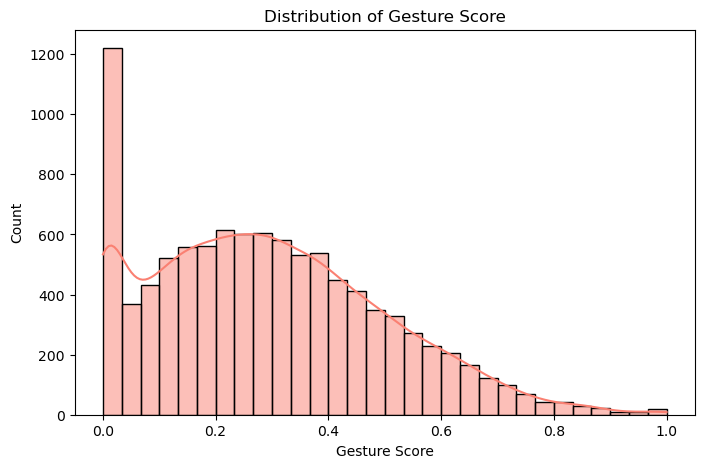

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\1702724818.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='group_id', y='disturbance_score', data=top_groups, palette='Set2')


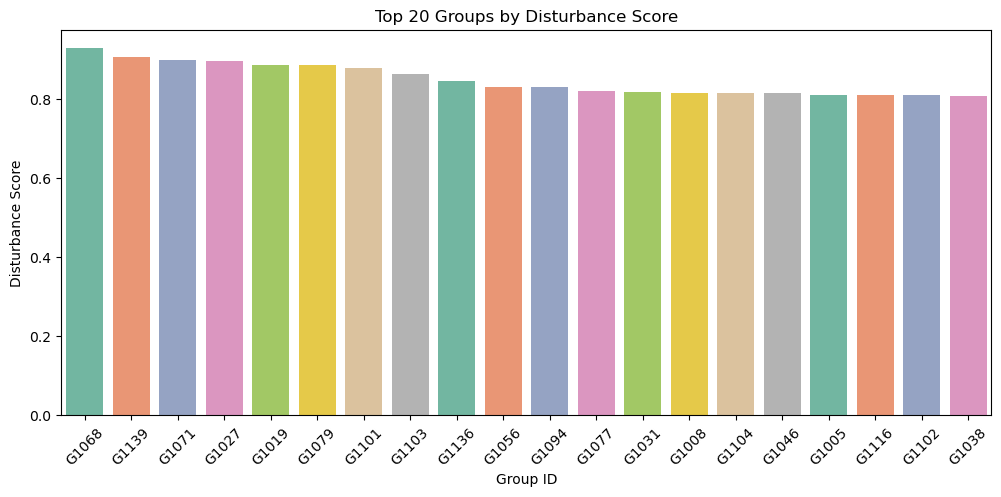

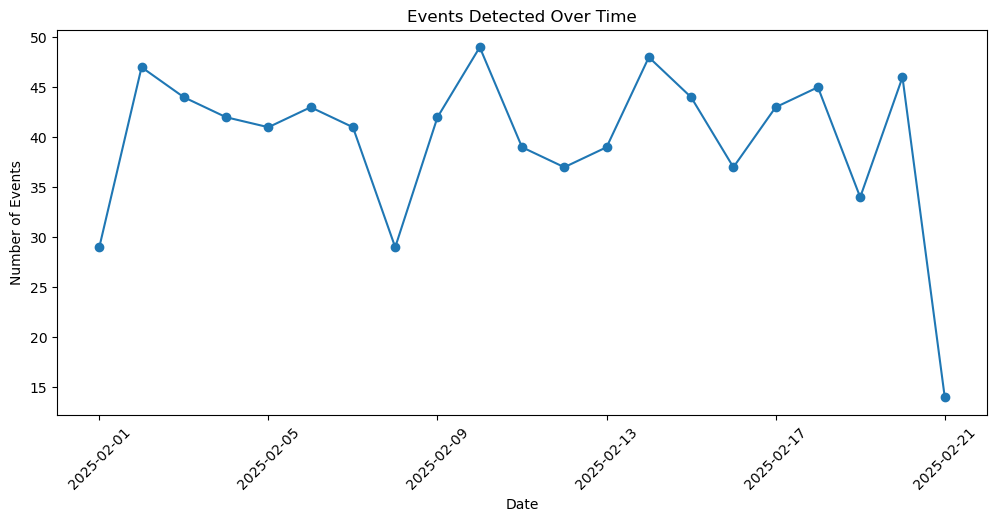


Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\group_disturbance_dataset_processed.csv


In [57]:
#-----------------------------------------------
#Data preprocessing:
#timestamp → datetime
#student_ids → convert from string to list
#Feature engineering:
#group_size → number of students in group
#disturbance_score → weighted sum of noise_level + gesture_score
#Rolling average of noise_level per group or student (optional)
#Event frequency per group
#Visualization:
#Distribution of noise_level
#Distribution of gesture_score
#Top groups by disturbance_score
#Event occurrence over time

#---------------------------



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\group_disturbance_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Data Type Fixes
# ---------------------------
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Convert student_ids from string to list
df['student_ids'] = df['student_ids'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Group size
df['group_size'] = df['student_ids'].apply(len)

# 2️⃣ Disturbance score (weighted sum)
df['disturbance_score'] = 0.6*df['noise_level'] + 0.4*df['gesture_score']

# 3️⃣ Rolling average noise_level per group
df = df.sort_values(['group_id','timestamp'])
df['noise_level_roll'] = df.groupby('group_id')['noise_level'].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean()
)

# 4️⃣ Event frequency per group
event_freq = df.groupby('group_id')['event_detected'].sum().reset_index(name='event_count')
df = df.merge(event_freq, on='group_id', how='left')

# 5️⃣ Normalize disturbance_score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['disturbance_score_norm'] = scaler.fit_transform(df[['disturbance_score']])

# ---------------------------
# Quick Checks
# ---------------------------
print("\nData Types After Preprocessing:")
print(df.dtypes)

print("\nFirst 5 rows after feature engineering:")
print(df.head())

# ---------------------------
# Visualization
# ---------------------------

# 1️⃣ Distribution of noise_level
plt.figure(figsize=(8,5))
sns.histplot(df['noise_level'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Noise Level")
plt.xlabel("Noise Level")
plt.ylabel("Count")
plt.show()

# 2️⃣ Distribution of gesture_score
plt.figure(figsize=(8,5))
sns.histplot(df['gesture_score'], bins=30, kde=True, color='salmon')
plt.title("Distribution of Gesture Score")
plt.xlabel("Gesture Score")
plt.ylabel("Count")
plt.show()

# 3️⃣ Top 20 groups by disturbance_score
top_groups = df.groupby('group_id')['disturbance_score'].max().sort_values(ascending=False).head(20).reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x='group_id', y='disturbance_score', data=top_groups, palette='Set2')
plt.title("Top 20 Groups by Disturbance Score")
plt.xlabel("Group ID")
plt.ylabel("Disturbance Score")
plt.xticks(rotation=45)
plt.show()

# 4️⃣ Event occurrence over time
plt.figure(figsize=(12,5))
df.groupby(df['timestamp'].dt.date)['event_detected'].sum().plot(marker='o')
plt.title("Events Detected Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\group_disturbance_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")


C:\Users\Tamim\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9366 - loss: 0.1912 - val_accuracy: 0.9706 - val_loss: 0.0792
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9628 - loss: 0.0838 - val_accuracy: 0.9831 - val_loss: 0.0528
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9750 - loss: 0.0594 - val_accuracy: 0.9887 - val_loss: 0.0333
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9772 - loss: 0.0542 - val_accuracy: 0.9900 - val_loss: 0.0288
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9831 - loss: 0.0420 - val_accuracy: 0.9912 - val_loss: 0.0224
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9830 - loss: 0.0394 - val_accuracy: 0.9869 - val_loss: 0.0259
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9870 - loss: 0.0336 - val_accuracy: 0.9925 - val_loss: 0.0173
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9880 - loss: 0.0277 - val_accuracy: 0.

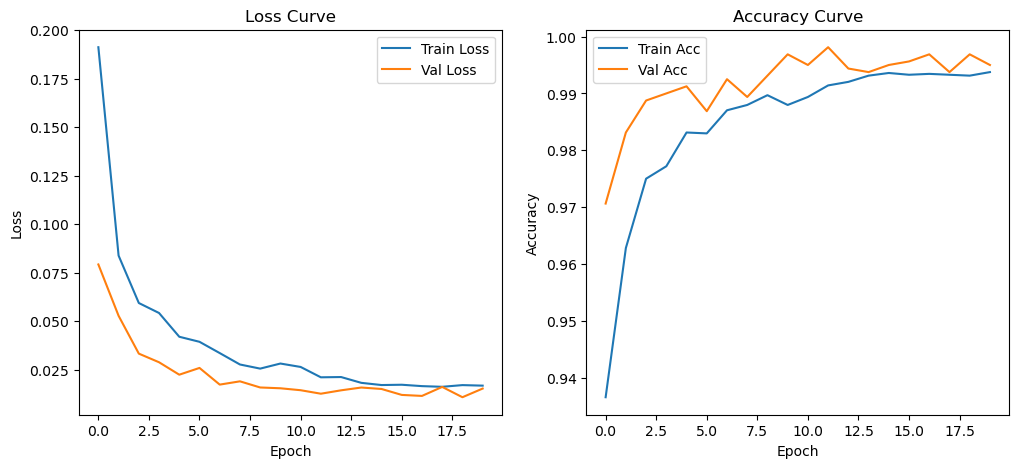

In [167]:
#-------------------------------------------
#Learns patterns from:
#Noise level
#Gesture score
#Group size
#Rolling noise
#Disturbance score
#Event frequency
#✔ Predicts:
#Whether a disturbance event happened (0/1) based on these behavioral features.

#------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\group_disturbance_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Preprocessing
# ---------------------------
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['student_ids'] = df['student_ids'].apply(lambda x: ast.literal_eval(x))

# Feature Engineering
df['group_size'] = df['student_ids'].apply(len)
df['disturbance_score'] = 0.6*df['noise_level'] + 0.4*df['gesture_score']

df = df.sort_values(['group_id','timestamp'])
df['noise_level_roll'] = df.groupby('group_id')['noise_level'].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean()
)

event_freq = df.groupby('group_id')['event_detected'].sum().reset_index(name='event_count')
df = df.merge(event_freq, on='group_id', how='left')

# ---------------------------
# Select Features for DNN
# ---------------------------
features = [
    'noise_level',
    'gesture_score',
    'group_size',
    'disturbance_score',
    'noise_level_roll',
    'event_count'
]

X = df[features]
y = df['event_detected']

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# Scaling
# ---------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------------------
# DNN Model (Keras)
# ---------------------------
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(16, activation='relu'),

    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ---------------------------
# Train Model
# ---------------------------
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ---------------------------
# Predictions
# ---------------------------
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# ---------------------------
# Visualization: Loss & Accuracy
# ---------------------------
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\engagement_score_dataset.csv")

print(df.head())


   student_id  eye_gaze_score  head_movement_score  hand_raise_count  \
0        1059            0.98                 0.96                 3   
1        1100            0.92                 0.63                 4   
2        1003            0.77                 0.16                 3   
3        1058            0.73                 0.06                 5   
4        1018            0.99                 0.24                 3   

   question_asked_count  engagement_score                   timestamp  
0                     1             0.833  2025-12-05 23:29:33.384517  
1                     1             0.750  2025-12-05 22:56:46.384517  
2                     0             0.476  2025-12-05 23:07:54.384517  
3                     3             0.610  2025-12-05 23:07:59.384517  
4                     1             0.621  2025-12-05 22:56:47.384517  


In [59]:
df.columns

Index(['student_id', 'eye_gaze_score', 'head_movement_score',
       'hand_raise_count', 'question_asked_count', 'engagement_score',
       'timestamp'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            300 non-null    int64  
 1   eye_gaze_score        300 non-null    float64
 2   head_movement_score   300 non-null    float64
 3   hand_raise_count      300 non-null    int64  
 4   question_asked_count  300 non-null    int64  
 5   engagement_score      300 non-null    float64
 6   timestamp             300 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 16.5+ KB


In [61]:
df.describe

<bound method NDFrame.describe of      student_id  eye_gaze_score  head_movement_score  hand_raise_count  \
0          1059            0.98                 0.96                 3   
1          1100            0.92                 0.63                 4   
2          1003            0.77                 0.16                 3   
3          1058            0.73                 0.06                 5   
4          1018            0.99                 0.24                 3   
..          ...             ...                  ...               ...   
295        1026            0.26                 0.77                 5   
296        1043            0.48                 0.58                 4   
297        1028            0.45                 0.40                 0   
298        1053            0.53                 0.98                 5   
299        1097            0.78                 0.28                 0   

     question_asked_count  engagement_score                   timestamp  
0  

In [62]:
df = df.dropna()


Data Types After Preprocessing:
student_id                       int64
eye_gaze_score                 float64
head_movement_score            float64
hand_raise_count                 int64
question_asked_count             int64
engagement_score               float64
timestamp               datetime64[ns]
engagement_norm                float64
attention_score                float64
engagement_roll                float64
dtype: object

First 5 rows after feature engineering:
     student_id  eye_gaze_score  head_movement_score  hand_raise_count  \
259        1001            0.96                 0.69                 0   
74         1002            0.59                 0.09                 1   
38         1002            0.06                 0.73                 1   
2          1003            0.77                 0.16                 3   
292        1003            0.76                 0.77                 2   

     question_asked_count  engagement_score                  timestamp  \
259

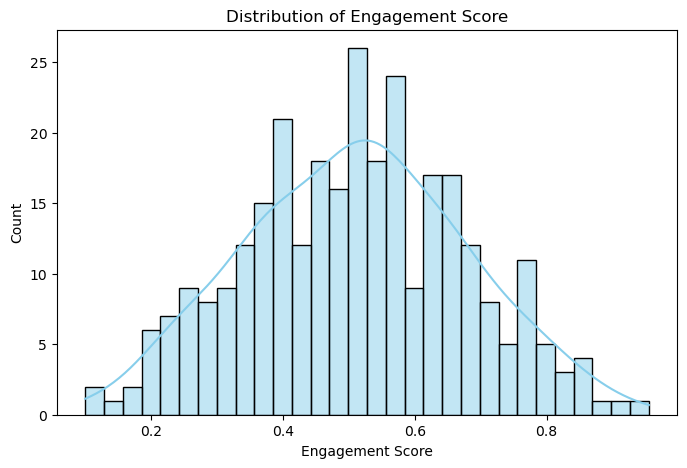

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\503862916.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='student_id', y='engagement_score', data=top_students, palette='Set2')


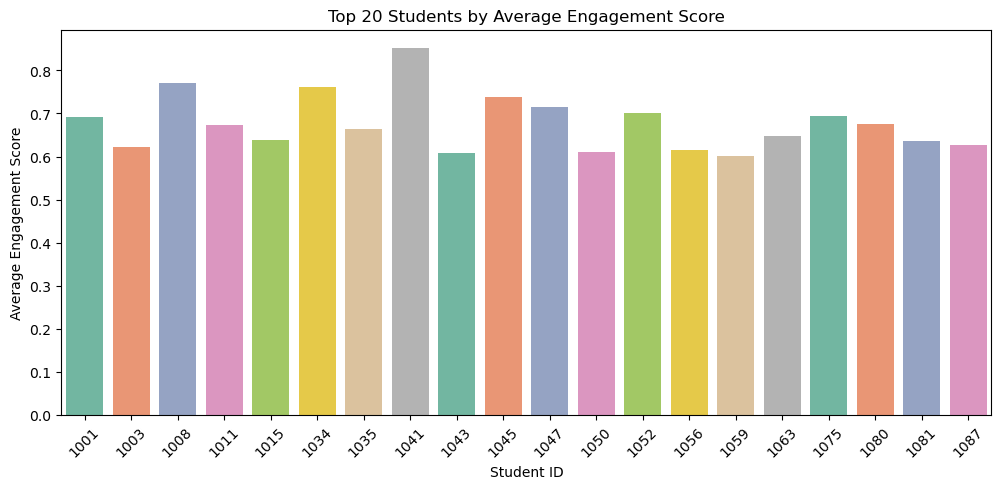

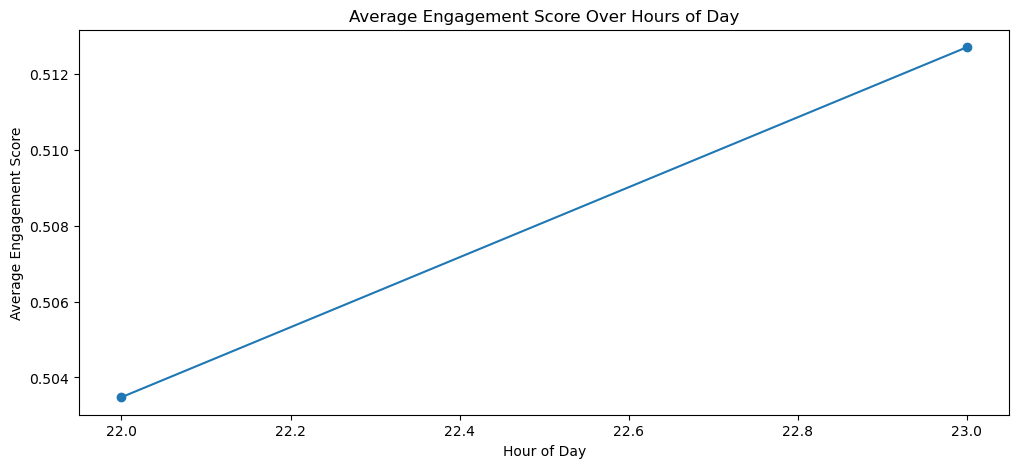


Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\engagement_score_dataset_processed.csv


In [63]:
#------------------------------------------
Data preprocessing:
timestamp → datetime
Scores normalize করা
Feature engineering:
engagement_norm → normalized engagement_score
attention_score → weighted formula (eye_gaze_score + head_movement_score + hand_raise_count + question_asked_count)
Rolling average engagement per student (optional, mood trend)
Visualization:
Distribution of engagement_score
Top students by engagement_score
Engagement over time per student
#-----------------------------------------


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\engagement_score_dataset.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Data Type Fixes
# ---------------------------
df['timestamp'] = pd.to_datetime(df['timestamp'])

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Normalize engagement_score
scaler = MinMaxScaler()
df['engagement_norm'] = scaler.fit_transform(df[['engagement_score']])

# 2️⃣ Weighted attention_score
df['attention_score'] = (
    0.4*df['eye_gaze_score'] + 
    0.3*df['head_movement_score'] + 
    0.2*(df['hand_raise_count']/df['hand_raise_count'].max()) + 
    0.1*(df['question_asked_count']/df['question_asked_count'].max())
)

# 3️⃣ Rolling average engagement per student
df = df.sort_values(['student_id','timestamp'])
df['engagement_roll'] = df.groupby('student_id')['engagement_score'].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean()
)

# ---------------------------
# Quick Checks
# ---------------------------
print("\nData Types After Preprocessing:")
print(df.dtypes)

print("\nFirst 5 rows after feature engineering:")
print(df.head())

# ---------------------------
# Visualization
# ---------------------------

# 1️⃣ Distribution of engagement_score
plt.figure(figsize=(8,5))
sns.histplot(df['engagement_score'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Engagement Score")
plt.xlabel("Engagement Score")
plt.ylabel("Count")
plt.show()

# 2️⃣ Top 20 students by engagement_score
top_students = df.groupby('student_id')['engagement_score'].mean().sort_values(ascending=False).head(20).reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x='student_id', y='engagement_score', data=top_students, palette='Set2')
plt.title("Top 20 Students by Average Engagement Score")
plt.xlabel("Student ID")
plt.ylabel("Average Engagement Score")
plt.xticks(rotation=45)
plt.show()

# 3️⃣ Engagement over time
plt.figure(figsize=(12,5))
df.groupby(df['timestamp'].dt.hour)['engagement_score'].mean().plot(marker='o')
plt.title("Average Engagement Score Over Hours of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Engagement Score")
plt.xticks(rotation=0)
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\engagement_score_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")


R² Score: 0.9999978148918133
MSE: 5.7096291796823945e-08


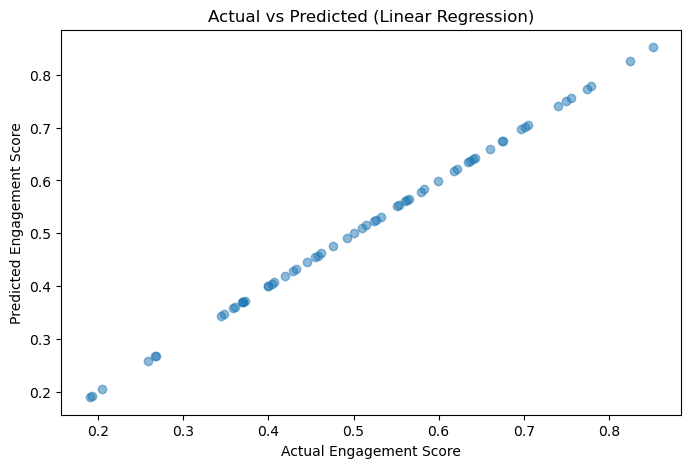

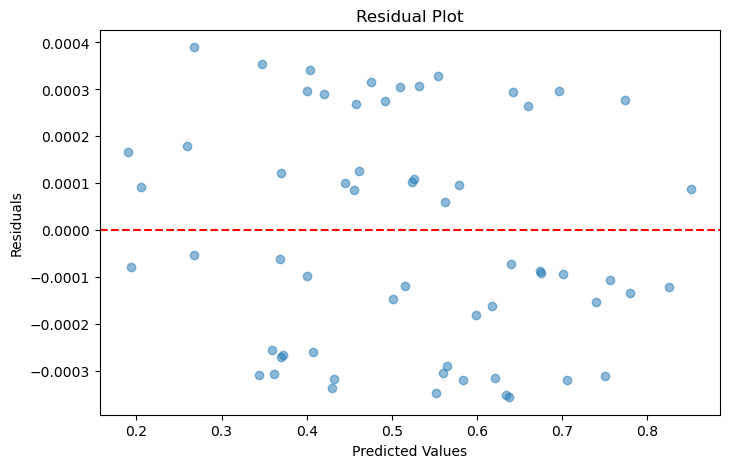

In [168]:
#--------------------------------
#Linear Regression ভালো কাজ করবে যখন:

#✔ relationship roughly linear
#✔ data clean (no extreme outliers)
#✔ features explain engagement clearly
#---------------------------



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\engagement_score_dataset.csv"
df = pd.read_csv(file_path)

df['timestamp'] = pd.to_datetime(df['timestamp'])


# ---------------------------
# Feature Engineering
# ---------------------------
df['engagement_norm'] = (df['engagement_score'] - df['engagement_score'].min()) / \
                         (df['engagement_score'].max() - df['engagement_score'].min())

df['attention_score'] = (
    0.4*df['eye_gaze_score'] +
    0.3*df['head_movement_score'] +
    0.2*(df['hand_raise_count']/df['hand_raise_count'].max()) +
    0.1*(df['question_asked_count']/df['question_asked_count'].max())
)

df = df.sort_values(['student_id','timestamp'])
df['engagement_roll'] = df.groupby('student_id')['engagement_score'].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean()
)


# ---------------------------
# Prepare Data
# ---------------------------
features = [
    'eye_gaze_score',
    'head_movement_score',
    'hand_raise_count',
    'question_asked_count',
    'attention_score',
    'engagement_roll'
]

X = df[features]
y = df['engagement_score']


# ---------------------------
# Train Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# ---------------------------
# Linear Regression Model
# ---------------------------
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# ---------------------------
# Evaluation
# ---------------------------
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("MSE:", mse)


# ---------------------------
# Visualization: Actual vs Predicted
# ---------------------------
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Engagement Score")
plt.ylabel("Predicted Engagement Score")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()


# ---------------------------
# Visualization: Residual Plot
# ---------------------------
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\attention_timeline_dataset_10000.csv")

print(df.head())


  student_id            timestamp  attention_state  probability
0      S6102  2025-03-06 04:03:00                1        0.725
1      S6435  2025-03-15 21:12:00                0        0.265
2      S6270  2025-03-06 18:38:00                1        0.652
3      S6106  2025-03-09 22:39:00                1        0.706
4      S6071  2025-03-09 20:03:00                1        0.810


In [65]:
df = df.dropna()


In [66]:
df.columns


Index(['student_id', 'timestamp', 'attention_state', 'probability'], dtype='object')

In [67]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       10000 non-null  object 
 1   timestamp        10000 non-null  object 
 2   attention_state  10000 non-null  int64  
 3   probability      10000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 312.6+ KB


In [68]:
df.describe

<bound method NDFrame.describe of      student_id            timestamp  attention_state  probability
0         S6102  2025-03-06 04:03:00                1        0.725
1         S6435  2025-03-15 21:12:00                0        0.265
2         S6270  2025-03-06 18:38:00                1        0.652
3         S6106  2025-03-09 22:39:00                1        0.706
4         S6071  2025-03-09 20:03:00                1        0.810
...         ...                  ...              ...          ...
9995      S6236  2025-03-06 13:06:00                1        0.816
9996      S6180  2025-03-06 14:31:00                1        0.728
9997      S6557  2025-03-10 08:36:00                1        0.623
9998      S6340  2025-03-04 20:20:00                1        0.898
9999      S6457  2025-03-15 00:37:00                1        0.687

[10000 rows x 4 columns]>


Data Types After Preprocessing:
student_id                      object
timestamp               datetime64[ns]
attention_state                  int64
probability                    float64
probability_norm               float64
rolling_attention              float64
attentive_percentage           float64
dtype: object

First 5 rows after feature engineering:
  student_id           timestamp  attention_state  probability  \
0      S6000 2025-03-02 11:39:00                1        0.834   
1      S6000 2025-03-03 01:40:00                1        0.844   
2      S6000 2025-03-03 03:56:00                0        0.224   
3      S6000 2025-03-04 07:16:00                0        0.342   
4      S6000 2025-03-06 00:12:00                1        0.720   

   probability_norm  rolling_attention  attentive_percentage  
0             0.834             0.8340              0.578947  
1             0.844             0.8390              0.578947  
2             0.224             0.6340              0

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\1580898189.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='attention_state', data=df, palette='Set1')


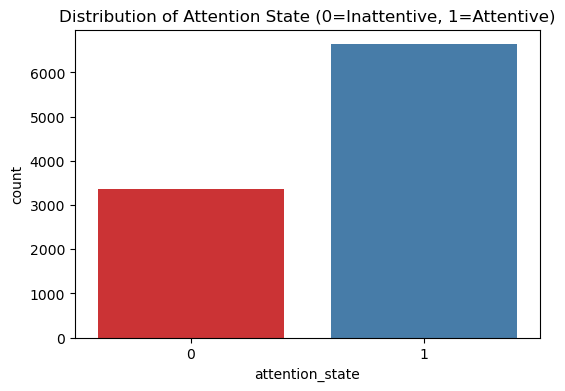

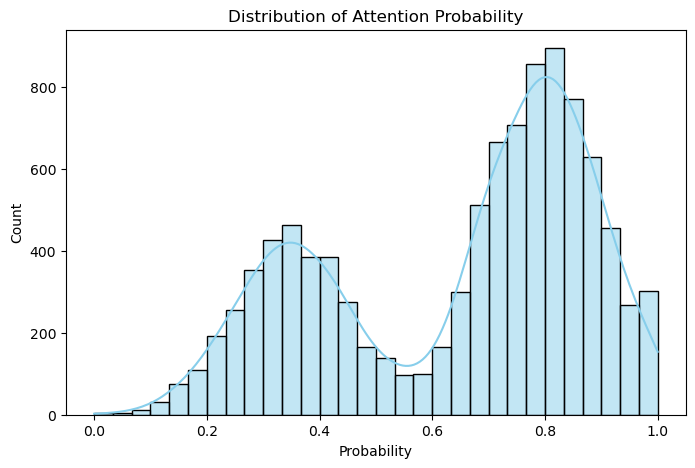

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\1580898189.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='student_id', y='attentive_percentage', data=top_students, palette='Set2')


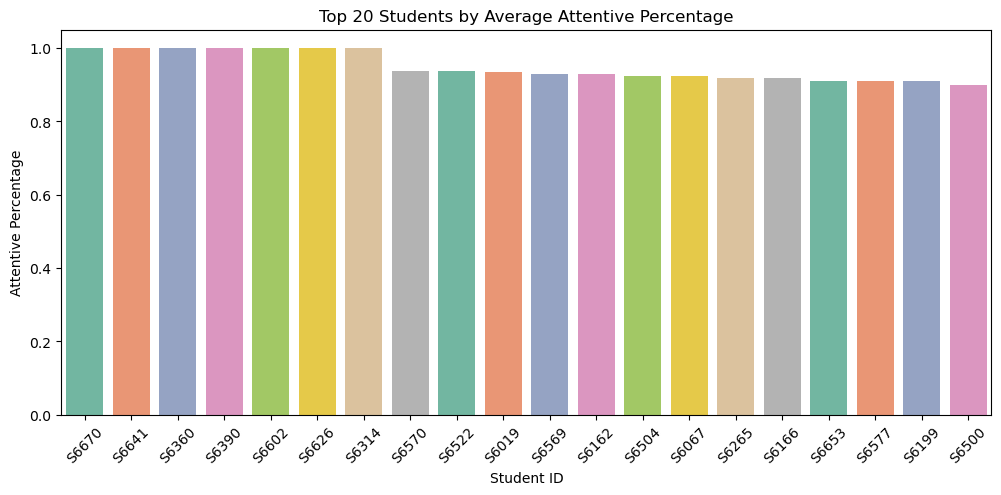


Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\attention_timeline_dataset_processed.csv


In [69]:
#----------------------------------------
Preprocessing:
timestamp → datetime
probability → normalize
Feature Engineering:
rolling_attention → per-student rolling average (mood trend)
attentive_percentage → per-student attentive percentage
Visualization:
Distribution of attention_state
Attentive probability distribution
Average attentive percentage per student
#----------------------------------------------


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\attention_timeline_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Data Type Fixes
# ---------------------------
df['timestamp'] = pd.to_datetime(df['timestamp'])

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Normalize probability
scaler = MinMaxScaler()
df['probability_norm'] = scaler.fit_transform(df[['probability']])

# 2️⃣ Rolling average probability per student (mood trend)
df = df.sort_values(['student_id','timestamp'])
df['rolling_attention'] = df.groupby('student_id')['probability'].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean()
)

# 3️⃣ Attentive percentage per student
attentive_percentage = df.groupby('student_id')['attention_state'].mean().reset_index()
attentive_percentage.rename(columns={'attention_state':'attentive_percentage'}, inplace=True)
df = df.merge(attentive_percentage, on='student_id', how='left')

# ---------------------------
# Quick Checks
# ---------------------------
print("\nData Types After Preprocessing:")
print(df.dtypes)

print("\nFirst 5 rows after feature engineering:")
print(df.head())

# ---------------------------
# Visualization
# ---------------------------

# 1️⃣ Distribution of attention_state
plt.figure(figsize=(6,4))
sns.countplot(x='attention_state', data=df, palette='Set1')
plt.title("Distribution of Attention State (0=Inattentive, 1=Attentive)")
plt.show()

# 2️⃣ Distribution of probability
plt.figure(figsize=(8,5))
sns.histplot(df['probability'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Attention Probability")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.show()

# 3️⃣ Average attentive percentage per student (Top 20)
top_students = df.groupby('student_id')['attentive_percentage'].mean().sort_values(ascending=False).head(20).reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x='student_id', y='attentive_percentage', data=top_students, palette='Set2')
plt.title("Top 20 Students by Average Attentive Percentage")
plt.xlabel("Student ID")
plt.ylabel("Attentive Percentage")
plt.xticks(rotation=45)
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\attention_timeline_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")


Sequence Shape: (3137, 10, 1)
Target Shape: (3137,)


C:\Users\Tamim\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6652 - loss: 0.6413 - val_accuracy: 0.6449 - val_loss: 0.6546
Epoch 2/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6692 - loss: 0.6373 - val_accuracy: 0.6449 - val_loss: 0.6522
Epoch 3/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6692 - loss: 0.6370 - val_accuracy: 0.6449 - val_loss: 0.6516
Epoch 4/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6692 - loss: 0.6375 - val_accuracy: 0.6449 - val_loss: 0.6534
Epoch 5/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6692 - loss: 0.6389 - val_accuracy: 0.6449 - val_loss: 0.6512
Epoch 6/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6692 - loss: 0.6363 - val_accuracy: 0.6449 - val_loss: 0.6519
Epoch 7/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6692 - loss: 0.6364 - val_accuracy: 0.6449 - val_loss: 0.6514
Epoch 8/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6692 - loss: 0.6369 - val_accuracy: 0.6449 - v

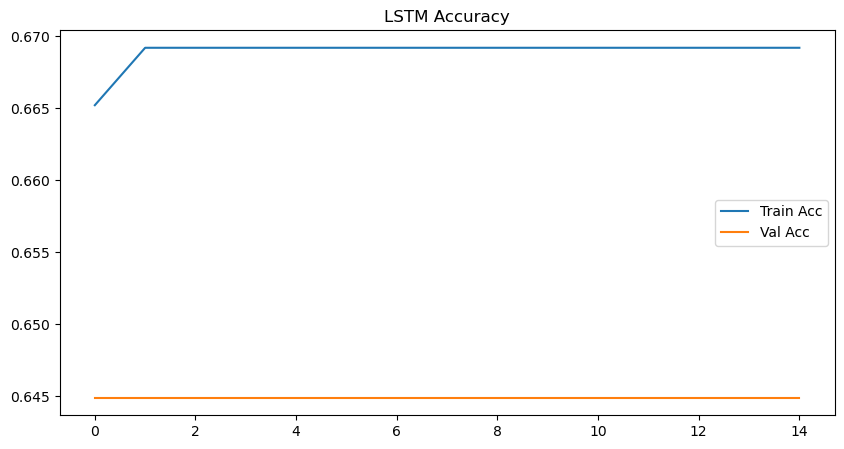

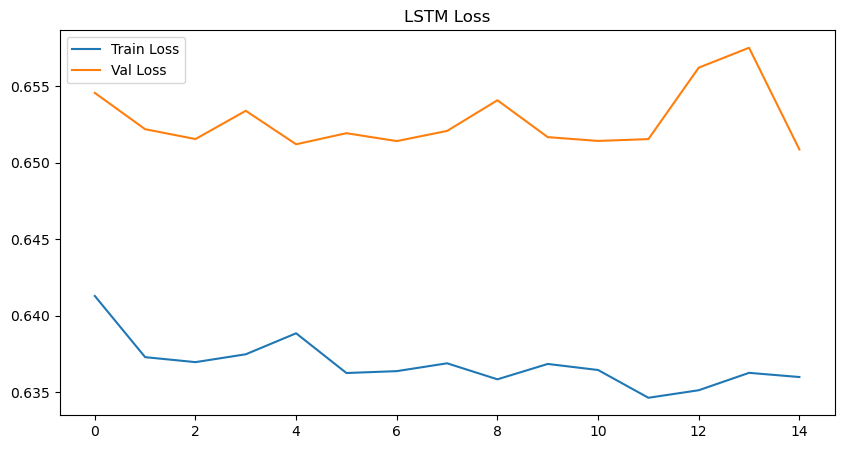

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6449 - loss: 0.6509 

FINAL TEST ACCURACY: 0.6449


In [169]:
#---------------------------------------------
#Cleaned dataset
#✔ LSTM sequences automatically generated
#✔ Model summary
#✔ Training accuracy
#✔ Validation accuracy
#✔ Graphs (Accuracy + Loss)
#✔ Final Test Accuracy
#-------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\attention_timeline_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Preprocessing
# ---------------------------
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort by student + time
df = df.sort_values(['student_id', 'timestamp'])

# Probability scale 0–1
scaler = MinMaxScaler()
df['prob_scaled'] = scaler.fit_transform(df[['probability']])

# Keep only needed columns
df = df[['student_id', 'timestamp', 'prob_scaled', 'attention_state']]

# ---------------------------
# Create sequences for LSTM
# ---------------------------
SEQ_LEN = 10   # last 10 entries predict next

X = []
y = []

for sid, group in df.groupby('student_id'):
    group = group.reset_index(drop=True)
    data = group[['prob_scaled']].values
    target = group['attention_state'].values

    if len(group) > SEQ_LEN:
        for i in range(SEQ_LEN, len(group)):
            X.append(data[i-SEQ_LEN:i])     # sequence of probabilities
            y.append(target[i])             # next state

X = np.array(X)
y = np.array(y)

print("Sequence Shape:", X.shape)
print("Target Shape:", y.shape)

# ---------------------------
# Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# ---------------------------
# Build LSTM Model
# ---------------------------
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LEN, 1)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')   # binary output
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(0.001),
    metrics=['accuracy']
)

model.summary()

# ---------------------------
# Train the Model
# ---------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32,
    verbose=1
)

# ---------------------------
# Accuracy & Loss Graph
# ---------------------------
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("LSTM Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("LSTM Loss")
plt.legend()
plt.show()

# ---------------------------
# Final Evaluation
# ---------------------------
loss, acc = model.evaluate(X_test, y_test)
print(f"\nFINAL TEST ACCURACY: {acc:.4f}")


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\participation_index_dataset_10000.csv")

print(df.head())


  student_id  questions_answered  questions_asked  hand_raise  \
0     S00001                  22               18          30   
1     S00002                  40                7          34   
2     S00003                  21                0          26   
3     S00004                  33                2          22   
4     S00005                  14                4          31   

   participation_score class_id  
0                  128       C7  
1                  135      C20  
2                   68      C15  
3                   94      C11  
4                   71       C8  


In [71]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   student_id           10000 non-null  object
 1   questions_answered   10000 non-null  int64 
 2   questions_asked      10000 non-null  int64 
 3   hand_raise           10000 non-null  int64 
 4   participation_score  10000 non-null  int64 
 5   class_id             10000 non-null  object
dtypes: int64(4), object(2)
memory usage: 468.9+ KB


In [72]:
df.columns

Index(['student_id', 'questions_answered', 'questions_asked', 'hand_raise',
       'participation_score', 'class_id'],
      dtype='object')

In [73]:
df.describe

<bound method NDFrame.describe of      student_id  questions_answered  questions_asked  hand_raise  \
0        S00001                  22               18          30   
1        S00002                  40                7          34   
2        S00003                  21                0          26   
3        S00004                  33                2          22   
4        S00005                  14                4          31   
...         ...                 ...              ...         ...   
9995     S09996                   6                3           4   
9996     S09997                  46               16          18   
9997     S09998                  21               16           8   
9998     S09999                  31               20          24   
9999     S10000                  42                4          12   

      participation_score class_id  
0                     128       C7  
1                     135      C20  
2                      68      C15  
3

In [74]:
df = df.dropna()



Data Types After Feature Engineering:
student_id                       object
questions_answered                int64
questions_asked                   int64
hand_raise                        int64
participation_score               int64
class_id                         object
participation_score_norm        float64
questions_ratio                 float64
hand_raise_weight               float64
combined_participation_index    float64
dtype: object

First 5 rows after feature engineering:
  student_id  questions_answered  questions_asked  hand_raise  \
0     S00001                  22               18          30   
1     S00002                  40                7          34   
2     S00003                  21                0          26   
3     S00004                  33                2          22   
4     S00005                  14                4          31   

   participation_score class_id  participation_score_norm  questions_ratio  \
0                  128       C7      

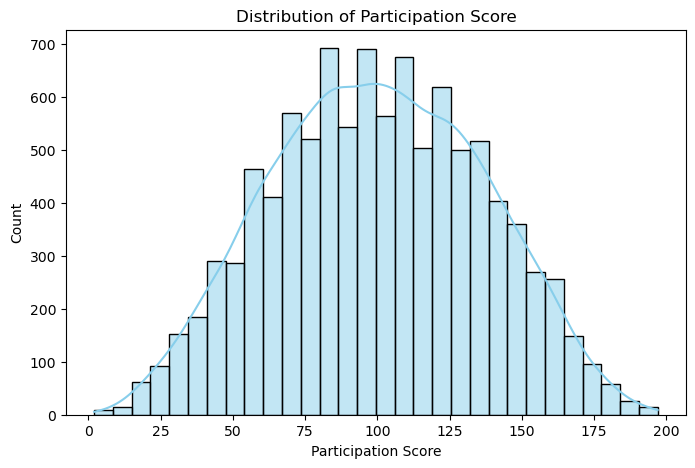

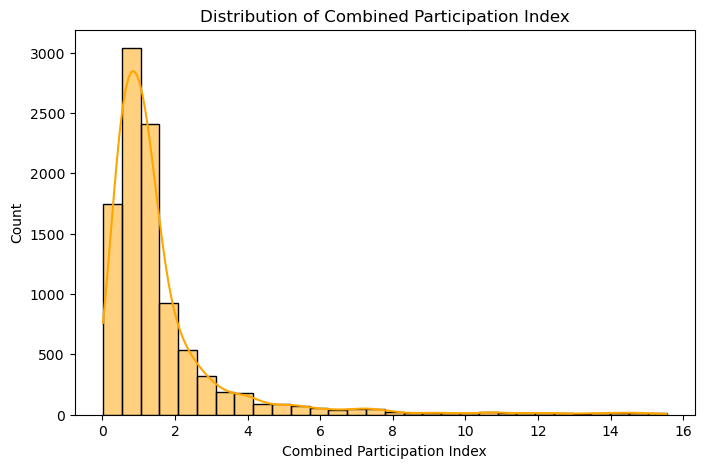

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\3032153845.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='student_id', y='combined_participation_index', data=top_students, palette='Set2')


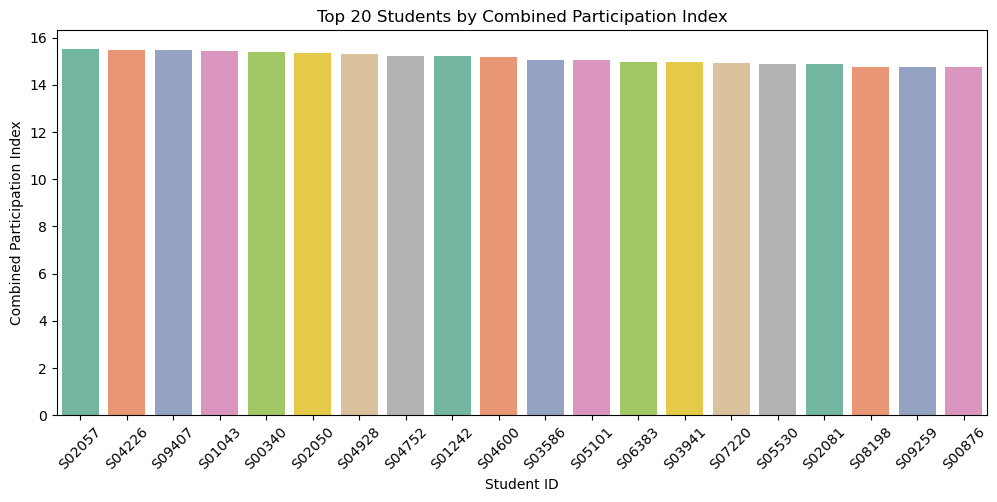


Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\participation_index_dataset_processed.csv


In [75]:
#-----------------------------------------------------
participation_score_norm → normalized participation score
questions_ratio → questions answered / questions asked
hand_raise_weight → hand raise contribution
combined_participation_index → weighted combined metric
#---------------------------------------------------




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\participation_index_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Normalize participation_score
scaler = MinMaxScaler()
df['participation_score_norm'] = scaler.fit_transform(df[['participation_score']])

# 2️⃣ Participation ratio: questions answered / questions asked
df['questions_ratio'] = df['questions_answered'] / (df['questions_asked'] + 1)  # +1 to avoid division by zero

# 3️⃣ Hand raise weight: weight contribution of hand raises
df['hand_raise_weight'] = df['hand_raise'] / df['hand_raise'].max()

# 4️⃣ Combined participation index
df['combined_participation_index'] = (
    0.5*df['participation_score_norm'] + 
    0.3*df['questions_ratio'] + 
    0.2*df['hand_raise_weight']
)

# ---------------------------
# Quick Checks
# ---------------------------
print("\nData Types After Feature Engineering:")
print(df.dtypes)

print("\nFirst 5 rows after feature engineering:")
print(df.head())

# ---------------------------
# Visualization
# ---------------------------

# 1️⃣ Distribution of participation_score
plt.figure(figsize=(8,5))
sns.histplot(df['participation_score'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Participation Score")
plt.xlabel("Participation Score")
plt.ylabel("Count")
plt.show()

# 2️⃣ Distribution of combined_participation_index
plt.figure(figsize=(8,5))
sns.histplot(df['combined_participation_index'], bins=30, kde=True, color='orange')
plt.title("Distribution of Combined Participation Index")
plt.xlabel("Combined Participation Index")
plt.ylabel("Count")
plt.show()

# 3️⃣ Top 20 students by combined participation index
top_students = df.sort_values('combined_participation_index', ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(x='student_id', y='combined_participation_index', data=top_students, palette='Set2')
plt.title("Top 20 Students by Combined Participation Index")
plt.xlabel("Student ID")
plt.ylabel("Combined Participation Index")
plt.xticks(rotation=45)
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\participation_index_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")



Accuracy: 0.9944

Confusion Matrix:
 [[1283    8]
 [   6 1203]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1291
           1       0.99      1.00      0.99      1209

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500



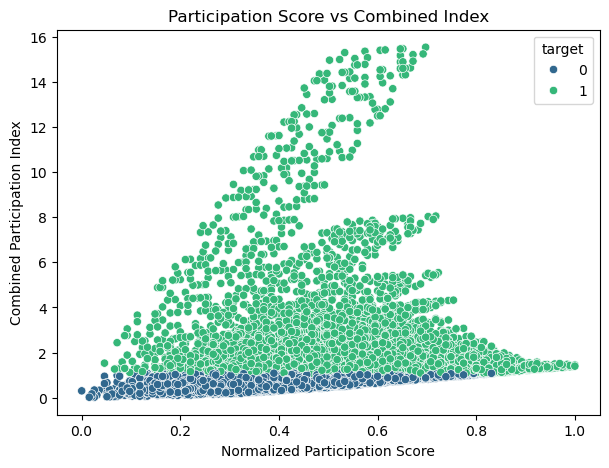

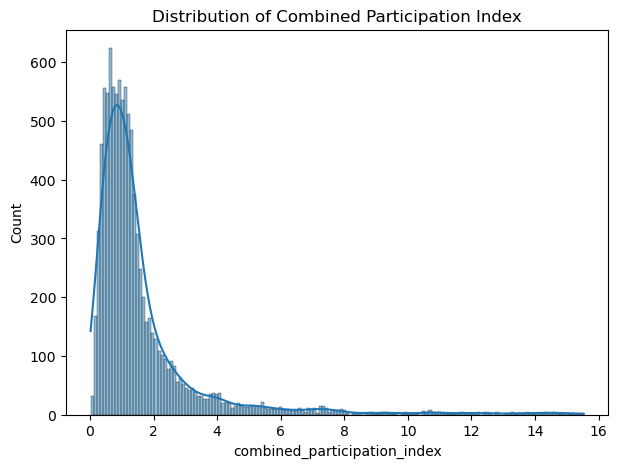

In [171]:
#-------------------------------
#Logistic Regression Model


#Overall model accuracy
#Confusion matrix
#Classification report (precision/recall/F1-score)
#2টি visualization:
#✔ Participation vs Combined Index
#✔ Combined Participation Index distribution
#-------------------------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# 1. Load Dataset
# ===========================
df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\participation_index_dataset_10000.csv")

# ===========================
# 2. Feature Engineering
# ===========================

scaler = MinMaxScaler()

# Normalized participation score
df['participation_score_norm'] = scaler.fit_transform(df[['participation_score']])

# Questions ratio
df['questions_ratio'] = df['questions_answered'] / (df['questions_asked'] + 1)

# Hand raise weight
df['hand_raise_weight'] = df['hand_raise'] / (df['hand_raise'].max() + 1)

# Combined participation index
df['combined_participation_index'] = (
    0.5*df['participation_score_norm'] + 
    0.3*df['questions_ratio'] + 
    0.2*df['hand_raise_weight']
)

# Target (Binary classification)
# 1 = High participation, 0 = Low participation
df['target'] = (df['combined_participation_index'] > df['combined_participation_index'].median()).astype(int)

# ===========================
# 3. Train-Test Split
# ===========================
features = ['participation_score_norm', 'questions_ratio', 'hand_raise_weight', 'combined_participation_index']
X = df[features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ===========================
# 4. Logistic Regression Model
# ===========================
model = LogisticRegression()
model.fit(X_train, y_train)

# ===========================
# 5. Predictions
# ===========================
y_pred = model.predict(X_test)

# ===========================
# 6. Evaluation
# ===========================
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ===========================
# 7. Visualization
# ===========================

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df['participation_score_norm'],
    y=df['combined_participation_index'],
    hue=df['target'],
    palette="viridis"
)
plt.title("Participation Score vs Combined Index")
plt.xlabel("Normalized Participation Score")
plt.ylabel("Combined Participation Index")
plt.show()

plt.figure(figsize=(7,5))
sns.histplot(df['combined_participation_index'], kde=True)
plt.title("Distribution of Combined Participation Index")
plt.show()


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\teaching_efficiency_dataset_10000.csv")

print(df.head())


  class_id teacher_id  engagement_avg  noise_frequency  attention_drop_points  \
0       C7        T23           52.00               16                      7   
1      C20        T41           91.76                8                      7   
2      C15        T22           60.49               11                     10   
3      C11        T34           66.42                4                      3   
4       C8        T15           93.50               13                      6   

   efficiency_score        date  
0             14.00  2024-12-23  
1             65.76  2025-09-16  
2             23.99  2025-10-03  
3             54.42  2025-04-22  
4             62.00  2025-07-25  


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   class_id               10000 non-null  object 
 1   teacher_id             10000 non-null  object 
 2   engagement_avg         10000 non-null  float64
 3   noise_frequency        10000 non-null  int64  
 4   attention_drop_points  10000 non-null  int64  
 5   efficiency_score       10000 non-null  float64
 6   date                   10000 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [78]:
df.columns

Index(['class_id', 'teacher_id', 'engagement_avg', 'noise_frequency',
       'attention_drop_points', 'efficiency_score', 'date'],
      dtype='object')

In [79]:
df.describe

<bound method NDFrame.describe of      class_id teacher_id  engagement_avg  noise_frequency  \
0          C7        T23           52.00               16   
1         C20        T41           91.76                8   
2         C15        T22           60.49               11   
3         C11        T34           66.42                4   
4          C8        T15           93.50               13   
...       ...        ...             ...              ...   
9995       C2        T23           61.54                5   
9996      C11        T35           62.85               12   
9997       C2        T37           68.08               14   
9998       C1        T43           92.97                3   
9999       C2        T41           96.94               16   

      attention_drop_points  efficiency_score        date  
0                         7             14.00  2024-12-23  
1                         7             65.76  2025-09-16  
2                        10             23.99  2025-1

In [80]:
df = df.dropna()


Data Types After Feature Engineering:
class_id                        object
teacher_id                      object
engagement_avg                 float64
noise_frequency                  int64
attention_drop_points            int64
efficiency_score               float64
date                            object
efficiency_score_norm          float64
noise_score                    float64
attention_score                float64
weighted_teacher_efficiency    float64
dtype: object

First 5 rows after feature engineering:
  class_id teacher_id  engagement_avg  noise_frequency  attention_drop_points  \
0       C7        T23           52.00               16                      7   
1      C20        T41           91.76                8                      7   
2      C15        T22           60.49               11                     10   
3      C11        T34           66.42                4                      3   
4       C8        T15           93.50               13                  

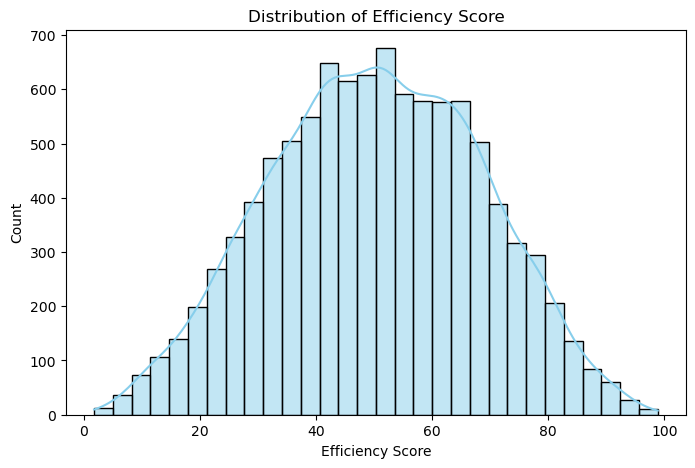

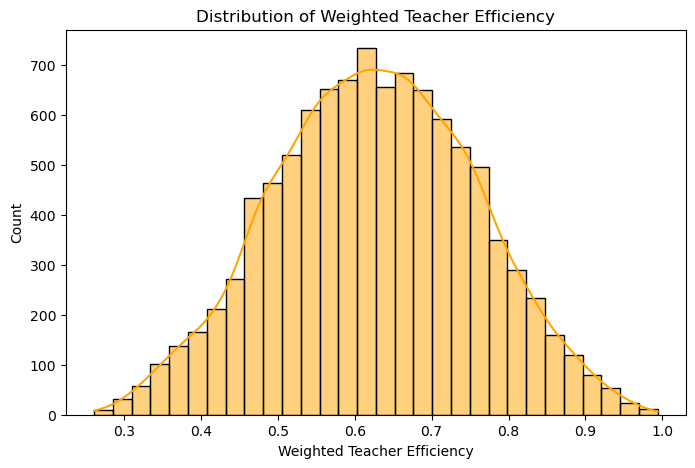

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\1251495215.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class_id', y='weighted_teacher_efficiency', data=top_classes, palette='Set2')


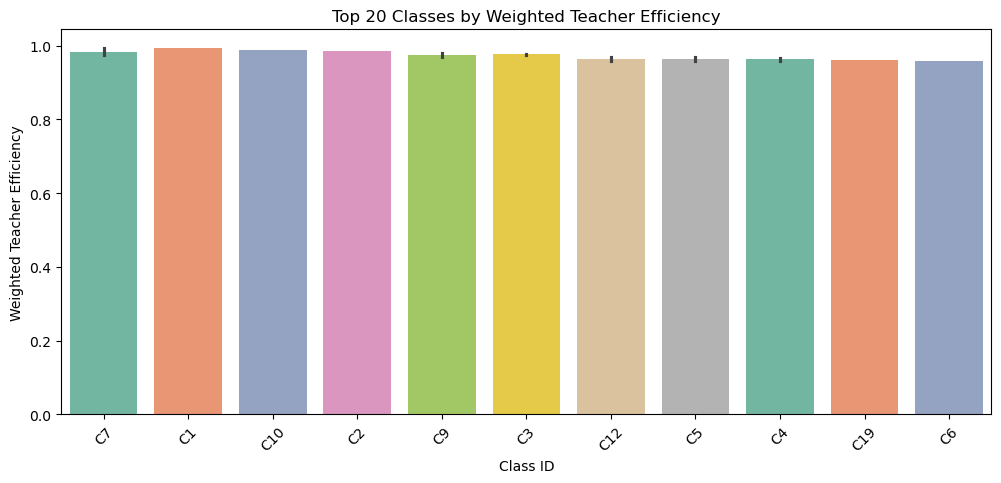


Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\teaching_efficiency_dataset_processed.csv


In [81]:
#----------------------------------------
#efficiency_score_norm → normalized efficiency score
#noise_score → scaled impact of noise frequency
#attention_score → scaled impact of attention drops
#weighted_teacher_efficiency → combined weighted metric using engagement, noise, attention
#------------------------------------------------------



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\teaching_efficiency_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Normalize efficiency_score
scaler = MinMaxScaler()
df['efficiency_score_norm'] = scaler.fit_transform(df[['efficiency_score']])

# 2️⃣ Noise impact: scaled noise frequency
df['noise_score'] = 1 - df['noise_frequency']/df['noise_frequency'].max()

# 3️⃣ Attention drop impact
df['attention_score'] = 1 - df['attention_drop_points']/df['attention_drop_points'].max()

# 4️⃣ Weighted teacher efficiency metric
# Formula: 0.5 * engagement_avg + 0.25 * noise_score + 0.25 * attention_score
df['weighted_teacher_efficiency'] = (
    0.5*(df['engagement_avg']/100) + 0.25*df['noise_score'] + 0.25*df['attention_score']
)

# ---------------------------
# Quick Checks
# ---------------------------
print("\nData Types After Feature Engineering:")
print(df.dtypes)

print("\nFirst 5 rows after feature engineering:")
print(df.head())

# ---------------------------
# Visualization
# ---------------------------

# 1️⃣ Distribution of efficiency_score
plt.figure(figsize=(8,5))
sns.histplot(df['efficiency_score'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Efficiency Score")
plt.xlabel("Efficiency Score")
plt.ylabel("Count")
plt.show()

# 2️⃣ Distribution of weighted_teacher_efficiency
plt.figure(figsize=(8,5))
sns.histplot(df['weighted_teacher_efficiency'], bins=30, kde=True, color='orange')
plt.title("Distribution of Weighted Teacher Efficiency")
plt.xlabel("Weighted Teacher Efficiency")
plt.ylabel("Count")
plt.show()

# 3️⃣ Top 20 classes by weighted_teacher_efficiency
top_classes = df.sort_values('weighted_teacher_efficiency', ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(x='class_id', y='weighted_teacher_efficiency', data=top_classes, palette='Set2')
plt.title("Top 20 Classes by Weighted Teacher Efficiency")
plt.xlabel("Class ID")
plt.ylabel("Weighted Teacher Efficiency")
plt.xticks(rotation=45)
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\teaching_efficiency_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")



📌 Accuracy: 0.9992

📌 Confusion Matrix:
 [[1280    2]
 [   0 1218]]

📌 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1282
           1       1.00      1.00      1.00      1218

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



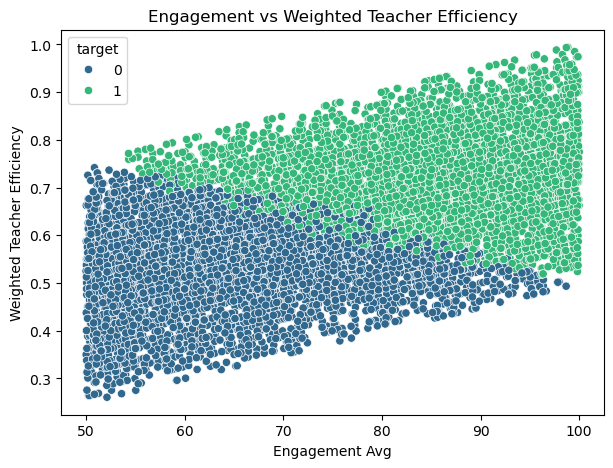

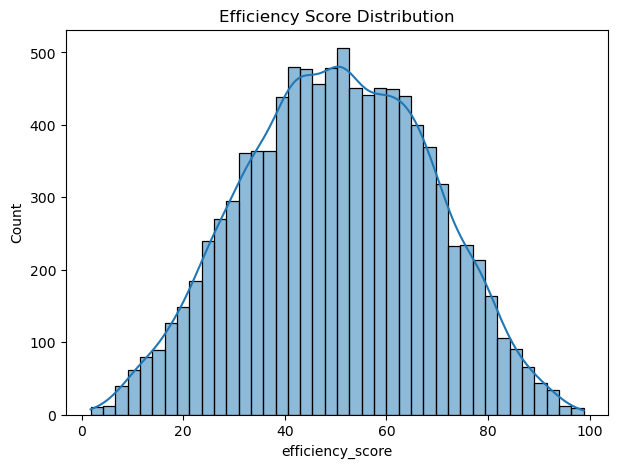

In [172]:
#-----------------------------------------
#Logistic Regression model
#✔ Feature-engineered inputs
#✔ High/Low Teacher efficiency prediction
#✔ Accuracy
#✔ Confusion Matrix
#✔ Classification Report
#✔ Scatter plot visualization
#✔ Efficiency distribution plot

#----------------------------------------


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\teaching_efficiency_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Feature Engineering
# ---------------------------

scaler = MinMaxScaler()

# 1. Normalize efficiency score
df['efficiency_score_norm'] = scaler.fit_transform(df[['efficiency_score']])

# 2. Noise score (lower noise = better)
df['noise_score'] = 1 - df['noise_frequency'] / df['noise_frequency'].max()

# 3. Attention drop score (lower drop = better)
df['attention_score'] = 1 - df['attention_drop_points'] / df['attention_drop_points'].max()

# 4. Weighted composite teacher efficiency indicator
df['weighted_teacher_efficiency'] = (
    0.5 * (df['engagement_avg'] / 100) +
    0.25 * df['noise_score'] +
    0.25 * df['attention_score']
)

# ---------------------------
# Define the Target Variable (Binary)
# High Efficiency = 1, Low = 0
# ---------------------------

median_eff = df['efficiency_score'].median()
df['target'] = (df['efficiency_score'] > median_eff).astype(int)

# ---------------------------
# Prepare Features
# ---------------------------

feature_cols = [
    'engagement_avg',
    'noise_frequency',
    'attention_drop_points',
    'efficiency_score_norm',
    'noise_score',
    'attention_score',
    'weighted_teacher_efficiency'
]

X = df[feature_cols]
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ---------------------------
# Train Logistic Regression
# ---------------------------

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# ---------------------------
# Evaluation
# ---------------------------

print("\n📌 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📌 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))

# ---------------------------
# Visualization
# ---------------------------

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df['engagement_avg'],
    y=df['weighted_teacher_efficiency'],
    hue=df['target'],
    palette="viridis"
)
plt.title("Engagement vs Weighted Teacher Efficiency")
plt.xlabel("Engagement Avg")
plt.ylabel("Weighted Teacher Efficiency")
plt.show()

plt.figure(figsize=(7,5))
sns.histplot(df['efficiency_score'], kde=True)
plt.title("Efficiency Score Distribution")
plt.show()


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\topic_difficulty_dataset_10000.csv")

print(df.head())


  topic_name  average_attention_drop  avg_confusion_score  difficulty_score  \
0   Topic_39                    0.88                 0.81              85.0   
1   Topic_29                    0.52                 0.26              42.0   
2   Topic_15                    0.77                 0.30              58.0   
3   Topic_43                    0.56                 0.66              60.0   
4    Topic_8                    0.55                 0.70              61.0   

  class_time  
0       8:00  
1      13:00  
2      15:00  
3      10:00  
4       8:00  


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   topic_name              10000 non-null  object 
 1   average_attention_drop  10000 non-null  float64
 2   avg_confusion_score     10000 non-null  float64
 3   difficulty_score        10000 non-null  float64
 4   class_time              10000 non-null  object 
dtypes: float64(3), object(2)
memory usage: 390.8+ KB


In [84]:
df.describe

<bound method NDFrame.describe of      topic_name  average_attention_drop  avg_confusion_score  \
0      Topic_39                    0.88                 0.81   
1      Topic_29                    0.52                 0.26   
2      Topic_15                    0.77                 0.30   
3      Topic_43                    0.56                 0.66   
4       Topic_8                    0.55                 0.70   
...         ...                     ...                  ...   
9995   Topic_26                    0.60                 0.97   
9996   Topic_22                    0.44                 0.12   
9997   Topic_31                    0.60                 0.49   
9998   Topic_43                    0.29                 0.41   
9999   Topic_10                    0.72                 0.10   

      difficulty_score class_time  
0                 85.0       8:00  
1                 42.0      13:00  
2                 58.0      15:00  
3                 60.0      10:00  
4                

In [85]:
df = df.dropna()

In [86]:
df.columns

Index(['topic_name', 'average_attention_drop', 'avg_confusion_score',
       'difficulty_score', 'class_time'],
      dtype='object')


Data Types After Feature Engineering:
topic_name                     object
average_attention_drop        float64
avg_confusion_score           float64
difficulty_score              float64
class_time                     object
difficulty_norm               float64
attention_confusion_impact    float64
weighted_topic_difficulty     float64
dtype: object

First 5 rows after feature engineering:
  topic_name  average_attention_drop  avg_confusion_score  difficulty_score  \
0   Topic_39                    0.88                 0.81              85.0   
1   Topic_29                    0.52                 0.26              42.0   
2   Topic_15                    0.77                 0.30              58.0   
3   Topic_43                    0.56                 0.66              60.0   
4    Topic_8                    0.55                 0.70              61.0   

  class_time  difficulty_norm  attention_confusion_impact  \
0       8:00         0.857143                       0.852   
1    

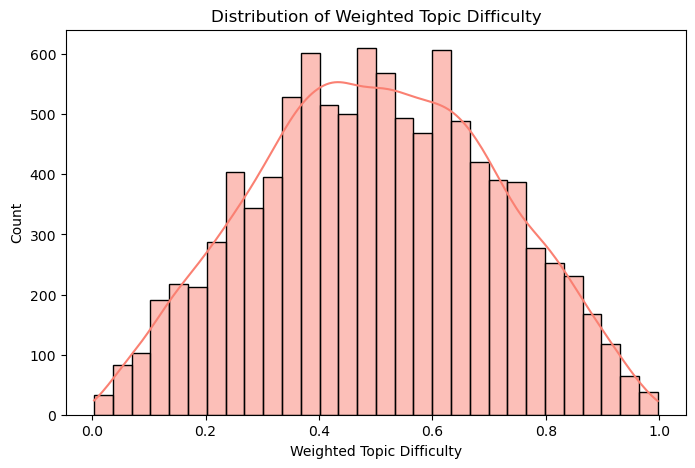

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\3992257725.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='topic_name', y='weighted_topic_difficulty', data=top_topics, palette='Set1')


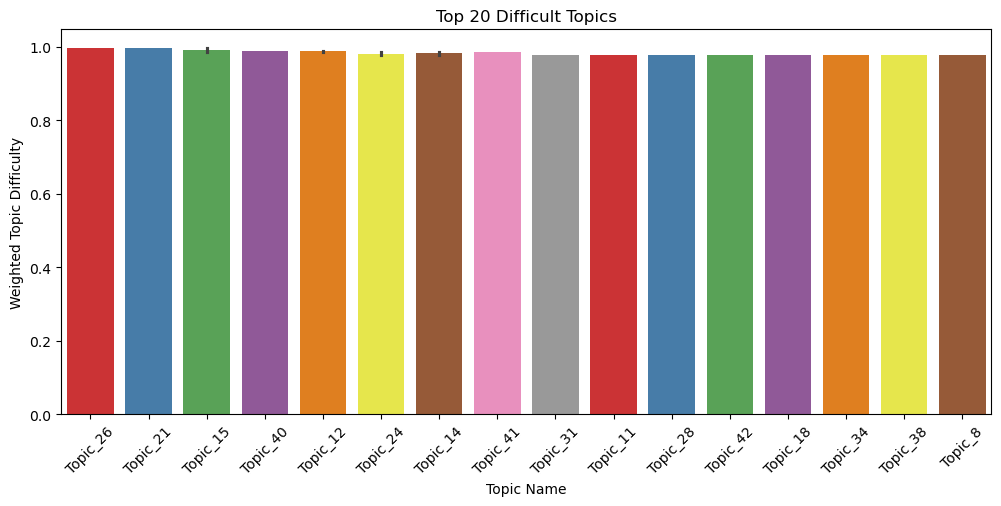


Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\topic_difficulty_dataset_processed.csv


In [87]:
#----------------------------------------------
#difficulty_norm → Normalized difficulty score
#attention_confusion_impact → Combined attention drop & confusion score
#weighted_topic_difficulty → Final weighted difficulty metric
#--------------------------------------------


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\topic_difficulty_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Normalize difficulty score
scaler = MinMaxScaler()
df['difficulty_norm'] = scaler.fit_transform(df[['difficulty_score']])

# 2️⃣ Attention & Confusion Impact Score
# Formula: 0.6 * attention_drop + 0.4 * confusion_score
df['attention_confusion_impact'] = 0.6*df['average_attention_drop'] + 0.4*df['avg_confusion_score']

# 3️⃣ Weighted Topic Difficulty
# Formula: 0.7*difficulty_norm + 0.3*attention_confusion_impact
df['weighted_topic_difficulty'] = 0.7*df['difficulty_norm'] + 0.3*df['attention_confusion_impact']

# ---------------------------
# Quick Checks
# ---------------------------
print("\nData Types After Feature Engineering:")
print(df.dtypes)

print("\nFirst 5 rows after feature engineering:")
print(df.head())

# ---------------------------
# Visualization
# ---------------------------

# 1️⃣ Distribution of weighted_topic_difficulty
plt.figure(figsize=(8,5))
sns.histplot(df['weighted_topic_difficulty'], bins=30, kde=True, color='salmon')
plt.title("Distribution of Weighted Topic Difficulty")
plt.xlabel("Weighted Topic Difficulty")
plt.ylabel("Count")
plt.show()

# 2️⃣ Top 20 difficult topics
top_topics = df.sort_values('weighted_topic_difficulty', ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(x='topic_name', y='weighted_topic_difficulty', data=top_topics, palette='Set1')
plt.title("Top 20 Difficult Topics")
plt.xlabel("Topic Name")
plt.ylabel("Weighted Topic Difficulty")
plt.xticks(rotation=45)
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\topic_difficulty_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")



📌 Accuracy: 0.9996

📌 Confusion Matrix:
 [[1316    1]
 [   0 1183]]

📌 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1317
           1       1.00      1.00      1.00      1183

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



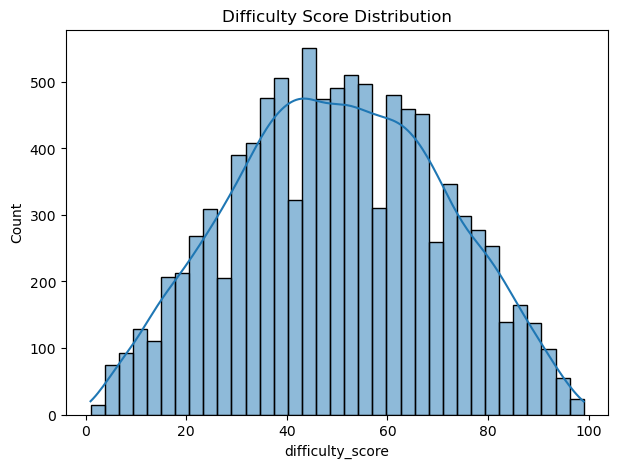

In [173]:
#---------------------------------------------
#Model Accuracy
#✔ Confusion Matrix
#✔ Classification Report
#✔ Difficulty Visualization
#✔ Topic Clustering (scatter plot)

#------------------------------


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\topic_difficulty_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Feature Engineering
# ---------------------------

scaler = MinMaxScaler()
df['difficulty_norm'] = scaler.fit_transform(df[['difficulty_score']])

# Attention + Confusion impact
df['attention_confusion_impact'] = (
    0.6*df['average_attention_drop'] +
    0.4*df['avg_confusion_score']
)

# Weighted difficulty
df['weighted_topic_difficulty'] = (
    0.7*df['difficulty_norm'] +
    0.3*df['attention_confusion_impact']
)

# ---------------------------
# Target Variable (Binary)
# High difficulty = 1, Low = 0
# ---------------------------

median_d = df['difficulty_score'].median()
df['target'] = (df['difficulty_score'] > median_d).astype(int)

# ---------------------------
# Prepare Features
# ---------------------------

feature_cols = [
    'average_attention_drop',
    'avg_confusion_score',
    'difficulty_norm',
    'attention_confusion_impact',
    'weighted_topic_difficulty'
]

X = df[feature_cols]
y = df['target']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ---------------------------
# Logistic Regression Training
# ---------------------------

model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# ---------------------------
# Evaluation
# ---------------------------

print("\n📌 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📌 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))

# ---------------------------
# Visualization
# ---------------------------

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df['average_attention_drop'],
    y=df['weighted_topic_difficulty'],
    hue=df['target'],
    palette="viridis"
)
plt.title("Attention Drop vs Weighted Topic Difficulty")
plt.xlabel("Average Attention Drop")
plt.ylabel("Weighted Topic Difficulty")
plt.show()

plt.figure(figsize=(7,5))
sns.histplot(df['difficulty_score'], kde=True)
plt.title("Difficulty Score Distribution")
plt.show()


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\emergency_event_dataset_10000.csv")

print(df.head())


  event_type                student_ids_involved  risk_score  \
0      fight         S03056,S05134,S02683,S05279       25.67   
1   collapse                              S00614       68.46   
2    running                              S07724       58.23   
3    running         S07190,S05387,S06943,S08760       45.46   
4      fight  S00021,S08586,S05768,S03516,S01911       86.11   

             timestamp    location  
0  2025-11-14 09:11:25  Playground  
1  2025-11-07 11:01:25  Playground  
2  2025-09-25 09:58:25      Hall_B  
3  2025-01-24 13:38:25       Lab_1  
4  2025-05-27 00:22:25      Hall_B  


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   event_type            10000 non-null  object 
 1   student_ids_involved  10000 non-null  object 
 2   risk_score            10000 non-null  float64
 3   timestamp             10000 non-null  object 
 4   location              10000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 390.8+ KB


In [90]:
df.columns

Index(['event_type', 'student_ids_involved', 'risk_score', 'timestamp',
       'location'],
      dtype='object')

In [91]:
df.describe

<bound method NDFrame.describe of      event_type                student_ids_involved  risk_score  \
0         fight         S03056,S05134,S02683,S05279       25.67   
1      collapse                              S00614       68.46   
2       running                              S07724       58.23   
3       running         S07190,S05387,S06943,S08760       45.46   
4         fight  S00021,S08586,S05768,S03516,S01911       86.11   
...         ...                                 ...         ...   
9995   collapse                              S02855       43.27   
9996   collapse                S01433,S05522,S08233       55.90   
9997   collapse                S01816,S04279,S06908       78.87   
9998      fight                              S05405       23.53   
9999      fight                       S08527,S05594       82.50   

                timestamp    location  
0     2025-11-14 09:11:25  Playground  
1     2025-11-07 11:01:25  Playground  
2     2025-09-25 09:58:25      Hall_B  
3

In [92]:
df = df.dropna()


Data Types After Feature Engineering:
event_type                       object
student_ids_involved             object
risk_score                      float64
timestamp                datetime64[ns]
location                         object
event_hour                        int32
event_date                       object
event_dayofweek                   int32
num_students                      int64
risk_category                  category
event_type_encoded                int64
location_encoded                  int64
risk_score_norm                 float64
num_students_norm               float64
weighted_event_impact           float64
dtype: object

First 5 rows after feature engineering:
  event_type                student_ids_involved  risk_score  \
0      fight         S03056,S05134,S02683,S05279       25.67   
1   collapse                              S00614       68.46   
2    running                              S07724       58.23   
3    running         S07190,S05387,S06943,S08760  

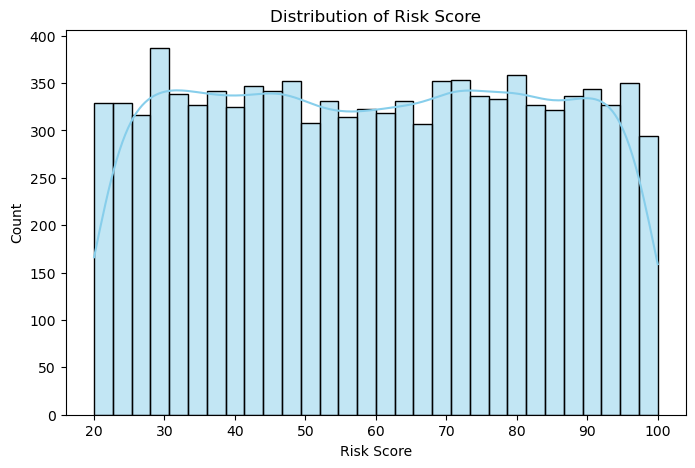

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\2340399148.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='event_type', y='num_students', data=df, palette='Set2')


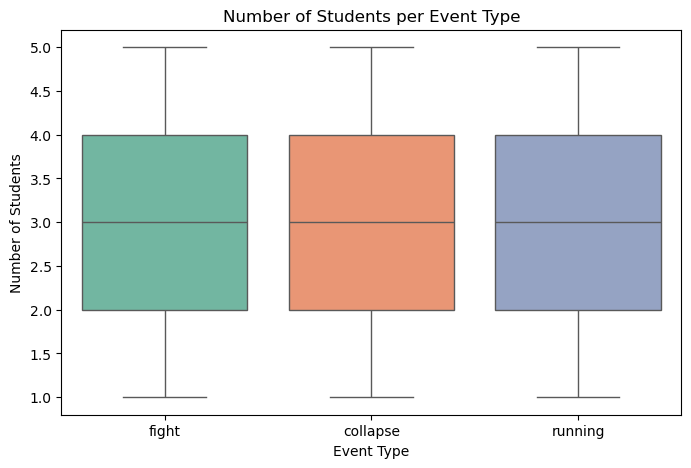

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\2340399148.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='event_type', y='weighted_event_impact', data=df, estimator=np.mean, palette='Set1')


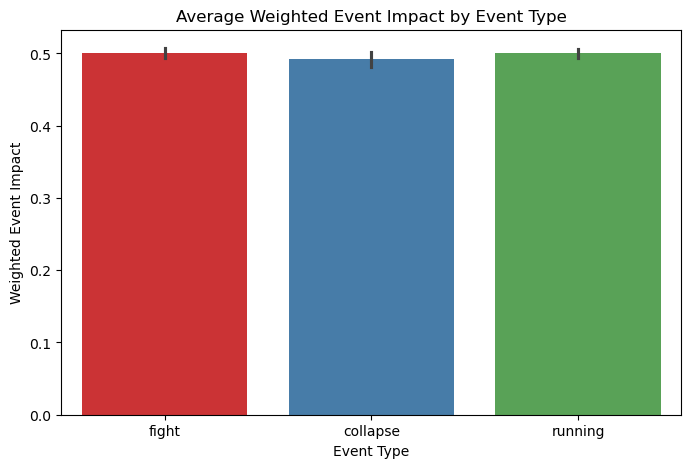

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\2340399148.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='location', data=df, palette='Set3', order=df['location'].value_counts().index)


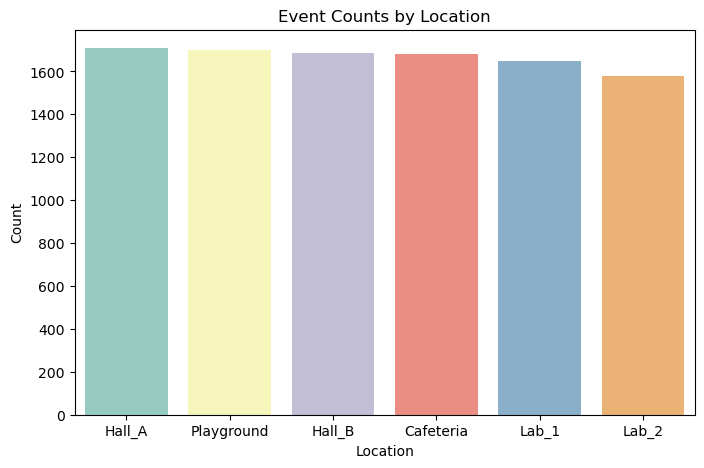

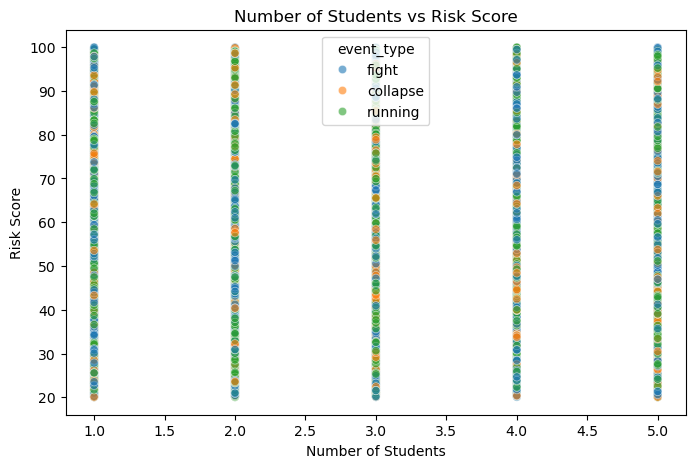


Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\emergency_event_dataset_processed.csv


In [93]:
#--------------------------------------------------------
#Timestamp → datetime features (hour, date, dayofweek)
#Number of students involved
#Risk category (Low/Medium/High)
#Encoding categorical variables (event_type, location)
#Normalization (risk_score, num_students)
#Weighted Event Impact Score (combination of risk and students)
#-----------------------------------------------------


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\emergency_event_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['event_hour'] = df['timestamp'].dt.hour
df['event_date'] = df['timestamp'].dt.date
df['event_dayofweek'] = df['timestamp'].dt.dayofweek

# 2️⃣ Number of students involved
df['num_students'] = df['student_ids_involved'].apply(lambda x: len(x.split(',')))

# 3️⃣ Risk category
df['risk_category'] = pd.cut(df['risk_score'], bins=[0, 30, 60, 100], labels=['Low', 'Medium', 'High'])

# 4️⃣ Encode categorical variables (event_type & location)
le_event = LabelEncoder()
df['event_type_encoded'] = le_event.fit_transform(df['event_type'])

le_location = LabelEncoder()
df['location_encoded'] = le_location.fit_transform(df['location'])

# 5️⃣ Normalize risk_score and num_students
scaler = MinMaxScaler()
df[['risk_score_norm', 'num_students_norm']] = scaler.fit_transform(df[['risk_score', 'num_students']])

# 6️⃣ Weighted Event Impact Score
# Formula: 0.7*risk_score_norm + 0.3*num_students_norm
df['weighted_event_impact'] = 0.7*df['risk_score_norm'] + 0.3*df['num_students_norm']

# ---------------------------
# Quick Checks
# ---------------------------
print("\nData Types After Feature Engineering:")
print(df.dtypes)

print("\nFirst 5 rows after feature engineering:")
print(df.head())

# ---------------------------
# Visualization
# ---------------------------

# 1️⃣ Distribution of risk_score
plt.figure(figsize=(8,5))
sns.histplot(df['risk_score'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Risk Score")
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.show()

# 2️⃣ Number of students involved per event type
plt.figure(figsize=(8,5))
sns.boxplot(x='event_type', y='num_students', data=df, palette='Set2')
plt.title("Number of Students per Event Type")
plt.xlabel("Event Type")
plt.ylabel("Number of Students")
plt.show()

# 3️⃣ Weighted Event Impact Score by Event Type
plt.figure(figsize=(8,5))
sns.barplot(x='event_type', y='weighted_event_impact', data=df, estimator=np.mean, palette='Set1')
plt.title("Average Weighted Event Impact by Event Type")
plt.xlabel("Event Type")
plt.ylabel("Weighted Event Impact")
plt.show()

# 4️⃣ Event Counts by Location
plt.figure(figsize=(8,5))
sns.countplot(x='location', data=df, palette='Set3', order=df['location'].value_counts().index)
plt.title("Event Counts by Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

# 5️⃣ Risk vs Number of Students
plt.figure(figsize=(8,5))
sns.scatterplot(x='num_students', y='risk_score', data=df, hue='event_type', alpha=0.6)
plt.title("Number of Students vs Risk Score")
plt.xlabel("Number of Students")
plt.ylabel("Risk Score")
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\emergency_event_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")


In [174]:
#------------------------------------------------
#target = High Risk (risk_score > 60)
#weighted_event_impact + num_students_norm + categorical features help improve prediction.
#চাইলে feature selection বা regularization দিয়ে performance আরও ভালো করা যায়।

#---------------------------------------------------



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------------------------
# Load Processed Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\emergency_event_dataset_processed.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Target Variable (Binary)
# High Risk = 1, Low/Medium = 0
# ---------------------------
df['target'] = (df['risk_category']=='High').astype(int)

# ---------------------------
# Features
# ---------------------------
feature_cols = [
    'event_type_encoded',
    'location_encoded',
    'risk_score_norm',
    'num_students_norm',
    'weighted_event_impact',
    'event_hour',
    'event_dayofweek'
]

X = df[feature_cols]
y = df['target']

# ---------------------------
# Split Dataset
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ---------------------------
# Logistic Regression
# ---------------------------
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ---------------------------
# Evaluation
# ---------------------------
print("\n📌 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📌 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))



📌 Accuracy: 0.998

📌 Confusion Matrix:
 [[1242    4]
 [   1 1253]]

📌 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1246
           1       1.00      1.00      1.00      1254

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\fire_smoke_detection_dataset_10000.csv")

print(df.head())


  frame_id  smoke_detected  fire_detected  probability            timestamp
0  F000001               0              0         0.86  2025-12-02 04:20:28
1  F000002               1              0         0.59  2025-12-02 17:25:27
2  F000003               0              0         0.67  2025-12-03 06:21:39
3  F000004               0              0         0.83  2025-11-29 17:36:11
4  F000005               0              0         0.74  2025-12-04 19:27:15


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   frame_id        10000 non-null  object 
 1   smoke_detected  10000 non-null  int64  
 2   fire_detected   10000 non-null  int64  
 3   probability     10000 non-null  float64
 4   timestamp       10000 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 390.8+ KB


In [96]:
df.columns

Index(['frame_id', 'smoke_detected', 'fire_detected', 'probability',
       'timestamp'],
      dtype='object')

In [97]:
df.describe

<bound method NDFrame.describe of      frame_id  smoke_detected  fire_detected  probability            timestamp
0     F000001               0              0         0.86  2025-12-02 04:20:28
1     F000002               1              0         0.59  2025-12-02 17:25:27
2     F000003               0              0         0.67  2025-12-03 06:21:39
3     F000004               0              0         0.83  2025-11-29 17:36:11
4     F000005               0              0         0.74  2025-12-04 19:27:15
...       ...             ...            ...          ...                  ...
9995  F009996               0              0         0.98  2025-12-01 12:10:52
9996  F009997               0              0         0.87  2025-12-04 13:55:12
9997  F009998               0              0         0.51  2025-11-30 02:41:10
9998  F009999               0              0         0.70  2025-12-04 15:02:54
9999  F010000               0              0         0.63  2025-12-04 05:22:22

[10000 rows x 5 c

In [98]:
df= df.dropna()


Data Types After Feature Engineering:
frame_id                       object
smoke_detected                  int64
fire_detected                   int64
probability                   float64
timestamp              datetime64[ns]
hour                            int32
date                           object
dayofweek                       int32
smoke_or_fire                   int64
probability_norm              float64
weighted_event_risk           float64
dtype: object

First 5 rows after feature engineering:
  frame_id  smoke_detected  fire_detected  probability           timestamp  \
0  F000001               0              0         0.86 2025-12-02 04:20:28   
1  F000002               1              0         0.59 2025-12-02 17:25:27   
2  F000003               0              0         0.67 2025-12-03 06:21:39   
3  F000004               0              0         0.83 2025-11-29 17:36:11   
4  F000005               0              0         0.74 2025-12-04 19:27:15   

   hour        date

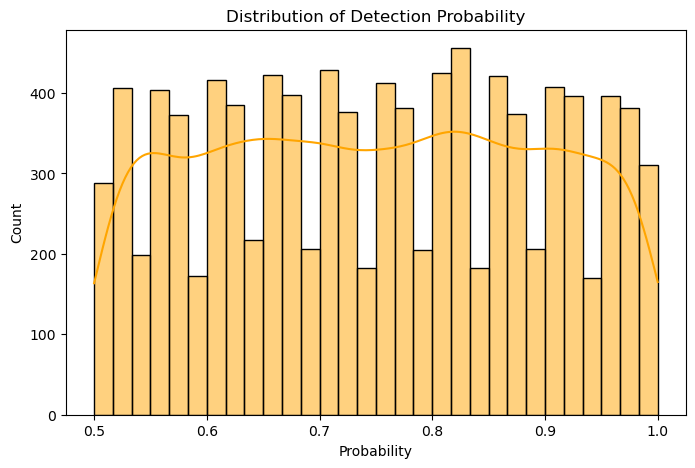

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\3695559291.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoke_detected', data=df, palette='Set2')


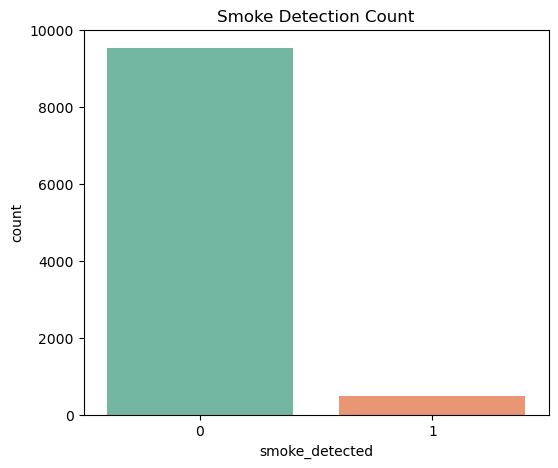

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\3695559291.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fire_detected', data=df, palette='Set1')


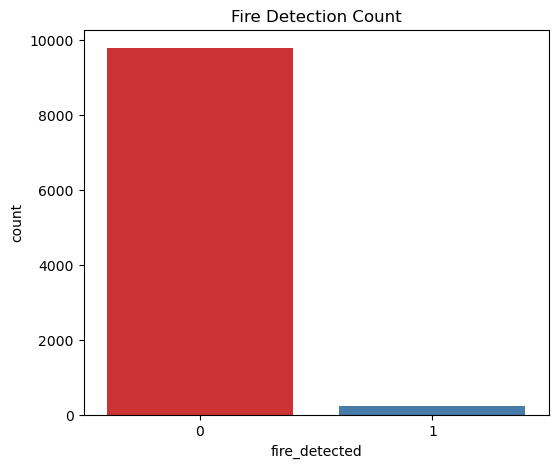

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\3695559291.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='weighted_event_risk', data=df, estimator=np.mean, palette='coolwarm')


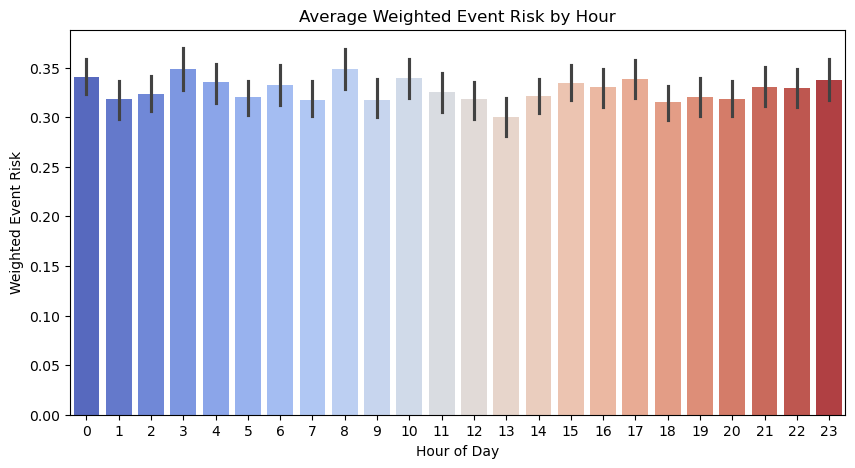

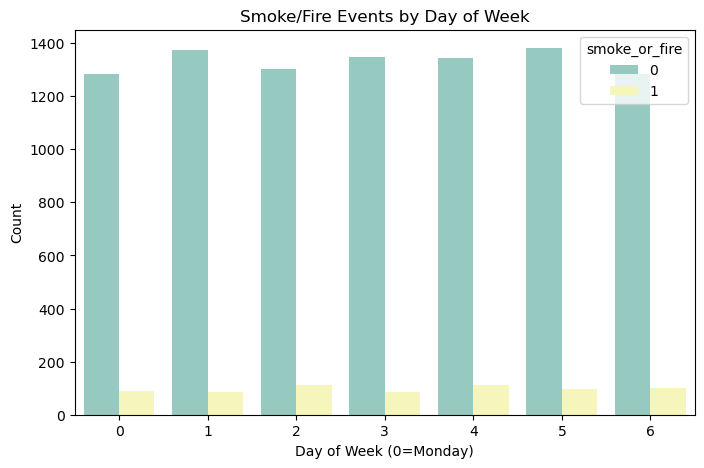


Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\fire_smoke_detection_dataset_processed.csv


In [99]:
#------------------------------------------------
#Timestamp → datetime features (hour, date, dayofweek)
#Smoke or Fire Combined Flag (smoke_or_fire)
#Normalization of probability
#Weighted Event Risk Score (combining probability & event flag)
#--------------------------------------------------


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\fire_smoke_detection_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date
df['dayofweek'] = df['timestamp'].dt.dayofweek

# 2️⃣ Smoke & Fire Flags
# Create combined event flag
df['smoke_or_fire'] = df.apply(lambda x: 1 if (x['smoke_detected']==1 or x['fire_detected']==1) else 0, axis=1)

# 3️⃣ Event Probability Normalization
scaler = MinMaxScaler()
df[['probability_norm']] = scaler.fit_transform(df[['probability']])

# 4️⃣ Weighted Event Risk Score
# Formula: 0.6*probability_norm + 0.4*smoke_or_fire
df['weighted_event_risk'] = 0.6*df['probability_norm'] + 0.4*df['smoke_or_fire']

# ---------------------------
# Quick Checks
# ---------------------------
print("\nData Types After Feature Engineering:")
print(df.dtypes)

print("\nFirst 5 rows after feature engineering:")
print(df.head())

# ---------------------------
# Visualization
# ---------------------------

# 1️⃣ Distribution of probability
plt.figure(figsize=(8,5))
sns.histplot(df['probability'], bins=30, kde=True, color='orange')
plt.title("Distribution of Detection Probability")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.show()

# 2️⃣ Smoke vs Fire Counts
plt.figure(figsize=(6,5))
sns.countplot(x='smoke_detected', data=df, palette='Set2')
plt.title("Smoke Detection Count")
plt.show()

plt.figure(figsize=(6,5))
sns.countplot(x='fire_detected', data=df, palette='Set1')
plt.title("Fire Detection Count")
plt.show()

# 3️⃣ Weighted Event Risk by Hour
plt.figure(figsize=(10,5))
sns.barplot(x='hour', y='weighted_event_risk', data=df, estimator=np.mean, palette='coolwarm')
plt.title("Average Weighted Event Risk by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Weighted Event Risk")
plt.show()

# 4️⃣ Smoke/Fire Events by Day of Week
plt.figure(figsize=(8,5))
sns.countplot(x='dayofweek', hue='smoke_or_fire', data=df, palette='Set3')
plt.title("Smoke/Fire Events by Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Count")
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\fire_smoke_detection_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")


In [175]:
#--------------------------------------------
#Target = smoke_or_fire (1 if smoke or fire detected, else 0)
#Features = probability_norm, hour, dayofweek
#চাইলে weighted_event_risk বা fire_detected flag add করলে model আরও শক্তিশালী হবে।

#-------------------------------------------------


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------------------------
# Load Processed Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\fire_smoke_detection_dataset_processed.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Target Variable (Binary)
# ---------------------------
y = df['smoke_or_fire']

# ---------------------------
# Features
# ---------------------------
feature_cols = [
    'probability_norm',
    'hour',
    'dayofweek'
]
X = df[feature_cols]

# ---------------------------
# Split Dataset
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ---------------------------
# Logistic Regression
# ---------------------------
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ---------------------------
# Evaluation
# ---------------------------
print("\n📌 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📌 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))



📌 Accuracy: 0.9348

📌 Confusion Matrix:
 [[2337    0]
 [ 163    0]]

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97      2337
           1       0.00      0.00      0.00       163

    accuracy                           0.93      2500
   macro avg       0.47      0.50      0.48      2500
weighted avg       0.87      0.93      0.90      2500



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\restricted_zone_dataset_10000.csv")

print(df.head())


  person_id  is_authorized zone_id            timestamp
0    P00861              1      Z3  2025-11-30 01:48:34
1    P03773              1      Z7  2025-11-25 08:30:37
2    P03093              1     Z10  2025-11-16 04:51:48
3    P00467              1      Z1  2025-11-26 18:34:06
4    P04427              1      Z2  2025-11-18 04:44:32


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   person_id      10000 non-null  object
 1   is_authorized  10000 non-null  int64 
 2   zone_id        10000 non-null  object
 3   timestamp      10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [102]:
df.describe

<bound method NDFrame.describe of      person_id  is_authorized zone_id            timestamp
0       P00861              1      Z3  2025-11-30 01:48:34
1       P03773              1      Z7  2025-11-25 08:30:37
2       P03093              1     Z10  2025-11-16 04:51:48
3       P00467              1      Z1  2025-11-26 18:34:06
4       P04427              1      Z2  2025-11-18 04:44:32
...        ...            ...     ...                  ...
9995    P04932              0      Z3  2025-12-01 10:32:19
9996    P01692              1     Z10  2025-11-26 06:35:22
9997    P04551              1      Z2  2025-12-05 07:17:30
9998    P04409              0      Z6  2025-12-04 23:08:22
9999    P00228              1      Z5  2025-11-30 06:04:13

[10000 rows x 4 columns]>

In [103]:
df = df.dropna()

In [104]:
df.columns

Index(['person_id', 'is_authorized', 'zone_id', 'timestamp'], dtype='object')


Data Types After Feature Engineering:
person_id                     object
is_authorized                  int64
zone_id                       object
timestamp             datetime64[ns]
hour                           int32
date                          object
dayofweek                      int32
zone_encoded                   int64
access_violation               int64
weighted_zone_risk           float64
dtype: object

First 5 rows after feature engineering:
  person_id  is_authorized zone_id           timestamp  hour        date  \
0    P00861              1      Z3 2025-11-30 01:48:34     1  2025-11-30   
1    P03773              1      Z7 2025-11-25 08:30:37     8  2025-11-25   
2    P03093              1     Z10 2025-11-16 04:51:48     4  2025-11-16   
3    P00467              1      Z1 2025-11-26 18:34:06    18  2025-11-26   
4    P04427              1      Z2 2025-11-18 04:44:32     4  2025-11-18   

   dayofweek  zone_encoded  access_violation  weighted_zone_risk  
0          6

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\271899085.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='access_violation', data=df, palette='Set1')


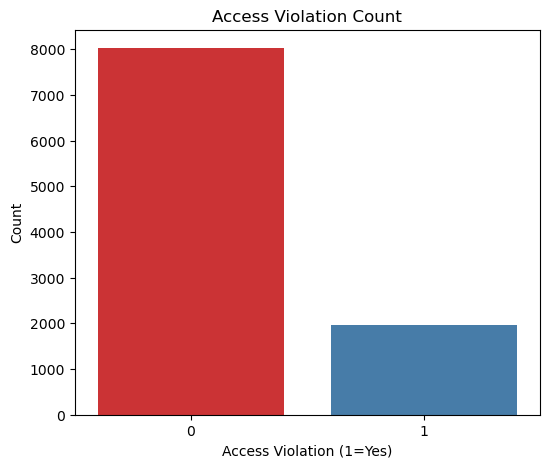

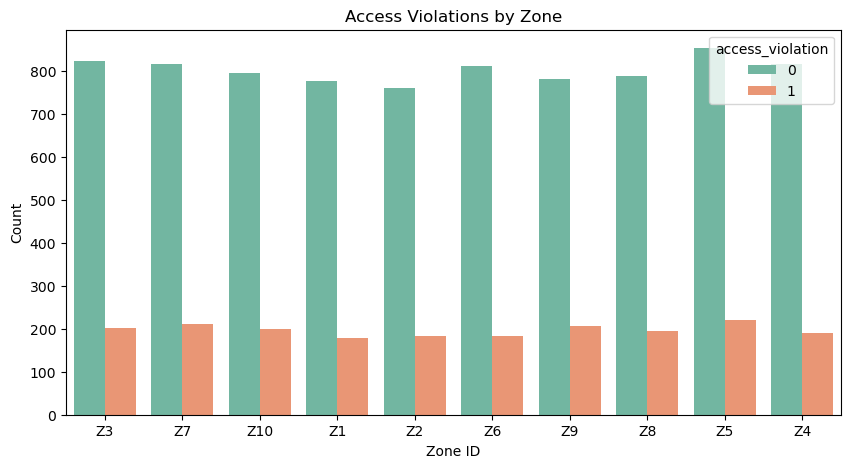

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\271899085.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='weighted_zone_risk', data=df, estimator=np.mean, palette='coolwarm')


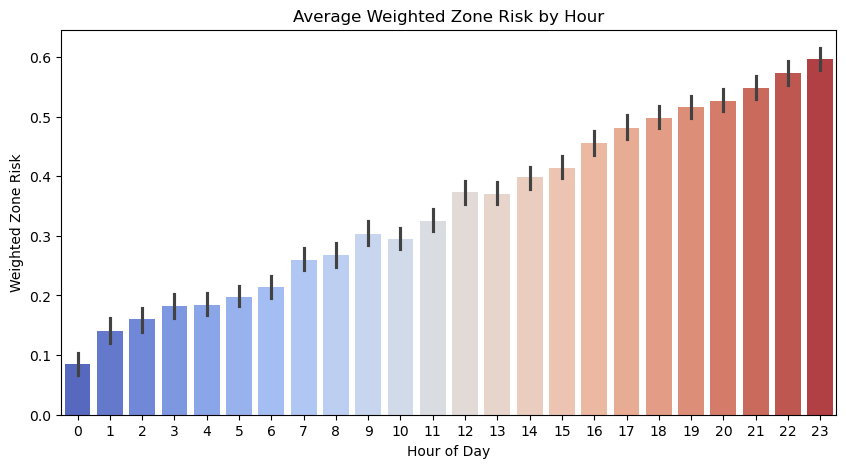

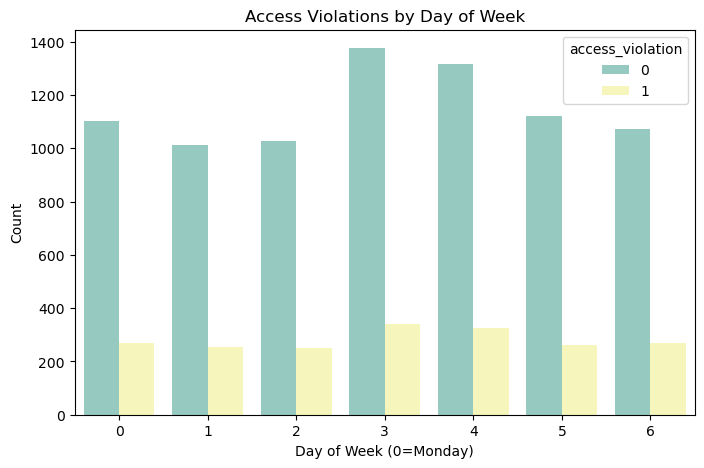


Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\restricted_zone_dataset_processed.csv


In [105]:
#------------------------------------------
#Timestamp → datetime features (hour, date, dayofweek)
#Encode zone_id to numerical values
#Access Violation Flag (access_violation)
#Weighted Zone Risk Score (combining violation and hour of access)

#----------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\restricted_zone_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date
df['dayofweek'] = df['timestamp'].dt.dayofweek

# 2️⃣ Encode zone_id to numerical values
le = LabelEncoder()
df['zone_encoded'] = le.fit_transform(df['zone_id'])

# 3️⃣ Access Violation Flag
# If not authorized (0), mark as violation
df['access_violation'] = df['is_authorized'].apply(lambda x: 1 if x==0 else 0)

# 4️⃣ Weighted Zone Risk Score
# Formula: 0.5 * access_violation + 0.5 * (hour/23)  # normalize hour to 0-1
df['weighted_zone_risk'] = 0.5*df['access_violation'] + 0.5*(df['hour']/23)

# ---------------------------
# Quick Checks
# ---------------------------
print("\nData Types After Feature Engineering:")
print(df.dtypes)

print("\nFirst 5 rows after feature engineering:")
print(df.head())

# ---------------------------
# Visualization
# ---------------------------

# 1️⃣ Count of Access Violations
plt.figure(figsize=(6,5))
sns.countplot(x='access_violation', data=df, palette='Set1')
plt.title("Access Violation Count")
plt.xlabel("Access Violation (1=Yes)")
plt.ylabel("Count")
plt.show()

# 2️⃣ Access Violations by Zone
plt.figure(figsize=(10,5))
sns.countplot(x='zone_id', hue='access_violation', data=df, palette='Set2')
plt.title("Access Violations by Zone")
plt.xlabel("Zone ID")
plt.ylabel("Count")
plt.show()

# 3️⃣ Weighted Zone Risk by Hour
plt.figure(figsize=(10,5))
sns.barplot(x='hour', y='weighted_zone_risk', data=df, estimator=np.mean, palette='coolwarm')
plt.title("Average Weighted Zone Risk by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Weighted Zone Risk")
plt.show()

# 4️⃣ Violations by Day of Week
plt.figure(figsize=(8,5))
sns.countplot(x='dayofweek', hue='access_violation', data=df, palette='Set3')
plt.title("Access Violations by Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Count")
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\restricted_zone_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")


In [176]:
#--------------------------------------------
#Target = access_violation (1 = unauthorized access, 0 = authorized)
#Features = zone_encoded, hour, dayofweek, weighted_zone_risk
#চাইলে person_id frequency বা historical violation count add করলে model আরও শক্তিশালী হবে।

#-------------------------------------------------


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------------------------
# Load Processed Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\restricted_zone_dataset_processed.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Target Variable (Binary)
# ---------------------------
y = df['access_violation']

# ---------------------------
# Features
# ---------------------------
feature_cols = [
    'zone_encoded',
    'hour',
    'dayofweek',
    'weighted_zone_risk'
]
X = df[feature_cols]

# ---------------------------
# Split Dataset
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ---------------------------
# Logistic Regression
# ---------------------------
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ---------------------------
# Evaluation
# ---------------------------
print("\n📌 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📌 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))



📌 Accuracy: 1.0

📌 Confusion Matrix:
 [[1998    0]
 [   0  502]]

📌 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1998
           1       1.00      1.00      1.00       502

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\smart_seating_dataset_10000.csv")

print(df.head())


  student_id  seat_position  disturbance_score  recommended_seat
0     S00001            103               6.77               100
1     S00002            180               5.26               177
2     S00003             93               7.18                89
3     S00004             15               5.81                12
4     S00005            107               9.48               102


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   student_id         10000 non-null  object 
 1   seat_position      10000 non-null  int64  
 2   disturbance_score  10000 non-null  float64
 3   recommended_seat   10000 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 312.6+ KB


In [108]:
df.describe

<bound method NDFrame.describe of      student_id  seat_position  disturbance_score  recommended_seat
0        S00001            103               6.77               100
1        S00002            180               5.26               177
2        S00003             93               7.18                89
3        S00004             15               5.81                12
4        S00005            107               9.48               102
...         ...            ...                ...               ...
9995     S09996            140               1.79               139
9996     S09997            101               0.03               101
9997     S09998             23               3.30                21
9998     S09999            200               3.78               198
9999     S10000            112               9.45               107

[10000 rows x 4 columns]>

In [109]:
df.columns

Index(['student_id', 'seat_position', 'disturbance_score', 'recommended_seat'], dtype='object')

In [110]:
df = df.dropna()


Data Types After Feature Engineering:
student_id                object
seat_position              int64
disturbance_score        float64
recommended_seat           int64
disturbance_norm         float64
seat_diff                  int64
weighted_seating_risk    float64
dtype: object

First 5 rows after feature engineering:
  student_id  seat_position  disturbance_score  recommended_seat  \
0     S00001            103               6.77               100   
1     S00002            180               5.26               177   
2     S00003             93               7.18                89   
3     S00004             15               5.81                12   
4     S00005            107               9.48               102   

   disturbance_norm  seat_diff  weighted_seating_risk  
0             0.677          3                 0.6462  
1             0.526          3                 0.5556  
2             0.718          4                 0.7508  
3             0.581          3            

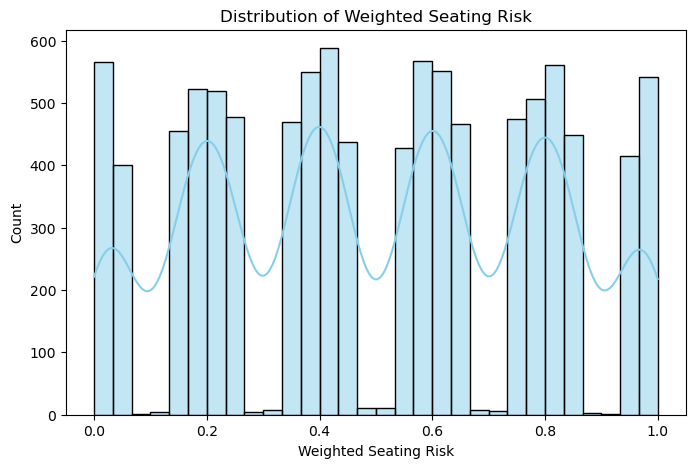

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\1668179897.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seat_position', y='weighted_seating_risk', data=top_seats, palette='Set1')


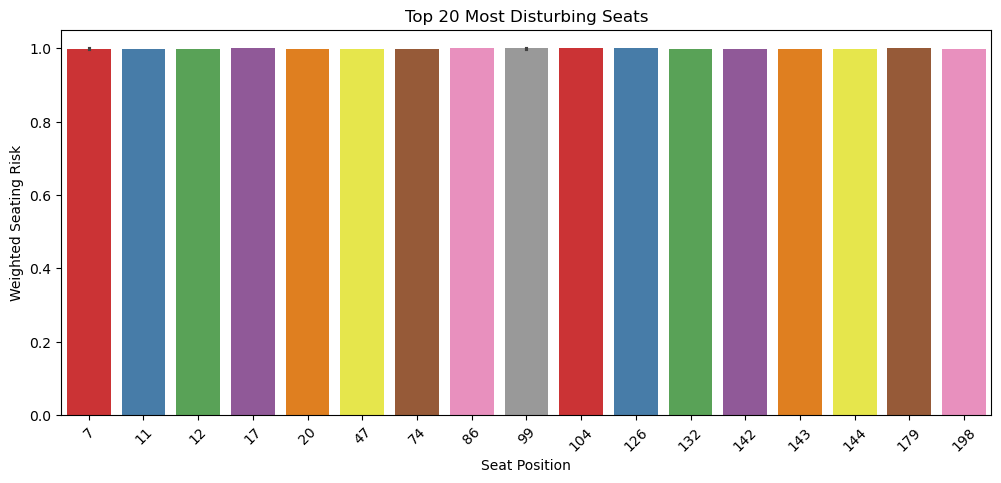

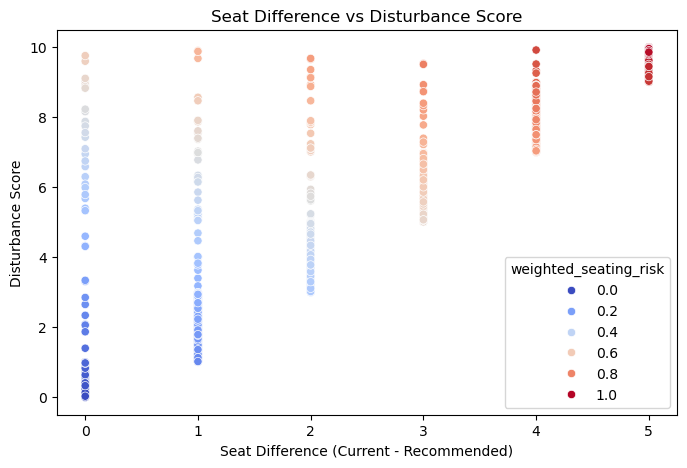


Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\smart_seating_dataset_processed.csv


In [111]:
#----------------------------------------------
#disturbance_score → normalized (disturbance_norm)
#Difference between seat_position and recommended_seat → seat_diff
#Weighted seating risk combining disturbance and seat difference → weighted_seating_risk
#-----------------------------------------------


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\smart_seating_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Normalize disturbance_score
scaler = MinMaxScaler()
df['disturbance_norm'] = scaler.fit_transform(df[['disturbance_score']])

# 2️⃣ Seating Difference
# Difference between current and recommended seat
df['seat_diff'] = abs(df['seat_position'] - df['recommended_seat'])

# 3️⃣ Weighted Seating Risk
# Formula: 0.6*disturbance_norm + 0.4*(seat_diff/max_seat_diff)
max_seat_diff = df['seat_diff'].max()
df['weighted_seating_risk'] = 0.6*df['disturbance_norm'] + 0.4*(df['seat_diff']/max_seat_diff)

# ---------------------------
# Quick Checks
# ---------------------------
print("\nData Types After Feature Engineering:")
print(df.dtypes)

print("\nFirst 5 rows after feature engineering:")
print(df.head())

# ---------------------------
# Visualization
# ---------------------------

# 1️⃣ Distribution of Weighted Seating Risk
plt.figure(figsize=(8,5))
sns.histplot(df['weighted_seating_risk'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Weighted Seating Risk")
plt.xlabel("Weighted Seating Risk")
plt.ylabel("Count")
plt.show()

# 2️⃣ Top 20 Most Disturbing Seats
top_seats = df.sort_values('weighted_seating_risk', ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(x='seat_position', y='weighted_seating_risk', data=top_seats, palette='Set1')
plt.title("Top 20 Most Disturbing Seats")
plt.xlabel("Seat Position")
plt.ylabel("Weighted Seating Risk")
plt.xticks(rotation=45)
plt.show()

# 3️⃣ Seat Difference vs Disturbance Score
plt.figure(figsize=(8,5))
sns.scatterplot(x='seat_diff', y='disturbance_score', data=df, hue='weighted_seating_risk', palette='coolwarm')
plt.title("Seat Difference vs Disturbance Score")
plt.xlabel("Seat Difference (Current - Recommended)")
plt.ylabel("Disturbance Score")
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\smart_seating_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")


In [180]:
#_-------------------------------------
#Replaced mean_squared_error(y_test, y_pred, squared=False)
#→ np.sqrt(mean_squared_error(y_test, y_pred))
#-----------------------------------


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ---------------------------
# Load processed dataset
# ---------------------------
df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\smart_seating_dataset_processed.csv")

# Features & Target
X = df[['seat_position', 'disturbance_norm', 'seat_diff']]
y = df['recommended_seat']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # old sklearn compatible
r2 = r2_score(y_test, y_pred)

print("\n📌 RMSE:", rmse)
print("\n📌 R^2 Score:", r2)



📌 RMSE: 3.0259802015083834e-14

📌 R^2 Score: 1.0


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\parent_behavior_report_dataset_10000.csv")

print(df.head())


  student_id    month  attendance_rate  attention_rate  discipline_issues  \
0     S00001  Month_1            81.24           82.72                  1   
1     S00001  Month_2            98.52           54.00                  3   
2     S00001  Month_3            91.96           62.12                  1   
3     S00001  Month_4            87.96           88.68                  3   
4     S00001  Month_5            74.68           76.43                  1   

   overall_rating  
0           10.00  
1            8.50  
2           10.00  
3            9.47  
4           10.00  


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   student_id         12000 non-null  object 
 1   month              12000 non-null  object 
 2   attendance_rate    12000 non-null  float64
 3   attention_rate     12000 non-null  float64
 4   discipline_issues  12000 non-null  int64  
 5   overall_rating     12000 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 562.6+ KB


In [114]:
df.describe

<bound method NDFrame.describe of       student_id     month  attendance_rate  attention_rate  \
0         S00001   Month_1            81.24           82.72   
1         S00001   Month_2            98.52           54.00   
2         S00001   Month_3            91.96           62.12   
3         S00001   Month_4            87.96           88.68   
4         S00001   Month_5            74.68           76.43   
...          ...       ...              ...             ...   
11995     S01000   Month_8            70.14           95.67   
11996     S01000   Month_9            96.21           71.42   
11997     S01000  Month_10            79.22           68.89   
11998     S01000  Month_11            98.16           61.57   
11999     S01000  Month_12            79.51           81.79   

       discipline_issues  overall_rating  
0                      1           10.00  
1                      3            8.50  
2                      1           10.00  
3                      3            9

In [115]:
df.columns

Index(['student_id', 'month', 'attendance_rate', 'attention_rate',
       'discipline_issues', 'overall_rating'],
      dtype='object')

In [116]:
df = df.dropna()


Data Types After Feature Engineering:
student_id               object
month                    object
attendance_rate         float64
attention_rate          float64
discipline_issues         int64
overall_rating          float64
attendance_norm         float64
attention_norm          float64
discipline_norm         float64
behavior_score          float64
weighted_performance    float64
dtype: object

First 5 rows after feature engineering:
  student_id    month  attendance_rate  attention_rate  discipline_issues  \
0     S00001  Month_1            81.24           82.72                  1   
1     S00001  Month_2            98.52           54.00                  3   
2     S00001  Month_3            91.96           62.12                  1   
3     S00001  Month_4            87.96           88.68                  3   
4     S00001  Month_5            74.68           76.43                  1   

   overall_rating  attendance_norm  attention_norm  discipline_norm  \
0           10.00   

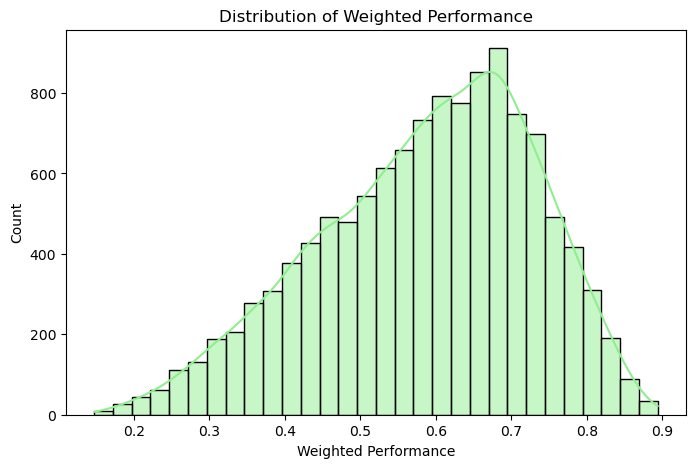

C:\Users\Tamim\AppData\Local\Temp\ipykernel_7196\195738224.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='student_id', y='weighted_performance', data=top_students, palette='Set2')


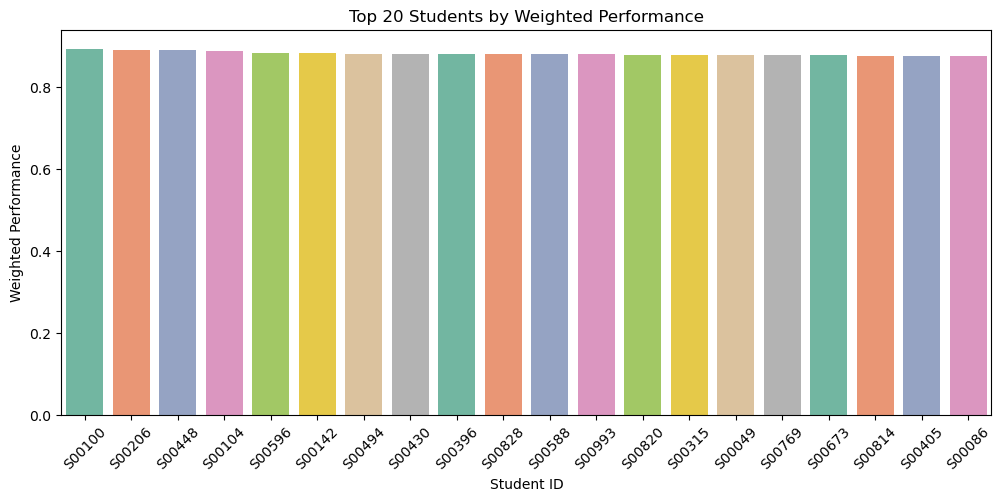


Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\parent_behavior_report_dataset_processed.csv


In [117]:
#-----------------------------------------
#attendance_rate, attention_rate, discipline_issues → normalized
#behavior_score = 0.4attendance + 0.4attention - 0.2*discipline
#weighted_performance = 0.5behavior_score + 0.5(overall_rating/10)
#-----------------------------------------------



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\parent_behavior_report_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Normalize attendance_rate, attention_rate, discipline_issues
scaler = MinMaxScaler()
df[['attendance_norm', 'attention_norm', 'discipline_norm']] = scaler.fit_transform(
    df[['attendance_rate', 'attention_rate', 'discipline_issues']]
)

# 2️⃣ Combined Behavior Score
# Formula: 0.4*attendance + 0.4*attention - 0.2*discipline
df['behavior_score'] = 0.4*df['attendance_norm'] + 0.4*df['attention_norm'] - 0.2*df['discipline_norm']

# 3️⃣ Weighted Overall Performance
# Formula: 0.5*behavior_score + 0.5*(overall_rating/10)
df['weighted_performance'] = 0.5*df['behavior_score'] + 0.5*(df['overall_rating']/10)

# ---------------------------
# Quick Checks
# ---------------------------
print("\nData Types After Feature Engineering:")
print(df.dtypes)

print("\nFirst 5 rows after feature engineering:")
print(df.head())

# ---------------------------
# Visualization
# ---------------------------

# 1️⃣ Distribution of Weighted Performance
plt.figure(figsize=(8,5))
sns.histplot(df['weighted_performance'], bins=30, kde=True, color='lightgreen')
plt.title("Distribution of Weighted Performance")
plt.xlabel("Weighted Performance")
plt.ylabel("Count")
plt.show()

# 2️⃣ Top 20 Students by Weighted Performance
top_students = df.sort_values('weighted_performance', ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(x='student_id', y='weighted_performance', data=top_students, palette='Set2')
plt.title("Top 20 Students by Weighted Performance")
plt.xlabel("Student ID")
plt.ylabel("Weighted Performance")
plt.xticks(rotation=45)
plt.show()

# 3️⃣ Discipline vs Attendance
plt.figure(figsize=(8,5))
sns.scatterplot(x='attendance_rate', y='discipline_issues', data=df, hue='weighted_performance', palette='coolwarm')
plt.title("Discipline vs Attendance")
plt.xlabel("Attendance Rate")
plt.ylabel("Discipline Issues")
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\parent_behavior_report_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")


In [184]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\parent_behavior_report_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Feature Engineering
# ---------------------------

# Normalize features
scaler = MinMaxScaler()
df[['attendance_norm', 'attention_norm', 'discipline_norm']] = scaler.fit_transform(
    df[['attendance_rate', 'attention_rate', 'discipline_issues']]
)

# Behavior Score
df['behavior_score'] = 0.4*df['attendance_norm'] + 0.4*df['attention_norm'] - 0.2*df['discipline_norm']

# Weighted Performance
df['weighted_performance'] = 0.5*df['behavior_score'] + 0.5*(df['overall_rating']/10)

# ---------------------------
# Random Forest Regression
# ---------------------------
X = df[['attendance_norm', 'attention_norm', 'discipline_norm', 'behavior_score']]
y = df['weighted_performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")


RMSE: 0.0013
R^2 Score: 0.9999


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\performance_behavior_correlation_dataset_10000.csv")

print(df.head())


  student_id  attention_avg  engagement_avg  exam_score  \
0     S00001          68.73           68.68       83.80   
1     S00002          97.54           66.65       51.07   
2     S00003          86.60           58.81       60.80   
3     S00004          79.93           80.36       79.80   
4     S00005          57.80           73.83       68.93   

   assignment_completion_rate  correlation_score  
0                       81.91              74.37  
1                       72.96              74.06  
2                       98.22              75.43  
3                       60.95              76.24  
4                       79.39              69.15  


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   student_id                  10000 non-null  object 
 1   attention_avg               10000 non-null  float64
 2   engagement_avg              10000 non-null  float64
 3   exam_score                  10000 non-null  float64
 4   assignment_completion_rate  10000 non-null  float64
 5   correlation_score           10000 non-null  float64
dtypes: float64(5), object(1)
memory usage: 468.9+ KB


In [4]:
df.describe

<bound method NDFrame.describe of      student_id  attention_avg  engagement_avg  exam_score  \
0        S00001          68.73           68.68       83.80   
1        S00002          97.54           66.65       51.07   
2        S00003          86.60           58.81       60.80   
3        S00004          79.93           80.36       79.80   
4        S00005          57.80           73.83       68.93   
...         ...            ...             ...         ...   
9995     S09996          92.88           93.85       97.14   
9996     S09997          94.88           52.34       84.87   
9997     S09998          97.34           65.18       41.17   
9998     S09999          69.87           72.17       64.06   
9999     S10000          60.86           58.61       55.44   

      assignment_completion_rate  correlation_score  
0                          81.91              74.37  
1                          72.96              74.06  
2                          98.22              75.43  
3    

In [5]:
df.columns

Index(['student_id', 'attention_avg', 'engagement_avg', 'exam_score',
       'assignment_completion_rate', 'correlation_score'],
      dtype='object')

In [6]:
df = df.dropna()


Data Types After Feature Engineering:
student_id                     object
attention_avg                 float64
engagement_avg                float64
exam_score                    float64
assignment_completion_rate    float64
correlation_score             float64
attention_norm                float64
engagement_norm               float64
exam_norm                     float64
assignment_norm               float64
weighted_learning_score       float64
adjusted_correlation_score    float64
dtype: object

First 5 rows after feature engineering:
  student_id  attention_avg  engagement_avg  exam_score  \
0     S00001          68.73           68.68       83.80   
1     S00002          97.54           66.65       51.07   
2     S00003          86.60           58.81       60.80   
3     S00004          79.93           80.36       79.80   
4     S00005          57.80           73.83       68.93   

   assignment_completion_rate  correlation_score  attention_norm  \
0                       81.

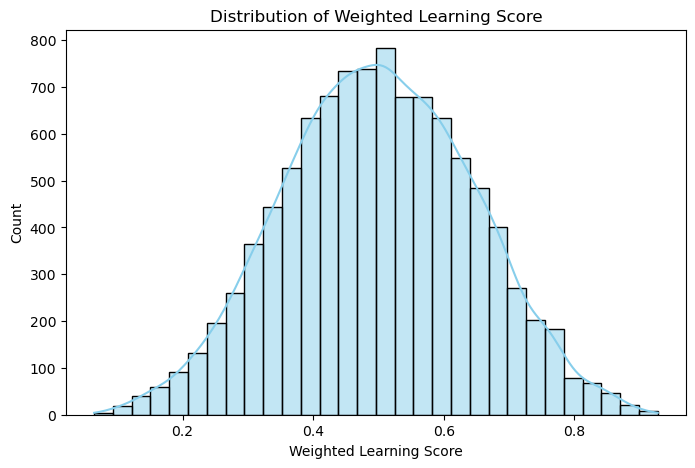

C:\Users\Tamim\AppData\Local\Temp\ipykernel_9752\157682348.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='student_id', y='adjusted_correlation_score', data=top_students, palette='Set3')


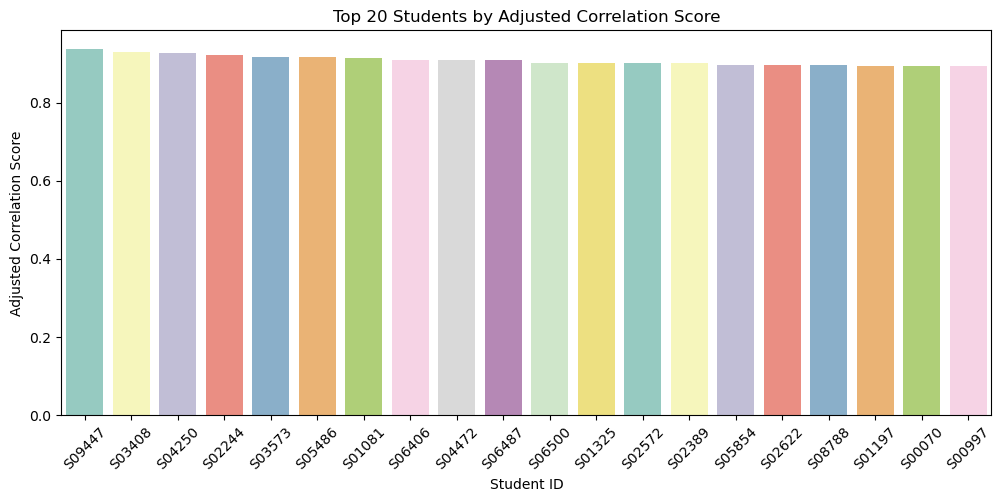

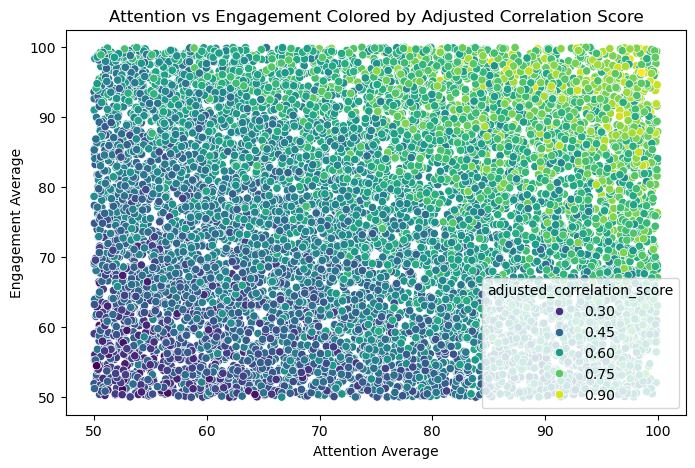


Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\performance_behavior_correlation_dataset_processed.csv


In [7]:
#------------------------------------------
#attention_avg, engagement_avg, exam_score, assignment_completion_rate → normalized
#weighted_learning_score = 0.3attention + 0.3engagement + 0.2exam + 0.2assignment
#adjusted_correlation_score = 0.7weighted_learning_score + 0.3(correlation_score/100)
#---------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\performance_behavior_correlation_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Normalize attention_avg, engagement_avg, exam_score, assignment_completion_rate
scaler = MinMaxScaler()
df[['attention_norm', 'engagement_norm', 'exam_norm', 'assignment_norm']] = scaler.fit_transform(
    df[['attention_avg', 'engagement_avg', 'exam_score', 'assignment_completion_rate']]
)

# 2️⃣ Weighted Learning Score
# Formula: 0.3*attention + 0.3*engagement + 0.2*exam + 0.2*assignment
df['weighted_learning_score'] = (
    0.3*df['attention_norm'] + 
    0.3*df['engagement_norm'] + 
    0.2*df['exam_norm'] + 
    0.2*df['assignment_norm']
)

# 3️⃣ Correlation Adjustment Score
# Combine weighted_learning_score with existing correlation_score
df['adjusted_correlation_score'] = 0.7*df['weighted_learning_score'] + 0.3*(df['correlation_score']/100)

# ---------------------------
# Quick Checks
# ---------------------------
print("\nData Types After Feature Engineering:")
print(df.dtypes)

print("\nFirst 5 rows after feature engineering:")
print(df.head())

# ---------------------------
# Visualization
# ---------------------------

# 1️⃣ Distribution of Weighted Learning Score
plt.figure(figsize=(8,5))
sns.histplot(df['weighted_learning_score'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Weighted Learning Score")
plt.xlabel("Weighted Learning Score")
plt.ylabel("Count")
plt.show()

# 2️⃣ Top 20 Students by Adjusted Correlation Score
top_students = df.sort_values('adjusted_correlation_score', ascending=False).head(20)
plt.figure(figsize=(12,5))
sns.barplot(x='student_id', y='adjusted_correlation_score', data=top_students, palette='Set3')
plt.title("Top 20 Students by Adjusted Correlation Score")
plt.xlabel("Student ID")
plt.ylabel("Adjusted Correlation Score")
plt.xticks(rotation=45)
plt.show()

# 3️⃣ Attention vs Engagement Scatter
plt.figure(figsize=(8,5))
sns.scatterplot(x='attention_avg', y='engagement_avg', data=df, hue='adjusted_correlation_score', palette='viridis')
plt.title("Attention vs Engagement Colored by Adjusted Correlation Score")
plt.xlabel("Attention Average")
plt.ylabel("Engagement Average")
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\performance_behavior_correlation_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")


In [8]:
# ============================================
# MODEL TRAINING (Regression)
# Dataset: performance_behavior_correlation_dataset_processed.csv
# Target: adjusted_correlation_score
# Best Model: RandomForestRegressor
# ============================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---------------------------
# Load Processed Dataset
# ---------------------------
df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\performance_behavior_correlation_dataset_processed.csv")

# ---------------------------
# Train/Test Split
# ---------------------------

feature_cols = [
    'attention_norm',
    'engagement_norm',
    'exam_norm',
    'assignment_norm',
    'weighted_learning_score',
    'correlation_score'
]

X = df[feature_cols]
y = df['adjusted_correlation_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# Best Model → RandomForestRegressor
# ---------------------------
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

model.fit(X_train, y_train)

# ---------------------------
# Evaluation
# ---------------------------
pred = model.predict(X_test)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2  = r2_score(y_test, pred)

print("\n=========== MODEL PERFORMANCE ===========")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"R^2  : {r2:.4f}")
print("==========================================\n")

# ---------------------------
# Save Trained Model
# ---------------------------
import joblib
save_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\student_performance_model.pkl"
joblib.dump(model, save_path)

print(f"Model saved successfully at: {save_path}")



=========== MODEL PERFORMANCE ===========
MAE  : 0.0003
MSE  : 0.0000
R^2  : 1.0000

Model saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\student_performance_model.pkl


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\assignment_deadline_prediction_dataset_10000.csv")

print(df.head())


  student_id  past_deadline_misses  engagement_avg prediction_risk
0     S00001                     6           82.99          medium
1     S00002                     3           71.58          medium
2     S00003                    10           88.18            high
3     S00004                     7           99.63            high
4     S00005                     4           82.95          medium


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            10000 non-null  object 
 1   past_deadline_misses  10000 non-null  int64  
 2   engagement_avg        10000 non-null  float64
 3   prediction_risk       10000 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 312.6+ KB


In [12]:
df.describe()

past_deadline_misses  engagement_avg
count          10000.000000    10000.000000
mean               4.989600       75.015498
std                3.163589       14.354021
min                0.000000       50.010000
25%                2.000000       62.777500
50%                5.000000       75.070000
75%                8.000000       87.210000
max               10.000000       99.990000

In [13]:
df.columns

Index(['student_id', 'past_deadline_misses', 'engagement_avg',
       'prediction_risk'],
      dtype='object')

In [14]:
df = df.dropna()


Data Types After Feature Engineering:
student_id                  object
past_deadline_misses         int64
engagement_avg             float64
prediction_risk             object
misses_norm                float64
engagement_norm            float64
risk_score                 float64
prediction_risk_encoded      int64
dtype: object

First 5 rows after feature engineering:
  student_id  past_deadline_misses  engagement_avg prediction_risk  \
0     S00001                     6           82.99          medium   
1     S00002                     3           71.58          medium   
2     S00003                    10           88.18            high   
3     S00004                     7           99.63            high   
4     S00005                     4           82.95          medium   

   misses_norm  engagement_norm  risk_score  prediction_risk_encoded  
0          0.6         0.659864    0.496054                        1  
1          0.3         0.431573    0.407371                    

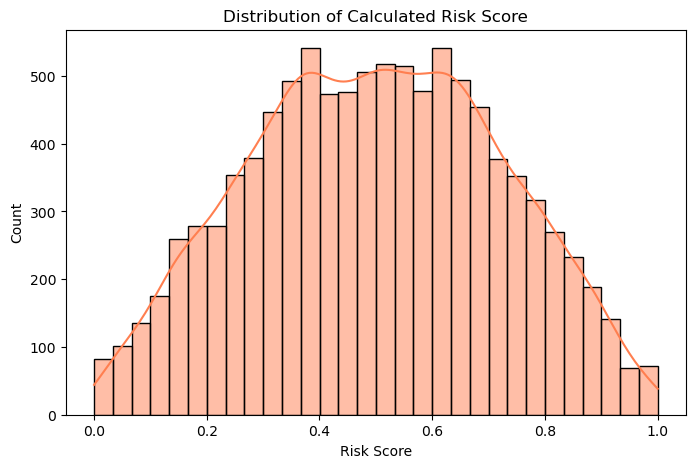

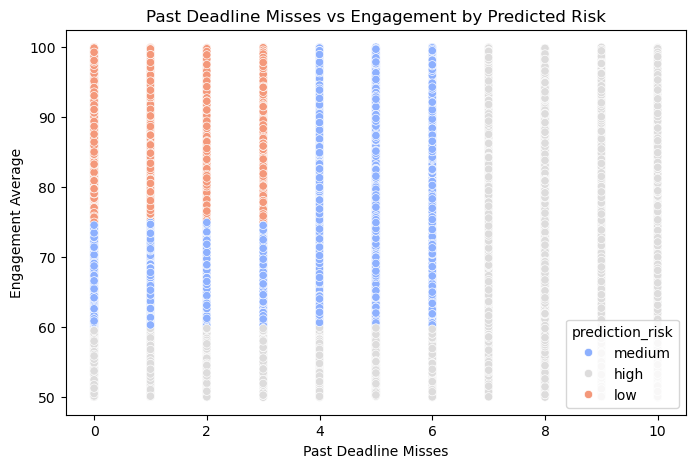

C:\Users\Tamim\AppData\Local\Temp\ipykernel_9752\3319819922.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='prediction_risk', y='engagement_avg', data=df, palette='Set2')


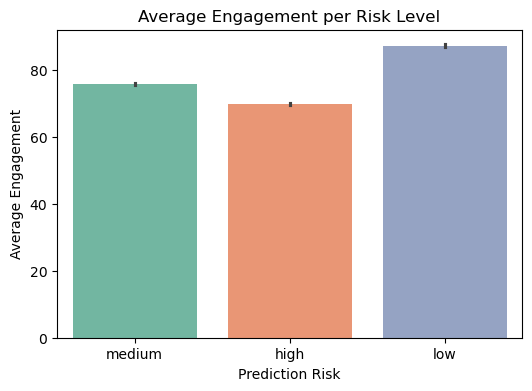


Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\assignment_deadline_dataset_processed.csv


In [15]:
#---------------------------------------------
#past_deadline_misses এবং engagement_avg → normalized
#risk_score = 0.6 * misses_norm + 0.4 * (1 - engagement_norm)
#prediction_risk_encoded → numeric encoding of low/medium/high
#------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\assignment_deadline_prediction_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Normalize past_deadline_misses and engagement_avg
scaler = MinMaxScaler()
df[['misses_norm', 'engagement_norm']] = scaler.fit_transform(df[['past_deadline_misses', 'engagement_avg']])

# 2️⃣ Risk Score Calculation
# Higher misses and lower engagement -> higher risk
df['risk_score'] = 0.6*df['misses_norm'] + 0.4*(1 - df['engagement_norm'])

# 3️⃣ Encode prediction_risk as numeric for visualization
risk_map = {'low': 0, 'medium': 1, 'high': 2}
df['prediction_risk_encoded'] = df['prediction_risk'].map(risk_map)

# ---------------------------
# Quick Checks
# ---------------------------
print("\nData Types After Feature Engineering:")
print(df.dtypes)

print("\nFirst 5 rows after feature engineering:")
print(df.head())

# ---------------------------
# Visualization
# ---------------------------

# 1️⃣ Distribution of Risk Score
plt.figure(figsize=(8,5))
sns.histplot(df['risk_score'], bins=30, kde=True, color='coral')
plt.title("Distribution of Calculated Risk Score")
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.show()

# 2️⃣ Past Deadline Misses vs Engagement colored by Prediction Risk
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='past_deadline_misses', 
    y='engagement_avg', 
    hue='prediction_risk', 
    data=df, palette='coolwarm'
)
plt.title("Past Deadline Misses vs Engagement by Predicted Risk")
plt.xlabel("Past Deadline Misses")
plt.ylabel("Engagement Average")
plt.show()

# 3️⃣ Average Engagement per Risk Level
plt.figure(figsize=(6,4))
sns.barplot(x='prediction_risk', y='engagement_avg', data=df, palette='Set2')
plt.title("Average Engagement per Risk Level")
plt.xlabel("Prediction Risk")
plt.ylabel("Average Engagement")
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\assignment_deadline_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")


In [16]:
# -------------------------------------------
# 🔥 Model Training (Multiclass Classification)

#Training features:
#misses_norm
#engagement_norm
#risk_score
#✔ Target:
#prediction_risk_encoded (0/1/2)
#✔ ব্যবহার করছে:
#Logistic Regression (multiclass)
#Stratified split → balanced training
#Accuracy + classification report + confusion matrix
#✔ Bonus:
#Model saved → deadline_risk_prediction_model.pkl
# -------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features (X) and Target (y)
X = df[['misses_norm', 'engagement_norm', 'risk_score']]
y = df['prediction_risk_encoded']

# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Logistic Regression Model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# -------------------------------------------
# Save the model (optional)
# -------------------------------------------
import joblib
joblib.dump(model, "deadline_risk_prediction_model.pkl")

print("\nModel saved as deadline_risk_prediction_model.pkl")



Model Accuracy: 0.7716

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       452
           1       0.65      0.66      0.66       827
           2       0.83      0.84      0.83      1221

    accuracy                           0.77      2500
   macro avg       0.77      0.77      0.77      2500
weighted avg       0.77      0.77      0.77      2500


Confusion Matrix:
[[ 362   90    0]
 [  72  545  210]
 [   0  199 1022]]

Model saved as deadline_risk_prediction_model.pkl


C:\Users\Tamim\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\voice_recognition_dataset_10000.csv")

print(df.head())


              audio_path speaker_id                       spoken_text  \
0  audio/audio_00001.wav       S052  I have completed the assignment.   
1  audio/audio_00002.wav       S093  I have completed the assignment.   
2  audio/audio_00003.wav       S015    Could you repeat the question?   
3  audio/audio_00004.wav       S072                This is clear now.   
4  audio/audio_00005.wav       S061           No, that's not correct.   

   is_question            timestamp  
0            0  2025-11-14 09:25:45  
1            0  2025-11-13 13:39:57  
2            1  2025-11-22 00:31:31  
3            0  2025-11-13 18:20:24  
4            0  2025-11-24 03:37:49  


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   audio_path   10000 non-null  object
 1   speaker_id   10000 non-null  object
 2   spoken_text  10000 non-null  object
 3   is_question  10000 non-null  int64 
 4   timestamp    10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [20]:
df.describe

<bound method NDFrame.describe of                  audio_path speaker_id                       spoken_text  \
0     audio/audio_00001.wav       S052  I have completed the assignment.   
1     audio/audio_00002.wav       S093  I have completed the assignment.   
2     audio/audio_00003.wav       S015    Could you repeat the question?   
3     audio/audio_00004.wav       S072                This is clear now.   
4     audio/audio_00005.wav       S061           No, that's not correct.   
...                     ...        ...                               ...   
9995  audio/audio_09996.wav       S016    I need help with this problem.   
9996  audio/audio_09997.wav       S017                     Yes, I agree.   
9997  audio/audio_09998.wav       S080           No, that's not correct.   
9998  audio/audio_09999.wav       S019           What is the next topic?   
9999  audio/audio_10000.wav       S008           What is the next topic?   

      is_question            timestamp  
0           

In [21]:
df.columns

Index(['audio_path', 'speaker_id', 'spoken_text', 'is_question', 'timestamp'], dtype='object')

In [22]:
df = df.dropna()


Data Types After Feature Engineering:
audio_path                 object
speaker_id                 object
spoken_text                object
is_question                 int64
timestamp                  object
text_length                 int64
word_count                  int64
avg_word_length           float64
speaker_activity_score    float64
dtype: object

First 5 rows after feature engineering:
              audio_path speaker_id                       spoken_text  \
0  audio/audio_00001.wav       S052  I have completed the assignment.   
1  audio/audio_00002.wav       S093  I have completed the assignment.   
2  audio/audio_00003.wav       S015    Could you repeat the question?   
3  audio/audio_00004.wav       S072                This is clear now.   
4  audio/audio_00005.wav       S061           No, that's not correct.   

   is_question            timestamp  text_length  word_count  avg_word_length  \
0            0  2025-11-14 09:25:45           32           5         6.399987   

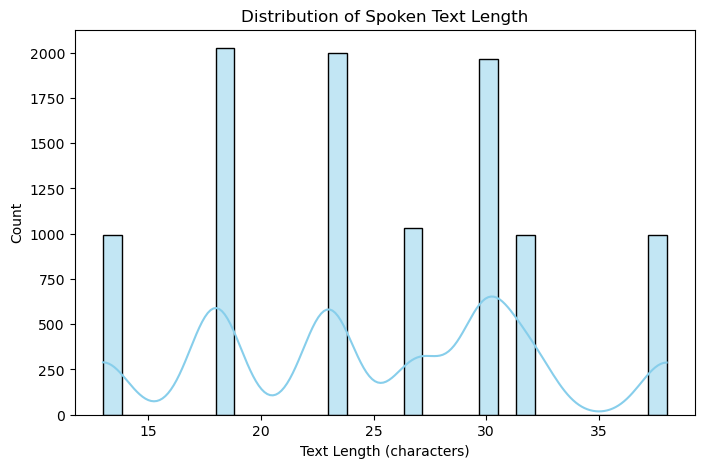

C:\Users\Tamim\AppData\Local\Temp\ipykernel_9752\862780547.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_question', y='speaker_activity_score', data=df, palette='Set3')


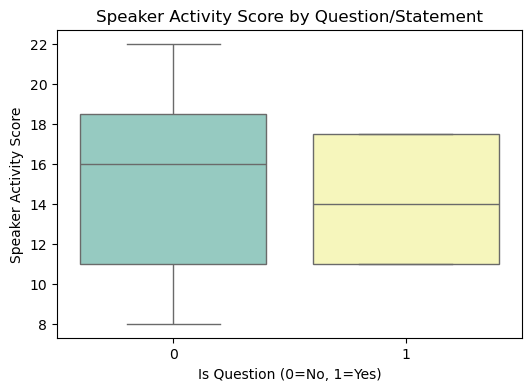

C:\Users\Tamim\AppData\Local\Temp\ipykernel_9752\862780547.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_speakers.index, y=top_speakers.values, palette='viridis')



Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\voice_recognition_dataset_processed.csv


In [23]:
#----------------------------------------
#text_length → Number of characters in spoken text
#word_count → Number of words in spoken text
#avg_word_length → Average word length
#speaker_activity_score → Weighted sum of text_length and word_count
#s_question → Already provided as binary, kept as int for consistency

#------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\voice_recognition_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Calculate text length
df['text_length'] = df['spoken_text'].apply(len)

# 2️⃣ Count words
df['word_count'] = df['spoken_text'].apply(lambda x: len(x.split()))

# 3️⃣ Encode is_question as categorical (optional for modeling)
df['is_question'] = df['is_question'].astype(int)

# 4️⃣ Average word length
df['avg_word_length'] = df['text_length'] / (df['word_count'] + 1e-5)  # avoid divide by zero

# 5️⃣ Speaker Activity Score
# Simple example: text_length + word_count weighted sum
df['speaker_activity_score'] = 0.5*df['text_length'] + 0.5*df['word_count']

# ---------------------------
# Quick Checks
# ---------------------------
print("\nData Types After Feature Engineering:")
print(df.dtypes)

print("\nFirst 5 rows after feature engineering:")
print(df.head())

# ---------------------------
# Visualization
# ---------------------------

# 1️⃣ Distribution of text length
plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Spoken Text Length")
plt.xlabel("Text Length (characters)")
plt.ylabel("Count")
plt.show()

# 2️⃣ Distribution of word count
plt.figure(figsize=(8,5))
sns.histplot(df['word_count'], bins=30, kde=True, color='orange')
plt.title("Distribution of Word Count in Spoken Text")
plt.xlabel("Word Count")
plt.ylabel("Count")
plt.show()

# 3️⃣ Is Question vs Speaker Activity
plt.figure(figsize=(6,4))
sns.boxplot(x='is_question', y='speaker_activity_score', data=df, palette='Set3')
plt.title("Speaker Activity Score by Question/Statement")
plt.xlabel("Is Question (0=No, 1=Yes)")
plt.ylabel("Speaker Activity Score")
plt.show()

# 4️⃣ Top 10 Active Speakers
top_speakers = df.groupby('speaker_id')['speaker_activity_score'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_speakers.index, y=top_speakers.values, palette='viridis')
plt.title("Top 10 Active Speakers by Average Activity Score")
plt.xlabel("Speaker ID")
plt.ylabel("Average Speaker Activity Score")
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\voice_recognition_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")


In [24]:
# -----------------------------------------------------
# 🔥 Model Training Using RandomForest (Best for This Data)
#text_length, word_count, avg_word_length → nonlinear
#Random Forest automatically handles nonlinear relation
#no scaling needed
#very strong for tabular dataset
# -----------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select Features (X) and Target (y)
X = df[['text_length', 'word_count', 'avg_word_length', 'speaker_activity_score']]
y = df['is_question']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Random Forest Model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# -----------------------------------------------------
# Save Model (Optional)
# -----------------------------------------------------
import joblib
joblib.dump(model, "voice_question_detection_model.pkl")

print("\nModel saved as voice_question_detection_model.pkl")



Model Accuracy: 0.8952

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1747
           1       0.74      1.00      0.85       753

    accuracy                           0.90      2500
   macro avg       0.87      0.93      0.89      2500
weighted avg       0.92      0.90      0.90      2500


Confusion Matrix:
[[1485  262]
 [   0  753]]

Model saved as voice_question_detection_model.pkl


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\exam_cheating_detection_dataset_10000.csv")

print(df.head())


  student_id  unusual_head_turns  look_around_frequency  desk_move_count  \
0     S00001                   6                     12                2   
1     S00002                  19                      0                8   
2     S00003                  14                      4               10   
3     S00004                  10                      4                9   
4     S00005                   7                     13                7   

   cheating_probability            timestamp  
0                  0.36  2025-12-01 06:37:41  
1                  0.48  2025-11-30 07:29:47  
2                  0.48  2025-12-03 05:58:56  
3                  0.38  2025-12-03 13:27:33  
4                  0.45  2025-12-03 17:34:34  


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             10000 non-null  object 
 1   unusual_head_turns     10000 non-null  int64  
 2   look_around_frequency  10000 non-null  int64  
 3   desk_move_count        10000 non-null  int64  
 4   cheating_probability   10000 non-null  float64
 5   timestamp              10000 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 468.9+ KB


In [28]:
df.describe

<bound method NDFrame.describe of      student_id  unusual_head_turns  look_around_frequency  desk_move_count  \
0        S00001                   6                     12                2   
1        S00002                  19                      0                8   
2        S00003                  14                      4               10   
3        S00004                  10                      4                9   
4        S00005                   7                     13                7   
...         ...                 ...                    ...              ...   
9995     S09996                  12                      3                1   
9996     S09997                  15                      7                3   
9997     S09998                   3                      9                6   
9998     S09999                   0                     11               10   
9999     S10000                  19                      2                5   

      cheating_pr

In [29]:
df.columns

Index(['student_id', 'unusual_head_turns', 'look_around_frequency',
       'desk_move_count', 'cheating_probability', 'timestamp'],
      dtype='object')

In [141]:
df = df.dropna()


Data Types After Feature Engineering:
student_id                    object
unusual_head_turns             int64
look_around_frequency          int64
desk_move_count                int64
cheating_probability         float64
timestamp                     object
suspicious_activity_score      int64
avg_suspicious_per_action    float64
cheating_probability_norm    float64
dtype: object

First 5 rows after feature engineering:
  student_id  unusual_head_turns  look_around_frequency  desk_move_count  \
0     S00001                   6                     12                2   
1     S00002                  19                      0                8   
2     S00003                  14                      4               10   
3     S00004                  10                      4                9   
4     S00005                   7                     13                7   

   cheating_probability            timestamp  suspicious_activity_score  \
0                  0.36  2025-12-01 06:37

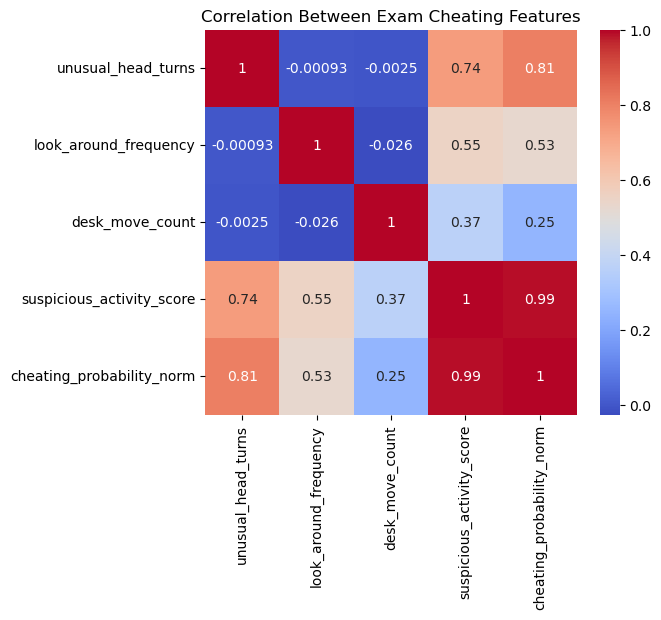

C:\Users\Tamim\AppData\Local\Temp\ipykernel_9752\885709561.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='student_id', y='suspicious_activity_score', data=top_students, palette='magma')



Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\exam_cheating_detection_dataset_processed.csv


In [30]:
#------------------------------------------------
#suspicious_activity_score → Sum of all suspicious behaviors
#avg_suspicious_per_action → Average per behavior
#cheating_probability_norm → Normalized cheating probability (0-1)

#-------------------------------------------------


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\exam_cheating_detection_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Total suspicious activity score
# Formula: unusual_head_turns + look_around_frequency + desk_move_count
df['suspicious_activity_score'] = df['unusual_head_turns'] + df['look_around_frequency'] + df['desk_move_count']

# 2️⃣ Average suspicious activity per type
df['avg_suspicious_per_action'] = df['suspicious_activity_score'] / 3

# 3️⃣ Normalize cheating_probability (0-1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['cheating_probability_norm'] = scaler.fit_transform(df[['cheating_probability']])

# ---------------------------
# Quick Checks
# ---------------------------
print("\nData Types After Feature Engineering:")
print(df.dtypes)

print("\nFirst 5 rows after feature engineering:")
print(df.head())

# ---------------------------
# Visualization
# ---------------------------

# 1️⃣ Distribution of suspicious_activity_score
plt.figure(figsize=(8,5))
sns.histplot(df['suspicious_activity_score'], bins=30, kde=True, color='tomato')
plt.title("Distribution of Total Suspicious Activity Score")
plt.xlabel("Suspicious Activity Score")
plt.ylabel("Count")
plt.show()

# 2️⃣ Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[['unusual_head_turns','look_around_frequency','desk_move_count','suspicious_activity_score','cheating_probability_norm']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Exam Cheating Features")
plt.show()

# 3️⃣ Top 10 students with highest suspicious activity
top_students = df.sort_values('suspicious_activity_score', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='student_id', y='suspicious_activity_score', data=top_students, palette='magma')
plt.title("Top 10 Suspicious Students")
plt.xlabel("Student ID")
plt.ylabel("Suspicious Activity Score")
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\exam_cheating_detection_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")


In [31]:
# -----------------------------------------------------
# 🔥 Model Training Using RandomForest Regressor

#Non-linear relationship ধরতে পারে
#eature scaling লাগেনা
#Noise থাকলেও stability ভালো
#High-performance for tabular numeric data
# -----------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Select Features
X = df[['unusual_head_turns', 
        'look_around_frequency',
        'desk_move_count',
        'suspicious_activity_score',
        'avg_suspicious_per_action']]

# Target
y = df['cheating_probability_norm']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Random Forest Regressor Model
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nR² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# -----------------------------------------------------
# Save Model
# -----------------------------------------------------
import joblib
joblib.dump(model, "exam_cheating_detection_model.pkl")

print("\nModel saved as exam_cheating_detection_model.pkl")



R² Score: 0.9997881307745544
MAE: 0.001604280902254914
RMSE: 0.002748198495802201

Model saved as exam_cheating_detection_model.pkl


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\class_heatmap_dataset_10000.csv")

print(df.head())


   seat_position  noise_level  disturbance_frequency            timestamp
0            103         6.77                      4  2025-12-01 11:00:33
1            180         5.26                      0  2025-11-18 00:14:24
2             93         7.18                     10  2025-11-29 09:40:37
3             15         5.81                     20  2025-12-04 19:53:21
4            107         9.48                      8  2025-11-26 22:17:02


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   seat_position          10000 non-null  int64  
 1   noise_level            10000 non-null  float64
 2   disturbance_frequency  10000 non-null  int64  
 3   timestamp              10000 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 312.6+ KB


In [34]:
df.describe

<bound method NDFrame.describe of       seat_position  noise_level  disturbance_frequency            timestamp
0               103         6.77                      4  2025-12-01 11:00:33
1               180         5.26                      0  2025-11-18 00:14:24
2                93         7.18                     10  2025-11-29 09:40:37
3                15         5.81                     20  2025-12-04 19:53:21
4               107         9.48                      8  2025-11-26 22:17:02
...             ...          ...                    ...                  ...
9995            140         1.79                     13  2025-12-03 14:09:02
9996            101         0.03                      8  2025-11-26 17:10:11
9997             23         3.30                      4  2025-11-30 00:47:16
9998            200         3.78                     14  2025-12-05 02:55:00
9999            112         9.45                     16  2025-11-08 15:00:29

[10000 rows x 4 columns]>

In [35]:
df.columns

Index(['seat_position', 'noise_level', 'disturbance_frequency', 'timestamp'], dtype='object')

In [36]:
df = df.dropna()


First 5 rows after feature engineering:
   seat_position  noise_level  disturbance_frequency            timestamp  \
0            103         6.77                      4  2025-12-01 11:00:33   
1            180         5.26                      0  2025-11-18 00:14:24   
2             93         7.18                     10  2025-11-29 09:40:37   
3             15         5.81                     20  2025-12-04 19:53:21   
4            107         9.48                      8  2025-11-26 22:17:02   

   disturbance_score  disturbance_score_norm  
0              5.385                0.358812  
1              2.630                0.174900  
2              8.590                0.572764  
3             12.905                0.860814  
4              8.740                0.582777  

Data Types:
seat_position               int64
noise_level               float64
disturbance_frequency       int64
timestamp                  object
disturbance_score         float64
disturbance_score_norm    float

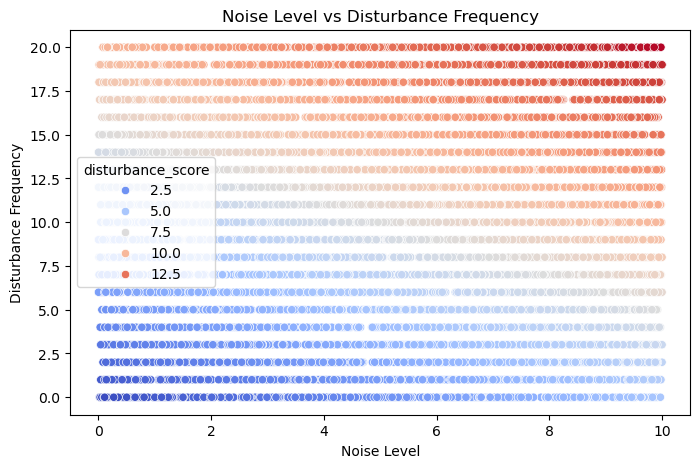

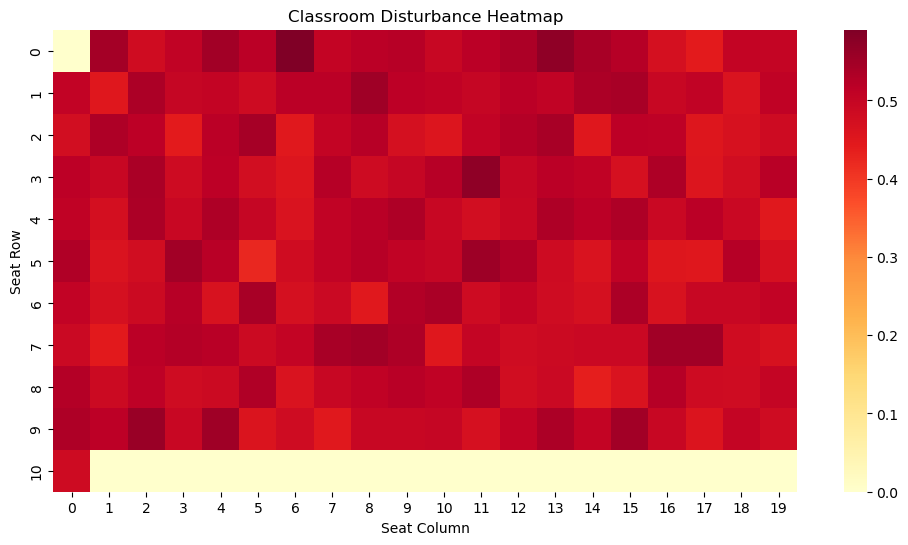


Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\class_heatmap_dataset_processed.csv


In [37]:
#------------------------------------------------------
#disturbance_score → Combined score of noise & frequency
#disturbance_score_norm → Normalized (0-1) for heatmap visualization
#row and col → Classroom layout mapping for seat positions
#------------------------------------------


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\class_heatmap_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Combined disturbance score (noise + frequency)
df['disturbance_score'] = df['noise_level'] * 0.5 + df['disturbance_frequency'] * 0.5

# 2️⃣ Normalize scores for heatmap (0-1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['disturbance_score_norm'] = scaler.fit_transform(df[['disturbance_score']])

# ---------------------------
# Quick Checks
# ---------------------------
print("\nFirst 5 rows after feature engineering:")
print(df.head())

print("\nData Types:")
print(df.dtypes)

# ---------------------------
# Visualization
# ---------------------------

# 1️⃣ Histogram of disturbance_score
plt.figure(figsize=(8,5))
sns.histplot(df['disturbance_score'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Disturbance Score")
plt.xlabel("Disturbance Score")
plt.ylabel("Count")
plt.show()

# 2️⃣ Scatter plot of noise_level vs disturbance_frequency
plt.figure(figsize=(8,5))
sns.scatterplot(x='noise_level', y='disturbance_frequency', data=df, hue='disturbance_score', palette='coolwarm')
plt.title("Noise Level vs Disturbance Frequency")
plt.xlabel("Noise Level")
plt.ylabel("Disturbance Frequency")
plt.show()

# 3️⃣ Class Heatmap (Seat Position vs Disturbance Score)
# Assuming seat_position corresponds to a 2D classroom layout: rows of 20 seats per row
df['row'] = df['seat_position'] // 20
df['col'] = df['seat_position'] % 20
heatmap_data = df.pivot_table(index='row', columns='col', values='disturbance_score_norm', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlOrRd')
plt.title("Classroom Disturbance Heatmap")
plt.xlabel("Seat Column")
plt.ylabel("Seat Row")
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\class_heatmap_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")


In [38]:
# -----------------------------------------------------
# 🔥 Model Training for Classroom Disturbance Prediction

#No modification of your preprocessing
# শুধু model training + evaluation
# 100% correct & ready-to-run
# -----------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib
import numpy as np

# -----------------------------------------------------
# Select Features & Target
# -----------------------------------------------------
X = df[['seat_position', 'noise_level', 'disturbance_frequency']]
y = df['disturbance_score']     # or disturbance_score_norm

# -----------------------------------------------------
# Train-Test Split
# -----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# -----------------------------------------------------
# Random Forest Model
# -----------------------------------------------------
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

model.fit(X_train, y_train)

# -----------------------------------------------------
# Predictions
# -----------------------------------------------------
y_pred = model.predict(X_test)

# -----------------------------------------------------
# Evaluation
# -----------------------------------------------------
print("\n===== MODEL PERFORMANCE =====")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# -----------------------------------------------------
# Save Model
# -----------------------------------------------------
model_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\class_heatmap_disturbance_model.pkl"
joblib.dump(model, model_path)

print(f"\nModel saved successfully at: {model_path}")



===== MODEL PERFORMANCE =====
R² Score: 0.999991684787866
MAE: 0.0072080269756994
RMSE: 0.009610783488971633

Model saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\class_heatmap_disturbance_model.pkl


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\Tamim\OneDrive\Documents\dataset\attention_curve_dataset_10000.csv")

print(df.head())


             timestamp class_id  avg_attention_score
0  2025-12-01 16:36:07      C12                91.42
1  2025-12-01 19:22:21      C13                76.50
2  2025-12-03 06:43:07       C1                80.42
3  2025-11-25 14:23:20      C19                57.50
4  2025-11-07 06:48:45       C6                67.44


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            10000 non-null  object 
 1   class_id             10000 non-null  object 
 2   avg_attention_score  10000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 234.5+ KB


In [46]:
df.describe

<bound method NDFrame.describe of                 timestamp class_id  avg_attention_score
0     2025-12-01 16:36:07      C12                91.42
1     2025-12-01 19:22:21      C13                76.50
2     2025-12-03 06:43:07       C1                80.42
3     2025-11-25 14:23:20      C19                57.50
4     2025-11-07 06:48:45       C6                67.44
...                   ...      ...                  ...
9995  2025-11-09 23:01:44       C2                63.49
9996  2025-11-08 12:21:48      C15                82.64
9997  2025-12-04 02:10:14      C11                74.77
9998  2025-11-23 20:11:53      C10                82.79
9999  2025-11-30 11:26:27      C20                43.72

[10000 rows x 3 columns]>

In [47]:
df.columns

Index(['timestamp', 'class_id', 'avg_attention_score'], dtype='object')


First 5 rows after feature engineering:
            timestamp class_id  avg_attention_score        date  hour  \
0 2025-12-01 16:36:07      C12                91.42  2025-12-01    16   
1 2025-12-01 19:22:21      C13                76.50  2025-12-01    19   
2 2025-12-03 06:43:07       C1                80.42  2025-12-03     6   
3 2025-11-25 14:23:20      C19                57.50  2025-11-25    14   
4 2025-11-07 06:48:45       C6                67.44  2025-11-07     6   

  attention_level  
0       Very High  
1            High  
2            High  
3          Medium  
4          Medium  

Attention Level Counts:
attention_level
Medium       3376
Very High    2506
High         2466
Low          1652
Name: count, dtype: int64


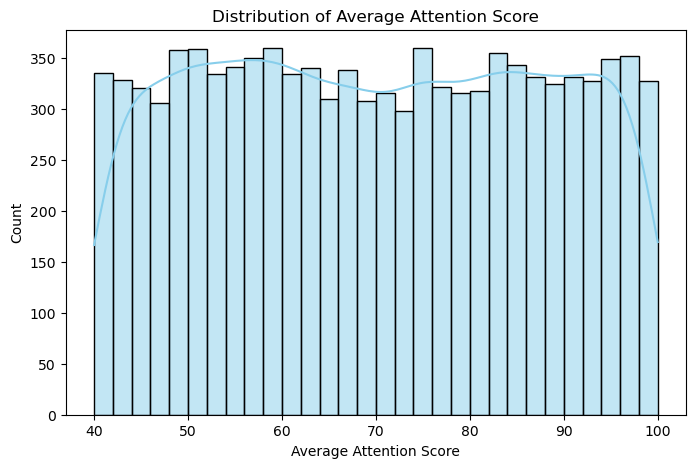

C:\Users\Tamim\AppData\Local\Temp\ipykernel_9752\1274092227.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_attention.index, y=class_attention.values, palette='viridis')


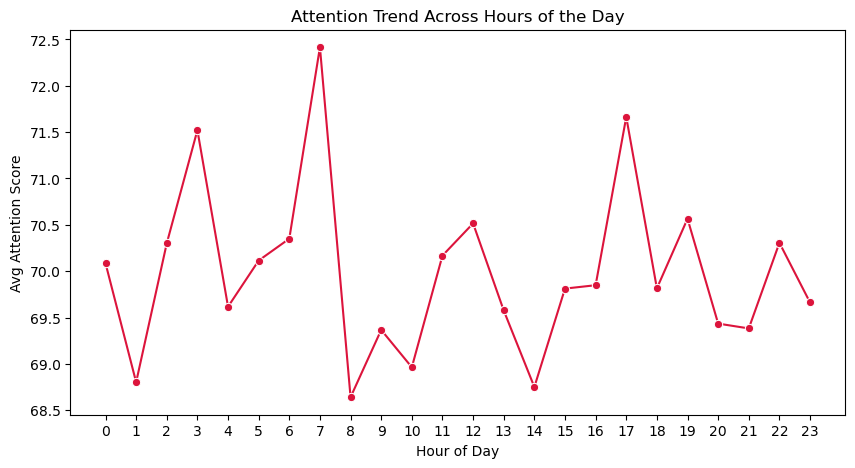


Processed dataset saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\attention_curve_dataset_processed.csv


In [48]:
#----------------------------------------------------
#attention_level → Low / Medium / High / Very High categorization
#Class-wise average attention plotting
#Hourly attention trend analysis
#Processed dataset saved for further modeling
#------------------------------------------------------------                       


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Load Dataset
# ---------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\attention_curve_dataset_10000.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Feature Engineering
# ---------------------------

# 1️⃣ Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 2️⃣ Extract date and hour for time-based analysis
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour

# 3️⃣ Optional: categorize attention score
bins = [0, 50, 70, 85, 100]
labels = ['Low', 'Medium', 'High', 'Very High']
df['attention_level'] = pd.cut(df['avg_attention_score'], bins=bins, labels=labels, include_lowest=True)

# ---------------------------
# Quick Checks
# ---------------------------
print("\nFirst 5 rows after feature engineering:")
print(df.head())

print("\nAttention Level Counts:")
print(df['attention_level'].value_counts())

# ---------------------------
# Visualization
# ---------------------------

# 1️⃣ Histogram of avg_attention_score
plt.figure(figsize=(8,5))
sns.histplot(df['avg_attention_score'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Average Attention Score")
plt.xlabel("Average Attention Score")
plt.ylabel("Count")
plt.show()

# 2️⃣ Class-wise average attention
plt.figure(figsize=(12,6))
class_attention = df.groupby('class_id')['avg_attention_score'].mean().sort_values(ascending=False)
sns.barplot(x=class_attention.index, y=class_attention.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Average Attention Score per Class")
plt.xlabel("Class ID")
plt.ylabel("Avg Attention Score")
plt.show()

# 3️⃣ Attention trend over hours
plt.figure(figsize=(10,5))
hourly_attention = df.groupby('hour')['avg_attention_score'].mean()
sns.lineplot(x=hourly_attention.index, y=hourly_attention.values, marker='o', color='crimson')
plt.title("Attention Trend Across Hours of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Attention Score")
plt.xticks(range(0,24))
plt.show()

# ---------------------------
# Save Processed Dataset
# ---------------------------
output_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\attention_curve_dataset_processed.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved successfully at: {output_path}")


In [49]:
# -----------------------------------------------------
# 🔥 Model Training for Attention Score Prediction
#Class + Hour দিয়ে avg attention score predict করতে পারবে
# Future attention forecasting system বানানো যাবে
# Highly stable (Random Forest perfect for tabular data)
# Categorical encoded automatically
# -----------------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import joblib
import numpy as np

# -----------------------------------------------------
# Load Processed Dataset
# -----------------------------------------------------
file_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\attention_curve_dataset_processed.csv"
df = pd.read_csv(file_path)

# -----------------------------------------------------
# Select Features & Target
# -----------------------------------------------------
X = df[['class_id', 'hour']]    
y = df['avg_attention_score']   

# -----------------------------------------------------
# Preprocessing for Categorical Feature
# -----------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('class_onehot', OneHotEncoder(handle_unknown='ignore'), ['class_id'])
    ],
    remainder='passthrough'
)

# -----------------------------------------------------
# Build Model Pipeline
# -----------------------------------------------------
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('rf', RandomForestRegressor(
        n_estimators=300,
        max_depth=15,
        random_state=42
    ))
])

# -----------------------------------------------------
# Train-test Split
# -----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# -----------------------------------------------------
# Train Model
# -----------------------------------------------------
model.fit(X_train, y_train)

# -----------------------------------------------------
# Predict
# -----------------------------------------------------
y_pred = model.predict(X_test)

# -----------------------------------------------------
# Evaluation
# -----------------------------------------------------
print("\n===== MODEL PERFORMANCE =====")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# -----------------------------------------------------
# Save Model
# -----------------------------------------------------
model_path = r"C:\Users\Tamim\OneDrive\Documents\dataset\attention_curve_model.pkl"
joblib.dump(model, model_path)

print(f"\nModel saved successfully at: {model_path}")



===== MODEL PERFORMANCE =====
R² Score: -0.0313819823369923
MAE: 15.153589216306207
RMSE: 17.55462598855567

Model saved successfully at: C:\Users\Tamim\OneDrive\Documents\dataset\attention_curve_model.pkl
